In [134]:
include("../code/headers.jl")

# 1. Populations

In [135]:
Λ = OffsetVector([0,0,1,0], 0:3)
K = OffsetVector([0,0,0,1], 0:3)

mK = sum(k*K[k] for k=eachindex(K))
mΛ = sum(d*Λ[d] for d=eachindex(Λ))
α = mΛ/mK
@show R=1-α
J = 20
y = 0.5
popsize=10^6
popP = fill(1/(2J+1), -J:J, 1:popsize);
popQ = fill(1/(2J+1), -J:J, 1:popsize);

R = 1 - α = 0.33333333333333337


In [136]:
ProgressMeter.ijulia_behavior(:clear)
popP, popQ = RSB(Λ,K; J=J, maxiter=10^2, popsize=popsize, popQ=popQ, popP=popP, y=y);

Progress: 100%|█████████████████████████████████████████| Time: 0:02:56
  err:  0.007196150660875866/5.0e-5


err = 0.007196150660875866


In [137]:
avgPop = mean(popP, dims=2)
varPop = checkRS(popP)
avgPop, varPop

([0.0; 0.0; … ; 0.0; 0.0… ; ], 0.009209094897810775)

# 2. Overlap

In [138]:
O,F = overlap1RSB(Λ,K; popP=popP, popQ=popQ, y=y, samples=10^6)
Σ = -O - F
D=(1-O)/2
@show R D F Σ;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:30
  F:  -0.5782008401481965
  O:  0.5780806248339911
  D:  0.21095968758300443


(O_factor, F_factor / y) = (449201.29865823133, -453601.47230377514)
(O_var, F_var / y) = (16366.940780079158, -22207.331574910582)
(O_edge, F_edge / y) = (446957.5490264456, -451404.5766294786)
R = 0.33333333333333337
D = 0.21095968758300443
F = -0.5782008401481965
Σ = 0.00012021531420536302


## Varying rate

In [141]:
using Unzip
ProgressMeter.ijulia_behavior(:append)
y = 0.2
J = 30

rs = 0:0.1:1
Rs=fill(NaN, eachindex(rs))
Ds=fill(NaN, eachindex(rs))
Fs=fill(NaN, eachindex(rs))

for (i,r) in pairs(rs)
    Λ = OffsetArray([0,1-r,r],1:3)
    K = OffsetArray([0,0,1],1:3)
    mK = sum(k*K[k] for k=eachindex(K))
    mΛ = sum(d*Λ[d] for d=eachindex(Λ))
    α = mΛ/mK
    popsize=10^6
    popP, popQ = RSB(Λ,K; J=J, maxiter=10^2, popsize=popsize, y=y)
    O,F = overlap1RSB(Λ,K; popP=popP, popQ=popQ, y=y, samples=10^6)
    Σ = -O - F
    D=(1-O)/2
    R=1-α
    @show R D F
    Rs[i],Ds[i],Fs[i] = R, D, F
end

Progress:   1%|▍                                        |  ETA: 0:03:38
4m  err:  0.015627889212511323/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:04:01
4m  err:  0.02398619448564027/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:03:51
4m  err:  0.04060037567068527/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:03:44
4m  err:  0.060024594741557205/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:03:39
4m  err:  0.05992785718873281/3.3333333333333335e-5
Progress:   6%|██▌                                      |  ETA: 0:03:35
4m  err:  0.07783292252790108/3.3333333333333335e-5
Progress:   7%|██▉                                      |  ETA: 0:03:34
4m  err:  0.0350063916757295/3.3333333333333335e-5
Progress:   8%|███▎                                     |  ETA: 0:03:30
4m  err:  0.043144230131890504/3.3333333333333335e-5
Progre

4m  err:  0.010064007225721872/3.3333333333333335e-5
Progress:  59%|████████████████████████▎                |  ETA: 0:01:32
4m  err:  0.007461386744861298/3.3333333333333335e-5
Progress:  60%|████████████████████████▋                |  ETA: 0:01:30
4m  err:  0.00622727759390207/3.3333333333333335e-5
Progress:  61%|█████████████████████████                |  ETA: 0:01:28
4m  err:  0.007159658116713152/3.3333333333333335e-5
Progress:  62%|█████████████████████████▍               |  ETA: 0:01:25
4m  err:  0.00794669783609614/3.3333333333333335e-5
Progress:  63%|█████████████████████████▉               |  ETA: 0:01:23
4m  err:  0.007908726247545017/3.3333333333333335e-5
Progress:  64%|██████████████████████████▎              |  ETA: 0:01:21
4m  err:  0.008057619486899814/3.3333333333333335e-5
Progress:  65%|██████████████████████████▋              |  ETA: 0:01:19
4m  err:  0.00724866547311237/3.3333333333333335e-5
Progress:  66%|███████████████████████████              |  ETA: 0:01:16
4m 

err = 0.004037996475009464


Progress:   0%|▏                                        |  ETA: 0:00:59
  F:  -0.5305730373055051
  O:  0.5306131292304017
4m  D:  0.23469343538479914


Progress:   0%|▏                                        |  ETA: 0:00:59
  F:  -0.5444937958780433
  O:  0.5445171861469257
4m  D:  0.22774140692653716


Progress:   1%|▎                                        |  ETA: 0:00:59
  F:  -0.5622989574076858
  O:  0.5621749905607892
4m  D:  0.21891250471960538


Progress:   1%|▎                                        |  ETA: 0:00:59
  F:  -0.5577607833655049
  O:  0.5578155106015158
4m  D:  0.2210922446992421


Progress:   1%|▍                                        |  ETA: 0:00:59
  F:  -0.5722700110509196
  O:  0.5723302429961575
4m  D:  0.21383487850192123


Progress:   1%|▍                                        |  ETA: 0:00:59
  F:  -0.5658296054706117
  O:  0.5658795639186215
4m  D:  0.21706021804068926


Progress:   1%|▌                                        |  ETA: 0:00:59
  F:  -0.56

4m  D:  0.2100723893646012


Progress:   8%|███▏                                     |  ETA: 0:00:55
  F:  -0.580675836984693
  O:  0.5807806504092705
4m  D:  0.20960967479536474


Progress:   8%|███▏                                     |  ETA: 0:00:55
  F:  -0.5810449977545958
  O:  0.5811365306696317
4m  D:  0.20943173466518417


Progress:   8%|███▎                                     |  ETA: 0:00:55
  F:  -0.5803120661342969
  O:  0.5804245985010064
4m  D:  0.20978770074949682


Progress:   8%|███▍                                     |  ETA: 0:00:55
  F:  -0.5800314883318434
  O:  0.5801468317617072
4m  D:  0.2099265841191464


Progress:   8%|███▍                                     |  ETA: 0:00:55
  F:  -0.5785578480926978
  O:  0.5786614440329348
4m  D:  0.21066927798353258


Progress:   8%|███▌                                     |  ETA: 0:00:55
  F:  -0.5804561082746544
  O:  0.5805310639981192
4m  D:  0.20973446800094042


Progress:   9%|███▌                                    

4m  D:  0.2094310434141124


Progress:  15%|██████                                   |  ETA: 0:00:51
  F:  -0.5808689279167779
  O:  0.580955807983144
4m  D:  0.20952209600842803


Progress:  15%|██████▏                                  |  ETA: 0:00:51
  F:  -0.5800420811610754
  O:  0.5801208573630173
4m  D:  0.20993957131849134


Progress:  15%|██████▏                                  |  ETA: 0:00:51
  F:  -0.5799645467972011
  O:  0.5800461309938039
4m  D:  0.20997693450309807


Progress:  15%|██████▎                                  |  ETA: 0:00:51
  F:  -0.5805161536752642
  O:  0.5806007907276848
4m  D:  0.2096996046361576


Progress:  15%|██████▎                                  |  ETA: 0:00:51
  F:  -0.5801236919689754
  O:  0.5802080476745098
4m  D:  0.20989597616274508


Progress:  16%|██████▍                                  |  ETA: 0:00:51
  F:  -0.5801360511219688
  O:  0.5802144004832493
4m  D:  0.20989279975837533


Progress:  16%|██████▍                                 

4m  D:  0.209571533745956


Progress:  22%|████████▉                                |  ETA: 0:00:48
  F:  -0.5810656092814088
  O:  0.5810977791898838
4m  D:  0.2094511104050581


Progress:  22%|█████████                                |  ETA: 0:00:47
  F:  -0.5814111131421486
  O:  0.5814402087537014
4m  D:  0.2092798956231493


Progress:  22%|█████████                                |  ETA: 0:00:47
  F:  -0.5805093969035733
  O:  0.5805314377860873
4m  D:  0.20973428110695636


Progress:  22%|█████████▏                               |  ETA: 0:00:47
  F:  -0.5805635917769326
  O:  0.5805812595376177
4m  D:  0.20970937023119113


Progress:  22%|█████████▎                               |  ETA: 0:00:47
  F:  -0.5801201145361746
  O:  0.5801399642461297
4m  D:  0.20993001787693516


Progress:  23%|█████████▎                               |  ETA: 0:00:47
  F:  -0.5804281181528574
  O:  0.5804390881604797
4m  D:  0.20978045591976013


Progress:  23%|█████████▍                               

4m  D:  0.20959341277686716


Progress:  29%|███████████▉                             |  ETA: 0:00:43
  F:  -0.5809199355290828
  O:  0.5809531099128532
4m  D:  0.2095234450435734


Progress:  29%|████████████                             |  ETA: 0:00:43
  F:  -0.5810251591315001
  O:  0.5810650959680206
4m  D:  0.2094674520159897


Progress:  29%|████████████                             |  ETA: 0:00:43
  F:  -0.5815727584522858
  O:  0.581614172088876
4m  D:  0.209192913955562


Progress:  29%|████████████▏                            |  ETA: 0:00:43
  F:  -0.5814391177601885
  O:  0.5814835428677948
4m  D:  0.2092582285661026


Progress:  30%|████████████▏                            |  ETA: 0:00:43
  F:  -0.5816339590811633
  O:  0.5816782596643334
4m  D:  0.2091608701678333


Progress:  30%|████████████▎                            |  ETA: 0:00:42
  F:  -0.5810046430725763
  O:  0.5810477595122314
4m  D:  0.2094761202438843


Progress:  30%|████████████▎                            |  E

4m  D:  0.20932185366122386


Progress:  36%|██████████████▊                          |  ETA: 0:00:39
  F:  -0.5813811510781419
  O:  0.5814139360927525
4m  D:  0.20929303195362375


Progress:  36%|██████████████▉                          |  ETA: 0:00:39
  F:  -0.5814506692131434
  O:  0.5814855633709176
4m  D:  0.2092572183145412


Progress:  36%|██████████████▉                          |  ETA: 0:00:39
  F:  -0.5813423630917388
  O:  0.5813768137388575
4m  D:  0.20931159313057124


Progress:  37%|███████████████                          |  ETA: 0:00:38
  F:  -0.5817904650785946
  O:  0.5818224782074432
4m  D:  0.20908876089627842


Progress:  37%|███████████████                          |  ETA: 0:00:38
  F:  -0.5817693751773161
  O:  0.5818039140339577
4m  D:  0.20909804298302115


Progress:  37%|███████████████▏                         |  ETA: 0:00:38
  F:  -0.5816482532360135
  O:  0.5816871506846217
4m  D:  0.20915642465768913


Progress:  37%|███████████████▏                      

4m  D:  0.20828121876498557


Progress:  43%|█████████████████▋                       |  ETA: 0:00:35
  F:  -0.5833707322998639
  O:  0.5833930100577239
4m  D:  0.20830349497113804


Progress:  43%|█████████████████▊                       |  ETA: 0:00:34
  F:  -0.5831346423531781
  O:  0.5831556397615582
4m  D:  0.20842218011922092


Progress:  43%|█████████████████▊                       |  ETA: 0:00:34
  F:  -0.5830808946019208
  O:  0.5831020150088586
4m  D:  0.2084489924955707


Progress:  44%|█████████████████▉                       |  ETA: 0:00:34
  F:  -0.5830606279485613
  O:  0.5830816124224085
4m  D:  0.20845919378879574


Progress:  44%|██████████████████                       |  ETA: 0:00:34
  F:  -0.58319474573661
  O:  0.5832142872235482
4m  D:  0.2083928563882259


Progress:  44%|██████████████████                       |  ETA: 0:00:34
  F:  -0.5827519372192254
  O:  0.5827765734774759
4m  D:  0.20861171326126204


Progress:  44%|██████████████████▏                      

4m  D:  0.2088817390691899


Progress:  50%|████████████████████▋                    |  ETA: 0:00:30
  F:  -0.581968927536631
  O:  0.5819733669522316
4m  D:  0.20901331652388422


Progress:  50%|████████████████████▋                    |  ETA: 0:00:30
  F:  -0.5820586097132511
  O:  0.5820600943065074
4m  D:  0.2089699528467463


Progress:  50%|████████████████████▊                    |  ETA: 0:00:30
  F:  -0.5819372395854583
  O:  0.5819393294835369
4m  D:  0.20903033525823156


Progress:  51%|████████████████████▊                    |  ETA: 0:00:30
  F:  -0.5821161325058731
  O:  0.582113362102144
4m  D:  0.20894331894892798


Progress:  51%|████████████████████▉                    |  ETA: 0:00:30
  F:  -0.5821544699865281
  O:  0.5821519622552446
4m  D:  0.20892401887237771


Progress:  51%|████████████████████▉                    |  ETA: 0:00:30
  F:  -0.5821130156439995
  O:  0.5821129421676945
4m  D:  0.20894352891615275


Progress:  51%|█████████████████████                    

4m  D:  0.20900899372988868


Progress:  57%|███████████████████████▍                 |  ETA: 0:00:26
  F:  -0.5817452969011411
  O:  0.5817404956705983
4m  D:  0.20912975216470087


Progress:  57%|███████████████████████▌                 |  ETA: 0:00:26
  F:  -0.581785562151421
  O:  0.581780946164695
4m  D:  0.2091095269176525


Progress:  57%|███████████████████████▌                 |  ETA: 0:00:26
  F:  -0.5816922241982575
  O:  0.5816888693486781
4m  D:  0.20915556532566093


Progress:  58%|███████████████████████▋                 |  ETA: 0:00:26
  F:  -0.581828368659867
  O:  0.5818249613642819
4m  D:  0.20908751931785907


Progress:  58%|███████████████████████▊                 |  ETA: 0:00:26
  F:  -0.5816245668231672
  O:  0.581621974358221
4m  D:  0.20918901282088948


Progress:  58%|███████████████████████▊                 |  ETA: 0:00:26
  F:  -0.5814983898306134
  O:  0.5815008754690554
4m  D:  0.2092495622654723


Progress:  58%|███████████████████████▉                 | 

4m  D:  0.2094228218658707


Progress:  64%|██████████████████████████▍              |  ETA: 0:00:22
  F:  -0.5811462098526219
  O:  0.5811566127385631
4m  D:  0.20942169363071844


Progress:  64%|██████████████████████████▍              |  ETA: 0:00:22
  F:  -0.580978341006924
  O:  0.580991746199821
4m  D:  0.20950412690008952


Progress:  65%|██████████████████████████▌              |  ETA: 0:00:22
  F:  -0.5809290260490786
  O:  0.5809422584589116
4m  D:  0.20952887077054422


Progress:  65%|██████████████████████████▌              |  ETA: 0:00:22
  F:  -0.5807498397085576
  O:  0.5807652220685611
4m  D:  0.20961738896571946


Progress:  65%|██████████████████████████▋              |  ETA: 0:00:21
  F:  -0.5806556441862305
  O:  0.5806689165840428
4m  D:  0.20966554170797858


Progress:  65%|██████████████████████████▋              |  ETA: 0:00:21
  F:  -0.5807618638106805
  O:  0.5807761446972911
4m  D:  0.20961192765135445


Progress:  65%|██████████████████████████▊             

4m  D:  0.20927550273203432


Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:17
  F:  -0.5815645150272281
  O:  0.5815753902978755
4m  D:  0.20921230485106224


Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:17
  F:  -0.5815291675286657
  O:  0.581539437030066
4m  D:  0.20923028148496697


Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:17
  F:  -0.5815651706128471
  O:  0.5815747055876107
4m  D:  0.20921264720619465


Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:17
  F:  -0.581702692850958
  O:  0.5817140986224008
4m  D:  0.20914295068879962


Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:17
  F:  -0.5817275534690661
  O:  0.5817378489044409
4m  D:  0.20913107554777954


Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:17
  F:  -0.5818023237254041
  O:  0.5818120037458544
4m  D:  0.2090939981270728


Progress:  72%|█████████████████████████████▋          

4m  D:  0.20917934171947067


Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:13
  F:  -0.5816590290884666
  O:  0.5816751142728668
4m  D:  0.2091624428635666


Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:13
  F:  -0.5819161602275849
  O:  0.581931079476832
4m  D:  0.209034460261584


Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:13
  F:  -0.581843888292136
  O:  0.5818559130909705
4m  D:  0.20907204345451474


Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:13
  F:  -0.5818872611848317
  O:  0.5818989543912153
4m  D:  0.20905052280439235


Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:13
  F:  -0.5820306885482489
  O:  0.5820440953843026
4m  D:  0.2089779523078487


Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:13
  F:  -0.581938321575606
  O:  0.5819501748179033
4m  D:  0.20902491259104833


Progress:  80%|████████████████████████████████▋        |  

4m  D:  0.20901601642518242


Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:09
  F:  -0.5821333563737339
  O:  0.5821538076483043
4m  D:  0.20892309617584787


Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:09
  F:  -0.5820865996105721
  O:  0.5821074658910441
4m  D:  0.20894626705447794


Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:09
  F:  -0.5819516273184492
  O:  0.581972304157554
4m  D:  0.20901384792122302


Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:09
  F:  -0.5819879882110301
  O:  0.58200843883483
4m  D:  0.208995780582585


Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:08
  F:  -0.582204175806236
  O:  0.5822250369891493
4m  D:  0.20888748150542535


Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:08
  F:  -0.5821622876460445
  O:  0.582181580015575
4m  D:  0.20890920999221252


Progress:  87%|███████████████████████████████████▌     |  

4m  D:  0.20919779969141244


Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:04
  F:  -0.5816067551331117
  O:  0.5816161295532134
4m  D:  0.2091919352233933


Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:04
  F:  -0.5815375992293015
  O:  0.5815476127334333
4m  D:  0.20922619363328337


Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:04
  F:  -0.5815018203430401
  O:  0.5815104754680241
4m  D:  0.20924476226598793


Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:04
  F:  -0.5815336571794161
  O:  0.5815412019746409
4m  D:  0.20922939901267956


Progress:  93%|██████████████████████████████████████▍  |  ETA: 0:00:04
  F:  -0.5814714927456192
  O:  0.5814802503017603
4m  D:  0.20925987484911984


Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:04
  F:  -0.5814792812412609
  O:  0.5814886164661693
4m  D:  0.20925569176691533


Progress:  94%|██████████████████████████████████████

4m  D:  0.20837374685166815


Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
  F:  -0.5832529847186635
  O:  0.5832615274063121
  D:  0.20836923629684395


(O_factor, F_factor / y) = (451698.1654498245, -453232.3901904449)
(O_var, F_var / y) = (20914.41872766156, -22971.17044151958)
(O_edge, F_edge / y) = (452654.02821692824, -454189.5409769065)
R = 0.33333333333333337
D = 0.20836923629684395
F = -0.5832529847186635


Progress:   1%|▍                                        |  ETA: 0:04:04
4m  err:  0.012641245564261732/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:04:02
4m  err:  0.01733719254704626/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:03:59
4m  err:  0.02751285489167117/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:03:57
4m  err:  0.0389404885645327/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:04:06
4m  err:  0.04744460598480088/3.3333333333333335e-5
Progress:   6%|██▌                                      |  ETA: 0:04:02
4m  err:  0.06400335594997467/3.3333333333333335e-5
Progress:   7%|██▉                                      |  ETA: 0:03:58
4m  err:  0.04979440511997915/3.3333333333333335e-5
Progress:   8%|███▎                                     |  ETA: 0:03:54
4m  err:  0.050080111032833774/3.3333333333333335e-5
Progres

4m  err:  0.00213944315999659/3.3333333333333335e-5
Progress:  59%|████████████████████████▎                |  ETA: 0:01:48
4m  err:  0.0007260258231962524/3.3333333333333335e-5
Progress:  60%|████████████████████████▋                |  ETA: 0:01:46
4m  err:  0.00022399586972848828/3.3333333333333335e-5
Progress:  61%|█████████████████████████                |  ETA: 0:01:43
4m  err:  0.0004357313688213571/3.3333333333333335e-5
Progress:  62%|█████████████████████████▍               |  ETA: 0:01:40
4m  err:  0.0008123114731204972/3.3333333333333335e-5
Progress:  63%|█████████████████████████▉               |  ETA: 0:01:37
4m  err:  0.0004161380569804862/3.3333333333333335e-5
Progress:  64%|██████████████████████████▎              |  ETA: 0:01:35
4m  err:  0.0006626092739205891/3.3333333333333335e-5
Progress:  65%|██████████████████████████▋              |  ETA: 0:01:32
4m  err:  0.001212351485773977/3.3333333333333335e-5
Progress:  66%|███████████████████████████              |  ETA: 0:

err = 0.0016190975437487265


Progress:   0%|▏                                        |  ETA: 0:01:02
  F:  -0.5696899485105396
  O:  0.5718317191970956
4m  D:  0.21408414040145218


Progress:   0%|▏                                        |  ETA: 0:01:02
  F:  -0.5830193145394255
  O:  0.5836348217734241
4m  D:  0.20818258911328796


Progress:   0%|▎                                        |  ETA: 0:01:02
  F:  -0.5839437878363145
  O:  0.5849282243600428
4m  D:  0.20753588781997862


Progress:   1%|▎                                        |  ETA: 0:01:02
  F:  -0.56033449596867
  O:  0.5610309403751628
4m  D:  0.21948452981241862


Progress:   1%|▍                                        |  ETA: 0:01:02
  F:  -0.5702343235483954
  O:  0.5700991343614773
4m  D:  0.21495043281926135


Progress:   1%|▍                                        |  ETA: 0:01:02
  F:  -0.5806240062154324
  O:  0.5796727120097177
4m  D:  0.21016364399514115


Progress:   1%|▌                                        |  ETA: 0:01:02
  F:  -0.580

4m  D:  0.21469909088546396


Progress:   7%|██▉                                      |  ETA: 0:00:59
  F:  -0.5731252768422445
  O:  0.572821985488961
4m  D:  0.2135890072555195


Progress:   7%|███                                      |  ETA: 0:00:59
  F:  -0.5733180497066209
  O:  0.573029309748589
4m  D:  0.2134853451257055


Progress:   7%|███▏                                     |  ETA: 0:00:58
  F:  -0.5714890637096577
  O:  0.5712695327261756
4m  D:  0.21436523363691218


Progress:   8%|███▏                                     |  ETA: 0:00:58
  F:  -0.5704157335415687
  O:  0.5701674227943945
4m  D:  0.21491628860280276


Progress:   8%|███▎                                     |  ETA: 0:00:58
  F:  -0.5691504661401025
  O:  0.5689252568820747
4m  D:  0.21553737155896263


Progress:   8%|███▎                                     |  ETA: 0:00:58
  F:  -0.570822483210225
  O:  0.5705653812294499
4m  D:  0.21471730938527506


Progress:   8%|███▍                                     |

4m  D:  0.21482651745382014


Progress:  14%|█████▊                                   |  ETA: 0:00:54
  F:  -0.5707387334700922
  O:  0.5705707751186428
4m  D:  0.21471461244067858


Progress:  14%|█████▉                                   |  ETA: 0:00:54
  F:  -0.5698915987359857
  O:  0.5697442343291736
4m  D:  0.21512788283541318


Progress:  14%|█████▉                                   |  ETA: 0:00:54
  F:  -0.5698483070515306
  O:  0.5696740833029735
4m  D:  0.21516295834851323


Progress:  15%|██████                                   |  ETA: 0:00:54
  F:  -0.570004243122765
  O:  0.5698215413628841
4m  D:  0.21508922931855795


Progress:  15%|██████                                   |  ETA: 0:00:54
  F:  -0.5710535790518564
  O:  0.5708411510086678
4m  D:  0.21457942449566608


Progress:  15%|██████▏                                  |  ETA: 0:00:54
  F:  -0.5707881484814166
  O:  0.5706303579998889
4m  D:  0.21468482100005554


Progress:  15%|██████▏                               

4m  D:  0.21547662730223882


Progress:  21%|████████▋                                |  ETA: 0:00:50
  F:  -0.5689853809587233
  O:  0.5688817127012947
4m  D:  0.21555914364935264


Progress:  21%|████████▋                                |  ETA: 0:00:49
  F:  -0.5694795065166987
  O:  0.5693405083389403
4m  D:  0.21532974583052983


Progress:  21%|████████▊                                |  ETA: 0:00:49
  F:  -0.5693617485542827
  O:  0.5692345501875348
4m  D:  0.21538272490623261


Progress:  21%|████████▉                                |  ETA: 0:00:49
  F:  -0.5690534971535255
  O:  0.5689372457840403
4m  D:  0.21553137710797987


Progress:  22%|████████▉                                |  ETA: 0:00:49
  F:  -0.5692402669337959
  O:  0.5690867571833822
4m  D:  0.2154566214083089


Progress:  22%|█████████                                |  ETA: 0:00:49
  F:  -0.5691686604622529
  O:  0.5690199409921046
4m  D:  0.2154900295039477


Progress:  22%|█████████                              

4m  D:  0.21617070042720282


Progress:  28%|███████████▍                             |  ETA: 0:00:45
  F:  -0.5676292585204868
  O:  0.5675637466197497
4m  D:  0.21621812669012513


Progress:  28%|███████████▌                             |  ETA: 0:00:45
  F:  -0.5675032613403922
  O:  0.5674325165571619
4m  D:  0.21628374172141906


Progress:  28%|███████████▌                             |  ETA: 0:00:45
  F:  -0.5676934517374866
  O:  0.5676261134926667
4m  D:  0.21618694325366666


Progress:  28%|███████████▋                             |  ETA: 0:00:45
  F:  -0.5678683188908566
  O:  0.5677962340044146
4m  D:  0.2161018829977927


Progress:  28%|███████████▋                             |  ETA: 0:00:45
  F:  -0.5673701225973227
  O:  0.5672967640485826
4m  D:  0.21635161797570868


Progress:  29%|███████████▊                             |  ETA: 0:00:45
  F:  -0.5671496124362658
  O:  0.5670870953565604
4m  D:  0.21645645232171978


Progress:  29%|███████████▊                          

4m  D:  0.21628032577083517


Progress:  35%|██████████████▎                          |  ETA: 0:00:41
  F:  -0.5679490025683287
  O:  0.5678267209623387
4m  D:  0.21608663951883067


Progress:  35%|██████████████▍                          |  ETA: 0:00:41
  F:  -0.5681677452162299
  O:  0.5680301095448393
4m  D:  0.21598494522758033


Progress:  35%|██████████████▍                          |  ETA: 0:00:41
  F:  -0.5683703813777986
  O:  0.5682151886911369
4m  D:  0.21589240565443157


Progress:  35%|██████████████▌                          |  ETA: 0:00:41
  F:  -0.5685361283492838
  O:  0.5683667066778646
4m  D:  0.2158166466610677


Progress:  35%|██████████████▌                          |  ETA: 0:00:41
  F:  -0.5688910530502594
  O:  0.5687048709180486
4m  D:  0.21564756454097572


Progress:  36%|██████████████▋                          |  ETA: 0:00:40
  F:  -0.5688345324672708
  O:  0.568643734522476
4m  D:  0.21567813273876202


Progress:  36%|██████████████▋                        

4m  D:  0.21500935352739958


Progress:  42%|█████████████████▏                       |  ETA: 0:00:37
  F:  -0.570213201881659
  O:  0.5700307394043719
4m  D:  0.21498463029781406


Progress:  42%|█████████████████▏                       |  ETA: 0:00:36
  F:  -0.5702444639421022
  O:  0.5700725559486998
4m  D:  0.21496372202565012


Progress:  42%|█████████████████▎                       |  ETA: 0:00:36
  F:  -0.5705783091624586
  O:  0.5703894028364503
4m  D:  0.21480529858177483


Progress:  42%|█████████████████▎                       |  ETA: 0:00:36
  F:  -0.5702580441807981
  O:  0.5700784141192888
4m  D:  0.21496079294035558


Progress:  42%|█████████████████▍                       |  ETA: 0:00:36
  F:  -0.5701944723897107
  O:  0.5700066115875096
4m  D:  0.21499669420624518


Progress:  43%|█████████████████▍                       |  ETA: 0:00:36
  F:  -0.5699709128988049
  O:  0.5697905103585758
4m  D:  0.21510474482071212


Progress:  43%|█████████████████▌                    

4m  D:  0.21493899319157794


Progress:  49%|███████████████████▉                     |  ETA: 0:00:32
  F:  -0.5703352883175564
  O:  0.5701180561095817
4m  D:  0.21494097194520917


Progress:  49%|████████████████████                     |  ETA: 0:00:32
  F:  -0.5701990220803176
  O:  0.5699919562120529
4m  D:  0.21500402189397355


Progress:  49%|████████████████████                     |  ETA: 0:00:32
  F:  -0.5701350725552361
  O:  0.5699194391918264
4m  D:  0.2150402804040868


Progress:  49%|████████████████████▏                    |  ETA: 0:00:32
  F:  -0.5702974986816463
  O:  0.5700777304329703
4m  D:  0.21496113478351486


Progress:  49%|████████████████████▏                    |  ETA: 0:00:32
  F:  -0.5701061818273317
  O:  0.5698848713426158
4m  D:  0.2150575643286921


Progress:  49%|████████████████████▎                    |  ETA: 0:00:32
  F:  -0.5698971189557562
  O:  0.5696760507828903
4m  D:  0.21516197460855485


Progress:  50%|████████████████████▎                  

4m  D:  0.2152152864910128


Progress:  55%|██████████████████████▊                  |  ETA: 0:00:28
  F:  -0.5698313326086649
  O:  0.5696056756525839
4m  D:  0.21519716217370805


Progress:  56%|██████████████████████▉                  |  ETA: 0:00:28
  F:  -0.5696937356916607
  O:  0.5694531010661691
4m  D:  0.21527344946691546


Progress:  56%|██████████████████████▉                  |  ETA: 0:00:28
  F:  -0.5696632898517348
  O:  0.5694136936487774
4m  D:  0.21529315317561132


Progress:  56%|███████████████████████                  |  ETA: 0:00:28
  F:  -0.5696112165193037
  O:  0.5693668517110732
4m  D:  0.21531657414446342


Progress:  56%|███████████████████████                  |  ETA: 0:00:28
  F:  -0.5693602194128496
  O:  0.569127476721234
4m  D:  0.215436261639383


Progress:  56%|███████████████████████▏                 |  ETA: 0:00:27
  F:  -0.5691481871454334
  O:  0.5689171999949517
4m  D:  0.21554140000252414


Progress:  56%|███████████████████████▏                 

4m  D:  0.21611871869400356


Progress:  62%|█████████████████████████▋               |  ETA: 0:00:24
  F:  -0.5680522864200601
  O:  0.5678652052177833
4m  D:  0.21606739739110836


Progress:  63%|█████████████████████████▋               |  ETA: 0:00:23
  F:  -0.5680832958581337
  O:  0.5678979807412632
4m  D:  0.2160510096293684


Progress:  63%|█████████████████████████▊               |  ETA: 0:00:23
  F:  -0.568226267468239
  O:  0.568026598844983
4m  D:  0.21598670057750852


Progress:  63%|█████████████████████████▊               |  ETA: 0:00:23
  F:  -0.5682035683969965
  O:  0.568004136451781
4m  D:  0.21599793177410948


Progress:  63%|█████████████████████████▉               |  ETA: 0:00:23
  F:  -0.5682504121528831
  O:  0.5680459129613634
4m  D:  0.2159770435193183


Progress:  63%|██████████████████████████               |  ETA: 0:00:23
  F:  -0.5684528711006562
  O:  0.5682435793483918
4m  D:  0.21587821032580412


Progress:  63%|██████████████████████████               |

4m  D:  0.21599588614543497


Progress:  69%|████████████████████████████▌            |  ETA: 0:00:19
  F:  -0.5683328891879678
  O:  0.5681213615769553
4m  D:  0.21593931921152237


Progress:  70%|████████████████████████████▌            |  ETA: 0:00:19
  F:  -0.5686175980002759
  O:  0.5684004451079036
4m  D:  0.21579977744604822


Progress:  70%|████████████████████████████▋            |  ETA: 0:00:19
  F:  -0.5686238148389311
  O:  0.5684016339937513
4m  D:  0.21579918300312434


Progress:  70%|████████████████████████████▋            |  ETA: 0:00:19
  F:  -0.5685697960503374
  O:  0.5683568822498826
4m  D:  0.21582155887505872


Progress:  70%|████████████████████████████▊            |  ETA: 0:00:19
  F:  -0.5685899982670622
  O:  0.5683684466865501
4m  D:  0.21581577665672497


Progress:  70%|████████████████████████████▊            |  ETA: 0:00:19
  F:  -0.568650640964643
  O:  0.5684275906694815
4m  D:  0.21578620466525927


Progress:  70%|████████████████████████████▉         

4m  D:  0.2159961796019938


Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:15
  F:  -0.5682344120855876
  O:  0.5680436275404258
4m  D:  0.2159781862297871


Progress:  77%|███████████████████████████████▍         |  ETA: 0:00:15
  F:  -0.5680582424407928
  O:  0.567871095366681
4m  D:  0.2160644523166595


Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:15
  F:  -0.5679227466560791
  O:  0.5677474552580942
4m  D:  0.2161262723709529


Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:14
  F:  -0.5678527695583361
  O:  0.5676792570824901
4m  D:  0.21616037145875494


Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:14
  F:  -0.5678320690778591
  O:  0.5676626282712259
4m  D:  0.21616868586438703


Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:14
  F:  -0.567737822072007
  O:  0.5675650908615972
4m  D:  0.21621745456920138


Progress:  77%|███████████████████████████████▊         | 

4m  D:  0.2163010658140661


Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:10
  F:  -0.5675850557872512
  O:  0.5674198189755092
4m  D:  0.2162900905122454


Progress:  84%|██████████████████████████████████▎      |  ETA: 0:00:10
  F:  -0.5676866362500367
  O:  0.5675187336430605
4m  D:  0.21624063317846975


Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:10
  F:  -0.5678071812999764
  O:  0.567636504212627
4m  D:  0.2161817478936865


Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:10
  F:  -0.5677409442152855
  O:  0.5675763564874483
4m  D:  0.21621182175627585


Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:10
  F:  -0.5676948644663251
  O:  0.5675259547013912
4m  D:  0.2162370226493044


Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:10
  F:  -0.5677215733649918
  O:  0.5675522545776542
4m  D:  0.21622387271117288


Progress:  84%|██████████████████████████████████▋      |

4m  D:  0.2168049766094422


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:06
  F:  -0.566494168810725
  O:  0.5663417765898419
4m  D:  0.21682911170507907


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:06
  F:  -0.5665795094948082
  O:  0.5664237909421296
4m  D:  0.2167881045289352


Progress:  90%|█████████████████████████████████████▏   |  ETA: 0:00:06
  F:  -0.5666618939755718
  O:  0.5665015438575527
4m  D:  0.21674922807122365


Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:06
  F:  -0.5666959148034452
  O:  0.5665411832926472
4m  D:  0.21672940835367638


Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:06
  F:  -0.5666601151884528
  O:  0.566509347851962
4m  D:  0.21674532607401897


Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:06
  F:  -0.5666240629741459
  O:  0.5664763692492836
4m  D:  0.2167618153753582


Progress:  91%|█████████████████████████████████████▍   |

4m  D:  0.2163168640528474


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02
  F:  -0.5673517398448062
  O:  0.5671768702344562
4m  D:  0.2164115648827719


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02
  F:  -0.5673019066789861
  O:  0.5671299961187397
4m  D:  0.21643500194063015


Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02
  F:  -0.5672628062805561
  O:  0.5670913892000379
4m  D:  0.21645430539998106


Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02
  F:  -0.567222452873485
  O:  0.5670551995473704
4m  D:  0.2164724002263148


Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:02
  F:  -0.5672504565702633
  O:  0.5670842375528086
4m  D:  0.21645788122359572


Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:01
  F:  -0.5672694742379516
  O:  0.5671062930093146
4m  D:  0.2164468534953427


Progress:  98%|████████████████████████████████████████▏|

(O_factor, F_factor / y) = (440246.62080801354, -470868.5946403377)
(O_var, F_var / y) = (51404.87741584154, -94102.22530271909)
(O_edge, F_edge / y) = (441145.4316019226, -471771.7474037616)
R = 0.29999999999999993
D = 0.21658605280870674
F = -0.5670104279969439


Progress:   1%|▍                                        |  ETA: 0:04:37
4m  err:  0.01094458235692048/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:04:35
4m  err:  0.011631315275695622/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:04:32
4m  err:  0.01688861900860885/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:04:40
4m  err:  0.02232374482629318/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:04:35
4m  err:  0.03116414904556418/3.3333333333333335e-5
Progress:   6%|██▌                                      |  ETA: 0:04:31
4m  err:  0.0415709600082263/3.3333333333333335e-5
Progress:   7%|██▉                                      |  ETA: 0:04:27
4m  err:  0.04389379460196663/3.3333333333333335e-5
Progress:   8%|███▎                                     |  ETA: 0:04:23
4m  err:  0.051765138340487876/3.3333333333333335e-5
Progres

4m  err:  0.0006464061453536063/3.3333333333333335e-5
Progress:  59%|████████████████████████▎                |  ETA: 0:02:07
4m  err:  0.0010038947026821954/3.3333333333333335e-5
Progress:  60%|████████████████████████▋                |  ETA: 0:02:04
4m  err:  0.00044130763334337963/3.3333333333333335e-5
Progress:  61%|█████████████████████████                |  ETA: 0:02:01
4m  err:  0.0012137713108289483/3.3333333333333335e-5
Progress:  62%|█████████████████████████▍               |  ETA: 0:01:58
4m  err:  0.0014186866220668448/3.3333333333333335e-5
Progress:  63%|█████████████████████████▉               |  ETA: 0:01:54
4m  err:  0.0015557222247558622/3.3333333333333335e-5
Progress:  64%|██████████████████████████▎              |  ETA: 0:01:51
4m  err:  0.0015801953494598009/3.3333333333333335e-5
Progress:  65%|██████████████████████████▋              |  ETA: 0:01:48
4m  err:  0.0009794304770476825/3.3333333333333335e-5
Progress:  66%|███████████████████████████              |  ETA:

err = 0.00029332234344753294


Progress:   0%|▏                                        |  ETA: 0:01:05
  F:  -0.5789864024354469
  O:  0.5769249278063763
4m  D:  0.21153753609681186


Progress:   0%|▏                                        |  ETA: 0:01:05
  F:  -0.5594285665386359
  O:  0.5592611329631859
4m  D:  0.22036943351840704


Progress:   0%|▎                                        |  ETA: 0:01:05
  F:  -0.5584467532898653
  O:  0.5583557385216819
4m  D:  0.22082213073915907


Progress:   1%|▎                                        |  ETA: 0:01:05
  F:  -0.5499375576464067
  O:  0.5497794301903375
4m  D:  0.22511028490483126


Progress:   1%|▍                                        |  ETA: 0:01:05
  F:  -0.5491563251349368
  O:  0.5484874677091671
4m  D:  0.22575626614541644


Progress:   1%|▍                                        |  ETA: 0:01:05
  F:  -0.549725626797956
  O:  0.5487531293804638
4m  D:  0.22562343530976808


Progress:   1%|▌                                        |  ETA: 0:01:05
  F:  -0.55

4m  D:  0.22563282291324316


Progress:   7%|██▊                                      |  ETA: 0:01:02
  F:  -0.5485052382699204
  O:  0.5480902735809035
4m  D:  0.22595486320954827


Progress:   7%|██▉                                      |  ETA: 0:01:02
  F:  -0.5481235117985025
  O:  0.5476559094619479
4m  D:  0.22617204526902607


Progress:   7%|██▉                                      |  ETA: 0:01:02
  F:  -0.5482509724304298
  O:  0.5477556965552128
4m  D:  0.22612215172239358


Progress:   7%|███                                      |  ETA: 0:01:01
  F:  -0.5486515218083532
  O:  0.5481253690491721
4m  D:  0.22593731547541396


Progress:   7%|███                                      |  ETA: 0:01:01
  F:  -0.5484221580061656
  O:  0.5479447528048321
4m  D:  0.22602762359758394


Progress:   8%|███▏                                     |  ETA: 0:01:01
  F:  -0.5481455826552458
  O:  0.5476451835918296
4m  D:  0.22617740820408522


Progress:   8%|███▏                                 

4m  D:  0.22774968590896338


Progress:  13%|█████▌                                   |  ETA: 0:00:57
  F:  -0.5448751250332657
  O:  0.5442421535657932
4m  D:  0.2278789232171034


Progress:  14%|█████▋                                   |  ETA: 0:00:57
  F:  -0.5456995349150868
  O:  0.5450368754628752
4m  D:  0.22748156226856242


Progress:  14%|█████▋                                   |  ETA: 0:00:57
  F:  -0.5461235248182773
  O:  0.5453986900484478
4m  D:  0.22730065497577612


Progress:  14%|█████▊                                   |  ETA: 0:00:57
  F:  -0.5466218059318891
  O:  0.5459023293529718
4m  D:  0.2270488353235141


Progress:  14%|█████▊                                   |  ETA: 0:00:57
  F:  -0.5459398352654182
  O:  0.5452435034993429
4m  D:  0.22737824825032854


Progress:  14%|█████▉                                   |  ETA: 0:00:57
  F:  -0.5459723732731847
  O:  0.5452924594122373
4m  D:  0.22735377029388137


Progress:  14%|█████▉                                 

4m  D:  0.22819084331640294


Progress:  20%|████████▏                                |  ETA: 0:00:54
  F:  -0.5444076411110795
  O:  0.5437597720415434
4m  D:  0.22812011397922832


Progress:  20%|████████▎                                |  ETA: 0:00:54
  F:  -0.5436946762695704
  O:  0.5430341511996356
4m  D:  0.2284829244001822


Progress:  20%|████████▎                                |  ETA: 0:00:54
  F:  -0.5443574796774793
  O:  0.5436826179399834
4m  D:  0.2281586910300083


Progress:  20%|████████▍                                |  ETA: 0:00:54
  F:  -0.5442013359906192
  O:  0.5435330234505501
4m  D:  0.22823348827472495


Progress:  20%|████████▍                                |  ETA: 0:00:54
  F:  -0.5439895939181574
  O:  0.5433386877990176
4m  D:  0.2283306561004912


Progress:  21%|████████▌                                |  ETA: 0:00:54
  F:  -0.5440841760416666
  O:  0.5434196465769413
4m  D:  0.22829017671152935


Progress:  21%|████████▌                               

4m  D:  0.2277804798889584


Progress:  26%|██████████▊                              |  ETA: 0:00:50
  F:  -0.5453129841095891
  O:  0.5444406965224017
4m  D:  0.22777965173879916


Progress:  26%|██████████▊                              |  ETA: 0:00:50
  F:  -0.5451960039278758
  O:  0.5443187035180477
4m  D:  0.22784064824097616


Progress:  27%|██████████▉                              |  ETA: 0:00:50
  F:  -0.5453655848905472
  O:  0.5444715011931133
4m  D:  0.22776424940344336


Progress:  27%|██████████▉                              |  ETA: 0:00:50
  F:  -0.5451512392658368
  O:  0.5442543788825736
4m  D:  0.22787281055871322


Progress:  27%|███████████                              |  ETA: 0:00:50
  F:  -0.5450977692554587
  O:  0.5442191147262944
4m  D:  0.22789044263685282


Progress:  27%|███████████                              |  ETA: 0:00:50
  F:  -0.5448465733549557
  O:  0.5439740235705702
4m  D:  0.22801298821471488


Progress:  27%|███████████▏                          

4m  D:  0.22854590617560389


Progress:  33%|█████████████▍                           |  ETA: 0:00:46
  F:  -0.5433552623920064
  O:  0.5425339170395709
4m  D:  0.22873304148021456


Progress:  33%|█████████████▌                           |  ETA: 0:00:46
  F:  -0.5434099893970089
  O:  0.5425902441136914
4m  D:  0.2287048779431543


Progress:  33%|█████████████▌                           |  ETA: 0:00:45
  F:  -0.5435429964787993
  O:  0.5427184725038825
4m  D:  0.22864076374805875


Progress:  33%|█████████████▋                           |  ETA: 0:00:45
  F:  -0.5436481456537604
  O:  0.5428217051028167
4m  D:  0.22858914744859166


Progress:  33%|█████████████▋                           |  ETA: 0:00:45
  F:  -0.5436722799511905
  O:  0.5428413320237274
4m  D:  0.2285793339881363


Progress:  33%|█████████████▊                           |  ETA: 0:00:45
  F:  -0.5439153161914524
  O:  0.543075282663958
4m  D:  0.228462358668021


Progress:  34%|█████████████▊                           |

4m  D:  0.22842067933921345


Progress:  39%|████████████████▏                        |  ETA: 0:00:41
  F:  -0.5439897839381264
  O:  0.5432325623354743
4m  D:  0.22838371883226283


Progress:  39%|████████████████▏                        |  ETA: 0:00:41
  F:  -0.5441707900985173
  O:  0.5434084370106148
4m  D:  0.2282957814946926


Progress:  40%|████████████████▎                        |  ETA: 0:00:41
  F:  -0.5441568281008218
  O:  0.5433852744560181
4m  D:  0.22830736277199093


Progress:  40%|████████████████▎                        |  ETA: 0:00:41
  F:  -0.5437468298825766
  O:  0.5429968062574517
4m  D:  0.22850159687127414


Progress:  40%|████████████████▍                        |  ETA: 0:00:41
  F:  -0.5437738622144884
  O:  0.5430306836842747
4m  D:  0.22848465815786267


Progress:  40%|████████████████▍                        |  ETA: 0:00:41
  F:  -0.5439447111156214
  O:  0.5431949374570617
4m  D:  0.22840253127146914


Progress:  40%|████████████████▌                     

4m  D:  0.22837132551874872


Progress:  46%|██████████████████▊                      |  ETA: 0:00:37
  F:  -0.5438443509568991
  O:  0.5431620736361574
4m  D:  0.2284189631819213


Progress:  46%|██████████████████▊                      |  ETA: 0:00:37
  F:  -0.5438422985822381
  O:  0.5431526828346831
4m  D:  0.22842365858265845


Progress:  46%|██████████████████▉                      |  ETA: 0:00:36
  F:  -0.5438152256105573
  O:  0.5431320848819181
4m  D:  0.22843395755904095


Progress:  46%|██████████████████▉                      |  ETA: 0:00:36
  F:  -0.543998666231589
  O:  0.5433130982367504
4m  D:  0.22834345088162478


Progress:  46%|███████████████████                      |  ETA: 0:00:36
  F:  -0.5439788563607211
  O:  0.543299118402167
4m  D:  0.22835044079891648


Progress:  46%|███████████████████                      |  ETA: 0:00:36
  F:  -0.5438615360480213
  O:  0.5431724297780675
4m  D:  0.22841378511096627


Progress:  47%|███████████████████▏                    

4m  D:  0.2282864934324616


Progress:  52%|█████████████████████▍                   |  ETA: 0:00:32
  F:  -0.5441291695792722
  O:  0.5434553344165455
4m  D:  0.22827233279172726


Progress:  52%|█████████████████████▌                   |  ETA: 0:00:32
  F:  -0.5442496255053973
  O:  0.5435701753091665
4m  D:  0.22821491234541674


Progress:  53%|█████████████████████▌                   |  ETA: 0:00:32
  F:  -0.544327787132807
  O:  0.5436450046284786
4m  D:  0.22817749768576068


Progress:  53%|█████████████████████▋                   |  ETA: 0:00:32
  F:  -0.5443843790552162
  O:  0.5436966912469514
4m  D:  0.2281516543765243


Progress:  53%|█████████████████████▋                   |  ETA: 0:00:32
  F:  -0.5443428455140035
  O:  0.5436628987308968
4m  D:  0.2281685506345516


Progress:  53%|█████████████████████▊                   |  ETA: 0:00:32
  F:  -0.5443771833038307
  O:  0.5436867075042676
4m  D:  0.2281566462478662


Progress:  53%|█████████████████████▊                   |

4m  D:  0.228284388914695


Progress:  59%|████████████████████████▏                |  ETA: 0:00:28
  F:  -0.5441562487277678
  O:  0.5435068623522555
4m  D:  0.22824656882387223


Progress:  59%|████████████████████████▏                |  ETA: 0:00:28
  F:  -0.544149318846659
  O:  0.5435052912802589
4m  D:  0.22824735435987054


Progress:  59%|████████████████████████▎                |  ETA: 0:00:28
  F:  -0.5439695452395751
  O:  0.5433383584310325
4m  D:  0.22833082078448375


Progress:  59%|████████████████████████▎                |  ETA: 0:00:27
  F:  -0.544025791143602
  O:  0.5433946669554932
4m  D:  0.2283026665222534


Progress:  59%|████████████████████████▍                |  ETA: 0:00:27
  F:  -0.5441002892559175
  O:  0.5434646800044305
4m  D:  0.22826765999778476


Progress:  59%|████████████████████████▍                |  ETA: 0:00:27
  F:  -0.544114236730105
  O:  0.543471737587165
4m  D:  0.22826413120641748


Progress:  60%|████████████████████████▌                |  

4m  D:  0.22869967807750585


Progress:  65%|██████████████████████████▊              |  ETA: 0:00:23
  F:  -0.5431284917972631
  O:  0.5425109214122414
4m  D:  0.22874453929387928


Progress:  65%|██████████████████████████▊              |  ETA: 0:00:23
  F:  -0.5432486964329782
  O:  0.542630965776326
4m  D:  0.22868451711183702


Progress:  65%|██████████████████████████▉              |  ETA: 0:00:23
  F:  -0.543206583198243
  O:  0.5425886446166239
4m  D:  0.22870567769168804


Progress:  66%|██████████████████████████▉              |  ETA: 0:00:23
  F:  -0.5433967340702301
  O:  0.5427697584967001
4m  D:  0.22861512075164997


Progress:  66%|███████████████████████████              |  ETA: 0:00:23
  F:  -0.5433388425176889
  O:  0.5427096272014144
4m  D:  0.22864518639929282


Progress:  66%|███████████████████████████              |  ETA: 0:00:23
  F:  -0.5434509727808312
  O:  0.5428128790963126
4m  D:  0.2285935604518437


Progress:  66%|███████████████████████████▏            

4m  D:  0.22848345839283313


Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:19
  F:  -0.5435443152359405
  O:  0.5429042008835664
4m  D:  0.2285478995582168


Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:19
  F:  -0.5433388579819499
  O:  0.5427124431510224
4m  D:  0.2286437784244888


Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:19
  F:  -0.5433360958013658
  O:  0.5427049465086324
4m  D:  0.22864752674568378


Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:19
  F:  -0.5431875597916582
  O:  0.5425692929030737
4m  D:  0.22871535354846317


Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:19
  F:  -0.5433310960469485
  O:  0.5427122138358977
4m  D:  0.22864389308205113


Progress:  72%|█████████████████████████████▊           |  ETA: 0:00:18
  F:  -0.5433177563494228
  O:  0.5426988047728348
4m  D:  0.22865059761358258


Progress:  73%|█████████████████████████████▊         

4m  D:  0.22824696470525407


Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:15
  F:  -0.544125440630193
  O:  0.5434893405358819
4m  D:  0.22825532973205903


Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:14
  F:  -0.5440457674861251
  O:  0.5434119709652051
4m  D:  0.22829401451739745


Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:14
  F:  -0.5442143871578375
  O:  0.5435728217325687
4m  D:  0.22821358913371564


Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:14
  F:  -0.544423425691968
  O:  0.5437808958487176
4m  D:  0.2281095520756412


Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:14
  F:  -0.5445102352265628
  O:  0.5438632731886941
4m  D:  0.22806836340565295


Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:14
  F:  -0.5445276668115342
  O:  0.5438776004139203
4m  D:  0.22806119979303985


Progress:  79%|████████████████████████████████▌       

4m  D:  0.22816490575865783


Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:10
  F:  -0.5443750057778329
  O:  0.543720628382396
4m  D:  0.228139685808802


Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:10
  F:  -0.544405656756855
  O:  0.543752981483869
4m  D:  0.22812350925806552


Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:10
  F:  -0.5444310211314615
  O:  0.543776405172018
4m  D:  0.228111797413991


Progress:  85%|███████████████████████████████████      |  ETA: 0:00:10
  F:  -0.5443608957633956
  O:  0.543716260012629
4m  D:  0.22814186999368552


Progress:  85%|███████████████████████████████████      |  ETA: 0:00:10
  F:  -0.5443380896741938
  O:  0.5436964755452673
4m  D:  0.22815176222736633


Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:10
  F:  -0.5443122877085758
  O:  0.5436648460217511
4m  D:  0.22816757698912443


Progress:  86%|███████████████████████████████████▏     |  ET

4m  D:  0.22844798159703078


Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:06
  F:  -0.543726433197076
  O:  0.5431311672098308
4m  D:  0.2284344163950846


Progress:  92%|█████████████████████████████████████▌   |  ETA: 0:00:06
  F:  -0.5436155239384611
  O:  0.5430279851313888
4m  D:  0.22848600743430558


Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:06
  F:  -0.5436067492361736
  O:  0.5430260476596602
4m  D:  0.2284869761701699


Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:05
  F:  -0.5435427012265218
  O:  0.5429612385156074
4m  D:  0.2285193807421963


Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:05
  F:  -0.5435923190379645
  O:  0.5430098001589732
4m  D:  0.22849509992051342


Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:05
  F:  -0.5434752395965072
  O:  0.5429008885348297
4m  D:  0.22854955573258517


Progress:  92%|█████████████████████████████████████▉   

4m  D:  0.228337876153188


Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:02
  F:  -0.5439274066059002
  O:  0.5433144037643833
4m  D:  0.22834279811780833


Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:01
  F:  -0.5437754313420025
  O:  0.5431699284756295
4m  D:  0.22841503576218525


Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:01
  F:  -0.5438181861363981
  O:  0.5432153017679654
4m  D:  0.2283923491160173


Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:01
  F:  -0.5438200721252
  O:  0.5432177942412489
4m  D:  0.22839110287937553


Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:01
  F:  -0.5438938853487423
  O:  0.5432873708606245
4m  D:  0.22835631456968775


Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:01
  F:  -0.5439947786284001
  O:  0.543380868439314
4m  D:  0.228309565780343


Progress:  99%|████████████████████████████████████████▍|  ET

(O_factor, F_factor / y) = (440444.62389786716, -491019.993480312)
(O_var, F_var / y) = (99992.41012824848, -173556.2983298576)
(O_edge, F_edge / y) = (439224.2662893032, -489794.9043105022)
R = 0.2666666666666666
D = 0.22834587424177533
F = -0.5439111626010186


Progress:   1%|▍                                        |  ETA: 0:05:02
4m  err:  0.00944221034961858/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:05:00
4m  err:  0.009092271917089305/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:04:56
4m  err:  0.008714955043195947/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:04:55
4m  err:  0.01138987485610856/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:04:52
4m  err:  0.015449888383855602/3.3333333333333335e-5
Progress:   6%|██▌                                      |  ETA: 0:04:50
4m  err:  0.019329300342359974/3.3333333333333335e-5
Progress:   7%|██▉                                      |  ETA: 0:04:51
4m  err:  0.02528125888164219/3.3333333333333335e-5
Progress:   8%|███▎                                     |  ETA: 0:04:48
4m  err:  0.03248482150912134/3.3333333333333335e-5
Prog

4m  err:  0.0005661660719739614/3.3333333333333335e-5
Progress:  59%|████████████████████████▎                |  ETA: 0:02:28
4m  err:  0.000283784390284203/3.3333333333333335e-5
Progress:  60%|████████████████████████▋                |  ETA: 0:02:24
4m  err:  0.0004687444503710392/3.3333333333333335e-5
Progress:  61%|█████████████████████████                |  ETA: 0:02:20
4m  err:  0.0007241490867743727/3.3333333333333335e-5
Progress:  62%|█████████████████████████▍               |  ETA: 0:02:17
4m  err:  0.0005375909273457186/3.3333333333333335e-5
Progress:  63%|█████████████████████████▉               |  ETA: 0:02:13
4m  err:  0.0002850695927601177/3.3333333333333335e-5
Progress:  64%|██████████████████████████▎              |  ETA: 0:02:09
4m  err:  0.0006052076845319554/3.3333333333333335e-5
Progress:  65%|██████████████████████████▋              |  ETA: 0:02:06
4m  err:  0.0006692724018320662/3.3333333333333335e-5
Progress:  66%|███████████████████████████              |  ETA: 0

err = 0.0006090539071652856


Progress:   0%|                                         |  ETA: 0:01:14
  F:  -0.5275138627106185
  O:  0.5261690507313925
4m  D:  0.23691547463430374


Progress:   0%|▏                                        |  ETA: 0:01:14
  F:  -0.5120842157992851
  O:  0.511025885083159
4m  D:  0.24448705745842048


Progress:   0%|▏                                        |  ETA: 0:01:13
  F:  -0.528000289209536
  O:  0.5261114737070925
4m  D:  0.23694426314645373


Progress:   1%|▎                                        |  ETA: 0:01:13
  F:  -0.5330262914902165
  O:  0.5313294203044305
4m  D:  0.23433528984778473


Progress:   1%|▎                                        |  ETA: 0:01:13
  F:  -0.530047970531334
  O:  0.5283311844794123
4m  D:  0.23583440776029385


Progress:   1%|▍                                        |  ETA: 0:01:13
  F:  -0.5219124697593033
  O:  0.5209057633648368
4m  D:  0.23954711831758158


Progress:   1%|▍                                        |  ETA: 0:01:13
  F:  -0.5141

4m  D:  0.2372212525252197


Progress:   6%|██▌                                      |  ETA: 0:01:09
  F:  -0.5273704239627991
  O:  0.5253970658488409
4m  D:  0.23730146707557953


Progress:   6%|██▌                                      |  ETA: 0:01:09
  F:  -0.525692209335628
  O:  0.5238847324209877
4m  D:  0.23805763378950617


Progress:   6%|██▋                                      |  ETA: 0:01:09
  F:  -0.5263250147225613
  O:  0.5244680846902554
4m  D:  0.2377659576548723


Progress:   6%|██▋                                      |  ETA: 0:01:09
  F:  -0.526632281833242
  O:  0.5248068414687203
4m  D:  0.23759657926563987


Progress:   7%|██▊                                      |  ETA: 0:01:09
  F:  -0.5250765905322088
  O:  0.523358954946194
4m  D:  0.238320522526903


Progress:   7%|██▊                                      |  ETA: 0:01:09
  F:  -0.5257970041406347
  O:  0.5239488906884014
4m  D:  0.23802555465579928


Progress:   7%|██▊                                      |  

4m  D:  0.2360123003309555


Progress:  12%|████▉                                    |  ETA: 0:01:05
  F:  -0.5305191428063337
  O:  0.5283649377522773
4m  D:  0.23581753112386133


Progress:  12%|████▉                                    |  ETA: 0:01:05
  F:  -0.531015165251101
  O:  0.5288396943213047
4m  D:  0.23558015283934763


Progress:  12%|█████                                    |  ETA: 0:01:05
  F:  -0.5315791573103748
  O:  0.5294162006573029
4m  D:  0.23529189967134856


Progress:  12%|█████                                    |  ETA: 0:01:05
  F:  -0.531323074593283
  O:  0.5291710108451826
4m  D:  0.2354144945774087


Progress:  12%|█████▏                                   |  ETA: 0:01:05
  F:  -0.5315316043951664
  O:  0.5293855053287341
4m  D:  0.23530724733563296


Progress:  13%|█████▏                                   |  ETA: 0:01:05
  F:  -0.531486748807754
  O:  0.5293716927561506
4m  D:  0.2353141536219247


Progress:  13%|█████▎                                   | 

4m  D:  0.23682423988056978


Progress:  18%|███████▍                                 |  ETA: 0:01:00
  F:  -0.5284966394806246
  O:  0.5266665365721189
4m  D:  0.23666673171394054


Progress:  18%|███████▍                                 |  ETA: 0:01:00
  F:  -0.5285629102629754
  O:  0.526719232252279
4m  D:  0.2366403838738605


Progress:  18%|███████▌                                 |  ETA: 0:01:00
  F:  -0.5288786219708701
  O:  0.5270101483930486
4m  D:  0.2364949258034757


Progress:  18%|███████▌                                 |  ETA: 0:01:00
  F:  -0.5293447069065158
  O:  0.5274128832908137
4m  D:  0.23629355835459315


Progress:  18%|███████▌                                 |  ETA: 0:01:00
  F:  -0.5294832840119886
  O:  0.5275628427488558
4m  D:  0.2362185786255721


Progress:  19%|███████▋                                 |  ETA: 0:01:00
  F:  -0.5292643707688992
  O:  0.527358913824048
4m  D:  0.236320543087976


Progress:  19%|███████▋                                 |  

4m  D:  0.23616605062262974


Progress:  24%|█████████▊                               |  ETA: 0:00:55
  F:  -0.5292016640282665
  O:  0.5272953925774277
4m  D:  0.23635230371128613


Progress:  24%|█████████▉                               |  ETA: 0:00:55
  F:  -0.5295942327295315
  O:  0.5276658893525592
4m  D:  0.2361670553237204


Progress:  24%|█████████▉                               |  ETA: 0:00:55
  F:  -0.5297433672942347
  O:  0.5278287447678327
4m  D:  0.23608562761608365


Progress:  24%|██████████                               |  ETA: 0:00:55
  F:  -0.5297873285694334
  O:  0.5278668176213164
4m  D:  0.2360665911893418


Progress:  24%|██████████                               |  ETA: 0:00:55
  F:  -0.5299592368609024
  O:  0.5280408537942398
4m  D:  0.2359795731028801


Progress:  25%|██████████                               |  ETA: 0:00:55
  F:  -0.5301164659562568
  O:  0.5281703091370371
4m  D:  0.23591484543148145


Progress:  25%|██████████▏                             

4m  D:  0.23536664592055156


Progress:  30%|████████████▏                            |  ETA: 0:00:52
  F:  -0.5310082740638076
  O:  0.5289232140046294
4m  D:  0.2355383929976853


Progress:  30%|████████████▎                            |  ETA: 0:00:52
  F:  -0.5311358265872199
  O:  0.5290519766414176
4m  D:  0.23547401167929122


Progress:  30%|████████████▎                            |  ETA: 0:00:51
  F:  -0.531144059126958
  O:  0.5290578764825682
4m  D:  0.2354710617587159


Progress:  30%|████████████▍                            |  ETA: 0:00:51
  F:  -0.5310430688130084
  O:  0.528963005203417
4m  D:  0.2355184973982915


Progress:  30%|████████████▍                            |  ETA: 0:00:51
  F:  -0.5313116918699546
  O:  0.5292232519594221
4m  D:  0.23538837402028895


Progress:  30%|████████████▍                            |  ETA: 0:00:51
  F:  -0.5312163441783161
  O:  0.5291224970224645
4m  D:  0.23543875148876775


Progress:  30%|████████████▌                            |

4m  D:  0.2359690861029744


Progress:  36%|██████████████▋                          |  ETA: 0:00:47
  F:  -0.5302164047407497
  O:  0.528159813708814
4m  D:  0.23592009314559298


Progress:  36%|██████████████▋                          |  ETA: 0:00:47
  F:  -0.5298632167206818
  O:  0.5278078332940506
4m  D:  0.23609608335297472


Progress:  36%|██████████████▊                          |  ETA: 0:00:47
  F:  -0.5300823827298592
  O:  0.5280095388442589
4m  D:  0.23599523057787053


Progress:  36%|██████████████▊                          |  ETA: 0:00:47
  F:  -0.5300887694983072
  O:  0.5280080066056916
4m  D:  0.2359959966971542


Progress:  36%|██████████████▉                          |  ETA: 0:00:47
  F:  -0.5297508804374308
  O:  0.5276866144060226
4m  D:  0.2361566927969887


Progress:  36%|██████████████▉                          |  ETA: 0:00:47
  F:  -0.529908793473689
  O:  0.5278209335255111
4m  D:  0.23608953323724446


Progress:  36%|███████████████                          |

4m  D:  0.2368906540161269


Progress:  42%|█████████████████                        |  ETA: 0:00:43
  F:  -0.5281029521719515
  O:  0.5261783915179697
4m  D:  0.23691080424101513


Progress:  42%|█████████████████▏                       |  ETA: 0:00:43
  F:  -0.5280805919070104
  O:  0.5261592034762982
4m  D:  0.2369203982618509


Progress:  42%|█████████████████▏                       |  ETA: 0:00:43
  F:  -0.5282437365998724
  O:  0.5263090009734804
4m  D:  0.23684549951325978


Progress:  42%|█████████████████▎                       |  ETA: 0:00:42
  F:  -0.5280781537928256
  O:  0.5261536495952371
4m  D:  0.23692317520238143


Progress:  42%|█████████████████▎                       |  ETA: 0:00:42
  F:  -0.5281309539971056
  O:  0.5262110899111194
4m  D:  0.2368944550444403


Progress:  42%|█████████████████▍                       |  ETA: 0:00:42
  F:  -0.5281198579465254
  O:  0.5261945678756003
4m  D:  0.23690271606219987


Progress:  42%|█████████████████▍                      

4m  D:  0.23695438056319518


Progress:  48%|███████████████████▌                     |  ETA: 0:00:38
  F:  -0.5281143219992923
  O:  0.5261650509141073
4m  D:  0.23691747454294637


Progress:  48%|███████████████████▌                     |  ETA: 0:00:38
  F:  -0.528058665080758
  O:  0.526110200186827
4m  D:  0.23694489990658651


Progress:  48%|███████████████████▋                     |  ETA: 0:00:38
  F:  -0.5281173492421677
  O:  0.5261621628829249
4m  D:  0.23691891855853753


Progress:  48%|███████████████████▋                     |  ETA: 0:00:38
  F:  -0.5280643790101085
  O:  0.5260991416491796
4m  D:  0.2369504291754102


Progress:  48%|███████████████████▊                     |  ETA: 0:00:38
  F:  -0.527950208906707
  O:  0.5259903551170787
4m  D:  0.23700482244146065


Progress:  48%|███████████████████▊                     |  ETA: 0:00:38
  F:  -0.5279702893386445
  O:  0.5260130443835307
4m  D:  0.23699347780823465


Progress:  48%|███████████████████▉                     

4m  D:  0.23683031920955167


Progress:  54%|██████████████████████                   |  ETA: 0:00:34
  F:  -0.5284191940503608
  O:  0.5264530982264369
4m  D:  0.23677345088678153


Progress:  54%|██████████████████████                   |  ETA: 0:00:34
  F:  -0.528389765402595
  O:  0.5264279913772767
4m  D:  0.23678600431136165


Progress:  54%|██████████████████████▏                  |  ETA: 0:00:34
  F:  -0.5284563429506214
  O:  0.5265019540557322
4m  D:  0.2367490229721339


Progress:  54%|██████████████████████▏                  |  ETA: 0:00:34
  F:  -0.5286188636010107
  O:  0.5266462314094137
4m  D:  0.23667688429529316


Progress:  54%|██████████████████████▎                  |  ETA: 0:00:33
  F:  -0.5286127238534045
  O:  0.5266375294938312
4m  D:  0.23668123525308438


Progress:  54%|██████████████████████▎                  |  ETA: 0:00:33
  F:  -0.5285845336652932
  O:  0.5266104425062139
4m  D:  0.23669477874689304


Progress:  54%|██████████████████████▍                

4m  D:  0.23684004227516958


Progress:  60%|████████████████████████▌                |  ETA: 0:00:29
  F:  -0.5281366382719744
  O:  0.5263217959136878
4m  D:  0.2368391020431561


Progress:  60%|████████████████████████▌                |  ETA: 0:00:29
  F:  -0.5281192348776172
  O:  0.5263040395158579
4m  D:  0.23684798024207104


Progress:  60%|████████████████████████▋                |  ETA: 0:00:29
  F:  -0.5281560291715044
  O:  0.52634405266447
4m  D:  0.23682797366776498


Progress:  60%|████████████████████████▋                |  ETA: 0:00:29
  F:  -0.5280537978496753
  O:  0.5262446140632745
4m  D:  0.23687769296836275


Progress:  60%|████████████████████████▊                |  ETA: 0:00:29
  F:  -0.5281667309887684
  O:  0.5263444827649075
4m  D:  0.23682775861754624


Progress:  60%|████████████████████████▊                |  ETA: 0:00:29
  F:  -0.5280706470917543
  O:  0.5262497440567441
4m  D:  0.23687512797162796


Progress:  60%|████████████████████████▊               

4m  D:  0.23704760575129202


Progress:  66%|██████████████████████████▉              |  ETA: 0:00:25
  F:  -0.5277755442027056
  O:  0.5259551159130355
4m  D:  0.23702244204348227


Progress:  66%|███████████████████████████              |  ETA: 0:00:25
  F:  -0.5278576839628598
  O:  0.5260261140384603
4m  D:  0.23698694298076983


Progress:  66%|███████████████████████████              |  ETA: 0:00:25
  F:  -0.5279293899835639
  O:  0.5260967542935913
4m  D:  0.23695162285320437


Progress:  66%|███████████████████████████▏             |  ETA: 0:00:25
  F:  -0.5279471496771972
  O:  0.5261087933761954
4m  D:  0.2369456033119023


Progress:  66%|███████████████████████████▏             |  ETA: 0:00:25
  F:  -0.5278893932156397
  O:  0.5260567729015952
4m  D:  0.23697161354920238


Progress:  66%|███████████████████████████▎             |  ETA: 0:00:24
  F:  -0.5279724663460929
  O:  0.526132426956411
4m  D:  0.23693378652179448


Progress:  67%|███████████████████████████▎           

4m  D:  0.2370531658412227


Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:21
  F:  -0.5276840041838815
  O:  0.5258750132065296
4m  D:  0.23706249339673519


Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:20
  F:  -0.5277524896887006
  O:  0.5259383927031289
4m  D:  0.23703080364843554


Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:20
  F:  -0.5278148621647372
  O:  0.5260027141679925
4m  D:  0.23699864291600375


Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:20
  F:  -0.5277179419171387
  O:  0.5259089136925215
4m  D:  0.23704554315373927


Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:20
  F:  -0.5277539992841638
  O:  0.5259440526613313
4m  D:  0.23702797366933437


Progress:  72%|█████████████████████████████▊           |  ETA: 0:00:20
  F:  -0.5277552416179137
  O:  0.5259457074621178
4m  D:  0.2370271462689411


Progress:  73%|█████████████████████████████▊         

4m  D:  0.23676448244535275


Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:16
  F:  -0.5283602681510139
  O:  0.526543989925615
4m  D:  0.2367280050371925


Progress:  78%|████████████████████████████████         |  ETA: 0:00:16
  F:  -0.5283810125202417
  O:  0.5265691241325778
4m  D:  0.23671543793371108


Progress:  78%|████████████████████████████████         |  ETA: 0:00:16
  F:  -0.5283195073424508
  O:  0.5265156114356794
4m  D:  0.2367421942821603


Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:16
  F:  -0.52831234530015
  O:  0.5265086707076175
4m  D:  0.23674566464619123


Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:16
  F:  -0.5284417911113894
  O:  0.526628447878354
4m  D:  0.23668577606082303


Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:16
  F:  -0.5284190519105992
  O:  0.5266129989642165
4m  D:  0.23669350051789173


Progress:  79%|████████████████████████████████▎        | 

4m  D:  0.23721005066130252


Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:12
  F:  -0.5273512599220033
  O:  0.5256271020786893
4m  D:  0.23718644896065533


Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:12
  F:  -0.527431488150976
  O:  0.5256979497070277
4m  D:  0.23715102514648617


Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:12
  F:  -0.5273609996418905
  O:  0.5256300902625122
4m  D:  0.2371849548687439


Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:11
  F:  -0.5274998379847575
  O:  0.5257556956983408
4m  D:  0.2371221521508296


Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:11
  F:  -0.5275125276819592
  O:  0.5257653393157768
4m  D:  0.23711733034211158


Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:11
  F:  -0.5274370295861529
  O:  0.525694560896896
4m  D:  0.23715271955155198


Progress:  85%|██████████████████████████████████▋      

4m  D:  0.23709400229670524


Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:07
  F:  -0.5275879774811473
  O:  0.5258642172254435
4m  D:  0.23706789138727824


Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:07
  F:  -0.5276339324342656
  O:  0.5259101487919863
4m  D:  0.23704492560400686


Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:07
  F:  -0.5276435542493871
  O:  0.5259210040610404
4m  D:  0.23703949796947982


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:07
  F:  -0.5276772530276262
  O:  0.5259507671452983
4m  D:  0.23702461642735084


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:07
  F:  -0.5276763238158685
  O:  0.5259513665102017
4m  D:  0.23702431674489916


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:07
  F:  -0.527740682642468
  O:  0.5260116231452343
4m  D:  0.23699418842738285


Progress:  91%|█████████████████████████████████████▏

4m  D:  0.23719673843045913


Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:03
  F:  -0.5272891875481075
  O:  0.525589906634039
4m  D:  0.23720504668298048


Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:03
  F:  -0.527274700024418
  O:  0.5255807376282713
4m  D:  0.23720963118586436


Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:03
  F:  -0.5272158011245438
  O:  0.5255291622968686
4m  D:  0.23723541885156568


Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:03
  F:  -0.527188060259623
  O:  0.5254991350411441
4m  D:  0.23725043247942795


Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:03
  F:  -0.5272233630838089
  O:  0.5255349333911503
4m  D:  0.23723253330442484


Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:03
  F:  -0.5272755285029015
  O:  0.5255834983692149
4m  D:  0.23720825081539254


Progress:  96%|███████████████████████████████████████▌

(O_factor, F_factor / y) = (447949.2541609738, -514870.49385121936)
(O_var, F_var / y) = (161020.91409817245, -261994.4060789129)
(O_edge, F_edge / y) = (447835.1291891621, -514783.1422760624)
R = 0.2333333333333334
D = 0.23721393924325646
F = -0.5272727758700958


Progress:   1%|▍                                        |  ETA: 0:05:29
4m  err:  0.015823312987860882/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:05:25
4m  err:  0.0055846538589292005/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:05:21
4m  err:  0.007988066369271941/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:05:18
4m  err:  0.007388335011660597/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:05:15
4m  err:  0.005554930300856685/3.3333333333333335e-5
Progress:   6%|██▌                                      |  ETA: 0:05:12
4m  err:  0.005823000567536783/3.3333333333333335e-5
Progress:   7%|██▉                                      |  ETA: 0:05:08
4m  err:  0.007247938465913713/3.3333333333333335e-5
Progress:   8%|███▎                                     |  ETA: 0:05:05
4m  err:  0.00879087566686633/3.3333333333333335e-5


4m  err:  0.0005090407906867822/3.3333333333333335e-5
Progress:  59%|████████████████████████▎                |  ETA: 0:03:03
4m  err:  0.0007079790442930944/3.3333333333333335e-5
Progress:  60%|████████████████████████▋                |  ETA: 0:02:59
4m  err:  0.0005814941493268444/3.3333333333333335e-5
Progress:  61%|█████████████████████████                |  ETA: 0:02:54
4m  err:  0.00027465814085922413/3.3333333333333335e-5
Progress:  62%|█████████████████████████▍               |  ETA: 0:02:50
4m  err:  0.00045161605032664753/3.3333333333333335e-5
Progress:  63%|█████████████████████████▉               |  ETA: 0:02:46
4m  err:  0.00013390258547194/3.3333333333333335e-5
Progress:  64%|██████████████████████████▎              |  ETA: 0:02:41
4m  err:  0.0005162384072255333/3.3333333333333335e-5
Progress:  65%|██████████████████████████▋              |  ETA: 0:02:37
4m  err:  0.00041061667939179536/3.3333333333333335e-5
Progress:  66%|███████████████████████████              |  ETA:

err = 0.0002752069888235231


Progress:   0%|                                         |  ETA: 0:01:22
  F:  -0.5537302044812964
  O:  0.5462763509103946
4m  D:  0.2268618245448027


Progress:   0%|▏                                        |  ETA: 0:01:21
  F:  -0.5143406768032576
  O:  0.5109153404956469
4m  D:  0.24454232975217655


Progress:   0%|▏                                        |  ETA: 0:01:22
  F:  -0.5137288453947046
  O:  0.5096357458128022
4m  D:  0.24518212709359888


Progress:   0%|▎                                        |  ETA: 0:01:22
  F:  -0.5043010866162472
  O:  0.5017393589492058
4m  D:  0.24913032052539708


Progress:   1%|▎                                        |  ETA: 0:01:21
  F:  -0.5140932366707149
  O:  0.5111114871744151
4m  D:  0.24444425641279244


Progress:   1%|▎                                        |  ETA: 0:01:22
  F:  -0.5093389881730527
  O:  0.5065399068025898
4m  D:  0.24673004659870512


Progress:   1%|▍                                        |  ETA: 0:01:22
  F:  -0.51

4m  D:  0.24850770490028784


Progress:   5%|██▎                                      |  ETA: 0:01:17
  F:  -0.5076029939646022
  O:  0.5043209953034892
4m  D:  0.2478395023482554


Progress:   6%|██▎                                      |  ETA: 0:01:17
  F:  -0.5067655521342915
  O:  0.5035939468939241
4m  D:  0.24820302655303794


Progress:   6%|██▍                                      |  ETA: 0:01:17
  F:  -0.5061848046308048
  O:  0.5030983873552239
4m  D:  0.24845080632238803


Progress:   6%|██▍                                      |  ETA: 0:01:17
  F:  -0.5074019431163058
  O:  0.504131402241965
4m  D:  0.24793429887901752


Progress:   6%|██▍                                      |  ETA: 0:01:17
  F:  -0.5074702348209614
  O:  0.5042244004994967
4m  D:  0.24788779975025166


Progress:   6%|██▌                                      |  ETA: 0:01:17
  F:  -0.5066158378139954
  O:  0.5034237585802256
4m  D:  0.2482881207098872


Progress:   6%|██▌                                     

4m  D:  0.24807296450162836


Progress:  11%|████▍                                    |  ETA: 0:01:14
  F:  -0.5065601856496698
  O:  0.5035791643467971
4m  D:  0.24821041782660147


Progress:  11%|████▍                                    |  ETA: 0:01:14
  F:  -0.5072083180237712
  O:  0.5041765570446365
4m  D:  0.24791172147768176


Progress:  11%|████▌                                    |  ETA: 0:01:14
  F:  -0.5076374196561496
  O:  0.5045789076393825
4m  D:  0.24771054618030874


Progress:  11%|████▌                                    |  ETA: 0:01:14
  F:  -0.5077405271370602
  O:  0.504699890982272
4m  D:  0.24765005450886401


Progress:  11%|████▌                                    |  ETA: 0:01:14
  F:  -0.5077344095131675
  O:  0.5046720637498697
4m  D:  0.24766396812506514


Progress:  11%|████▋                                    |  ETA: 0:01:14
  F:  -0.5083241791746782
  O:  0.5052044886946409
4m  D:  0.24739775565267957


Progress:  11%|████▋                                 

4m  D:  0.2477771438088125


Progress:  16%|██████▌                                  |  ETA: 0:01:10
  F:  -0.5077112779444388
  O:  0.5046313475924736
4m  D:  0.24768432620376318


Progress:  16%|██████▌                                  |  ETA: 0:01:10
  F:  -0.5072272329655194
  O:  0.5042163356871809
4m  D:  0.24789183215640953


Progress:  16%|██████▌                                  |  ETA: 0:01:10
  F:  -0.507257089933396
  O:  0.5042331847286753
4m  D:  0.24788340763566236


Progress:  16%|██████▋                                  |  ETA: 0:01:10
  F:  -0.5072302271234859
  O:  0.5042031835749796
4m  D:  0.2478984082125102


Progress:  16%|██████▋                                  |  ETA: 0:01:10
  F:  -0.5073494398720971
  O:  0.5043613115662025
4m  D:  0.24781934421689877


Progress:  16%|██████▋                                  |  ETA: 0:01:10
  F:  -0.5073811787786904
  O:  0.5043701660984129
4m  D:  0.24781491695079355


Progress:  16%|██████▊                                 

4m  D:  0.24715703700319497


Progress:  21%|████████▌                                |  ETA: 0:01:06
  F:  -0.5092217769840689
  O:  0.505976377167328
4m  D:  0.247011811416336


Progress:  21%|████████▋                                |  ETA: 0:01:06
  F:  -0.5090828778305102
  O:  0.5058613805882127
4m  D:  0.24706930970589364


Progress:  21%|████████▋                                |  ETA: 0:01:06
  F:  -0.5088952062121309
  O:  0.5057053483727031
4m  D:  0.24714732581364846


Progress:  21%|████████▊                                |  ETA: 0:01:06
  F:  -0.508662659780566
  O:  0.5054794325460621
4m  D:  0.24726028372696895


Progress:  21%|████████▊                                |  ETA: 0:01:06
  F:  -0.5085106547386047
  O:  0.5053153603557958
4m  D:  0.24734231982210209


Progress:  21%|████████▊                                |  ETA: 0:01:06
  F:  -0.5086087227265075
  O:  0.5054095148900717
4m  D:  0.24729524255496416


Progress:  22%|████████▉                                

4m  D:  0.24681181995430757


Progress:  26%|██████████▋                              |  ETA: 0:01:02
  F:  -0.5096329019148611
  O:  0.5063438694609296
4m  D:  0.2468280652695352


Progress:  26%|██████████▋                              |  ETA: 0:01:02
  F:  -0.5094855889122922
  O:  0.506199944658852
4m  D:  0.246900027670574


Progress:  26%|██████████▊                              |  ETA: 0:01:02
  F:  -0.5092619729312347
  O:  0.5059895515926205
4m  D:  0.24700522420368975


Progress:  26%|██████████▊                              |  ETA: 0:01:02
  F:  -0.5092402125468685
  O:  0.5059665832398491
4m  D:  0.24701670838007544


Progress:  26%|██████████▉                              |  ETA: 0:01:02
  F:  -0.5090769517296624
  O:  0.5058106977511971
4m  D:  0.24709465112440143


Progress:  27%|██████████▉                              |  ETA: 0:01:02
  F:  -0.5090597606534211
  O:  0.5057981807856337
4m  D:  0.24710090960718317


Progress:  27%|██████████▉                              

4m  D:  0.2470330940681535


Progress:  31%|████████████▋                            |  ETA: 0:00:58
  F:  -0.5091500028961379
  O:  0.5058748910234914
4m  D:  0.24706255448825432


Progress:  31%|████████████▊                            |  ETA: 0:00:58
  F:  -0.5094345690008804
  O:  0.5061244313687597
4m  D:  0.24693778431562013


Progress:  31%|████████████▊                            |  ETA: 0:00:58
  F:  -0.5096073502161769
  O:  0.5062821392697503
4m  D:  0.24685893036512485


Progress:  31%|████████████▉                            |  ETA: 0:00:58
  F:  -0.5095265569061582
  O:  0.5062078667393813
4m  D:  0.24689606663030933


Progress:  31%|████████████▉                            |  ETA: 0:00:58
  F:  -0.5096451170649056
  O:  0.5063224660505165
4m  D:  0.24683876697474177


Progress:  32%|████████████▉                            |  ETA: 0:00:58
  F:  -0.5097931943505191
  O:  0.506439049522906
4m  D:  0.24678047523854701


Progress:  32%|█████████████                          

4m  D:  0.2468607465052396


Progress:  36%|██████████████▊                          |  ETA: 0:00:54
  F:  -0.5096481835640484
  O:  0.5062661950751076
4m  D:  0.2468669024624462


Progress:  36%|██████████████▉                          |  ETA: 0:00:54
  F:  -0.5095243515951481
  O:  0.506156667111846
4m  D:  0.24692166644407698


Progress:  36%|██████████████▉                          |  ETA: 0:00:54
  F:  -0.5096110071259268
  O:  0.5062351193665146
4m  D:  0.24688244031674272


Progress:  36%|██████████████▉                          |  ETA: 0:00:54
  F:  -0.509561846337661
  O:  0.5062087047234725
4m  D:  0.24689564763826377


Progress:  37%|███████████████                          |  ETA: 0:00:54
  F:  -0.5094553847082123
  O:  0.5061098791619587
4m  D:  0.24694506041902065


Progress:  37%|███████████████                          |  ETA: 0:00:53
  F:  -0.5094986978920699
  O:  0.5061482076032093
4m  D:  0.24692589619839533


Progress:  37%|███████████████▏                         

4m  D:  0.24744200189518206


Progress:  41%|████████████████▉                        |  ETA: 0:00:50
  F:  -0.5084189962474082
  O:  0.5051974323153461
4m  D:  0.24740128384232696


Progress:  41%|████████████████▉                        |  ETA: 0:00:50
  F:  -0.5083517999361238
  O:  0.5051403527075137
4m  D:  0.24742982364624316


Progress:  41%|█████████████████                        |  ETA: 0:00:50
  F:  -0.5083473592858867
  O:  0.5051265959470034
4m  D:  0.2474367020264983


Progress:  41%|█████████████████                        |  ETA: 0:00:49
  F:  -0.5083648625486243
  O:  0.5051437610905439
4m  D:  0.24742811945472803


Progress:  42%|█████████████████                        |  ETA: 0:00:49
  F:  -0.5084483847814578
  O:  0.5052241820154632
4m  D:  0.24738790899226842


Progress:  42%|█████████████████▏                       |  ETA: 0:00:49
  F:  -0.5082887493338344
  O:  0.5050872753070489
4m  D:  0.24745636234647556


Progress:  42%|█████████████████▏                    

4m  D:  0.24720830783107273


Progress:  46%|██████████████████▉                      |  ETA: 0:00:46
  F:  -0.5088450468151374
  O:  0.5055485099093467
4m  D:  0.24722574504532663


Progress:  46%|███████████████████                      |  ETA: 0:00:45
  F:  -0.5089034727757077
  O:  0.5056041852241089
4m  D:  0.24719790738794556


Progress:  46%|███████████████████                      |  ETA: 0:00:45
  F:  -0.5088420239206131
  O:  0.5055500552307157
4m  D:  0.24722497238464214


Progress:  47%|███████████████████▏                     |  ETA: 0:00:45
  F:  -0.5089710888985094
  O:  0.5056642125577107
4m  D:  0.24716789372114467


Progress:  47%|███████████████████▏                     |  ETA: 0:00:45
  F:  -0.5092068353990177
  O:  0.5058855824788994
4m  D:  0.24705720876055032


Progress:  47%|███████████████████▏                     |  ETA: 0:00:45
  F:  -0.5092849872893757
  O:  0.5059576115048876
4m  D:  0.2470211942475562


Progress:  47%|███████████████████▎                  

4m  D:  0.24744040001459533


Progress:  51%|█████████████████████                    |  ETA: 0:00:41
  F:  -0.5083671467677611
  O:  0.5051317587544721
4m  D:  0.24743412062276393


Progress:  51%|█████████████████████                    |  ETA: 0:00:41
  F:  -0.5083798449482909
  O:  0.505142029273978
4m  D:  0.247428985363011


Progress:  51%|█████████████████████▏                   |  ETA: 0:00:41
  F:  -0.508370591907129
  O:  0.5051310031563411
4m  D:  0.24743449842182946


Progress:  52%|█████████████████████▏                   |  ETA: 0:00:41
  F:  -0.5083461513524437
  O:  0.5051044533602249
4m  D:  0.24744777331988754


Progress:  52%|█████████████████████▎                   |  ETA: 0:00:41
  F:  -0.5085249975744796
  O:  0.5052594811489182
4m  D:  0.24737025942554092


Progress:  52%|█████████████████████▎                   |  ETA: 0:00:41
  F:  -0.5084688305847944
  O:  0.5052159175919692
4m  D:  0.24739204120401542


Progress:  52%|█████████████████████▎                   

4m  D:  0.24709692632412633


Progress:  56%|███████████████████████▏                 |  ETA: 0:00:37
  F:  -0.5091914065002635
  O:  0.5058467050916788
4m  D:  0.24707664745416058


Progress:  56%|███████████████████████▏                 |  ETA: 0:00:37
  F:  -0.5091480750309599
  O:  0.5058064622704527
4m  D:  0.24709676886477366


Progress:  57%|███████████████████████▏                 |  ETA: 0:00:37
  F:  -0.5092312387074484
  O:  0.5058858182641166
4m  D:  0.2470570908679417


Progress:  57%|███████████████████████▎                 |  ETA: 0:00:37
  F:  -0.5092768970242063
  O:  0.5059320193870193
4m  D:  0.24703399030649037


Progress:  57%|███████████████████████▎                 |  ETA: 0:00:37
  F:  -0.5094018841793816
  O:  0.506046976697884
4m  D:  0.246976511651058


Progress:  57%|███████████████████████▍                 |  ETA: 0:00:37
  F:  -0.5093634446504218
  O:  0.5060097783985361
4m  D:  0.24699511080073194


Progress:  57%|███████████████████████▍                 

4m  D:  0.2468560747280351


Progress:  61%|█████████████████████████▎               |  ETA: 0:00:33
  F:  -0.5095312476736621
  O:  0.5061969077190189
4m  D:  0.24690154614049054


Progress:  62%|█████████████████████████▎               |  ETA: 0:00:33
  F:  -0.5095261654550993
  O:  0.5061883956878591
4m  D:  0.24690580215607044


Progress:  62%|█████████████████████████▎               |  ETA: 0:00:32
  F:  -0.5095350391856649
  O:  0.5061954838798243
4m  D:  0.24690225806008786


Progress:  62%|█████████████████████████▍               |  ETA: 0:00:32
  F:  -0.509557671151902
  O:  0.5062208758824441
4m  D:  0.24688956205877793


Progress:  62%|█████████████████████████▍               |  ETA: 0:00:32
  F:  -0.5096786490101686
  O:  0.5063347602850699
4m  D:  0.24683261985746507


Progress:  62%|█████████████████████████▌               |  ETA: 0:00:32
  F:  -0.5097614249163002
  O:  0.506414191350544
4m  D:  0.246792904324728


Progress:  62%|█████████████████████████▌               |

4m  D:  0.24665397912077358


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:28
  F:  -0.5098626261528133
  O:  0.50653497284929
4m  D:  0.24673251357535497


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:28
  F:  -0.5098462403658184
  O:  0.5065190898715157
4m  D:  0.24674045506424214


Progress:  67%|███████████████████████████▌             |  ETA: 0:00:28
  F:  -0.5099143730136911
  O:  0.5065802582954128
4m  D:  0.24670987085229362


Progress:  67%|███████████████████████████▌             |  ETA: 0:00:28
  F:  -0.5098827951215263
  O:  0.50654774595362
4m  D:  0.24672612702319002


Progress:  67%|███████████████████████████▌             |  ETA: 0:00:28
  F:  -0.509794897816982
  O:  0.506466117167431
4m  D:  0.24676694141628452


Progress:  67%|███████████████████████████▋             |  ETA: 0:00:28
  F:  -0.5096659908306502
  O:  0.5063406682289188
4m  D:  0.24682966588554062


Progress:  67%|███████████████████████████▋             | 

4m  D:  0.24691548489041304


Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:24
  F:  -0.5095477668709704
  O:  0.5062412633366961
4m  D:  0.24687936833165197


Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:24
  F:  -0.5094715948744387
  O:  0.5061634055061945
4m  D:  0.24691829724690273


Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:24
  F:  -0.5095577736953223
  O:  0.5062508658123674
4m  D:  0.24687456709381628


Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:23
  F:  -0.5094808834216005
  O:  0.506179919066905
4m  D:  0.24691004046654752


Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:23
  F:  -0.5094782014793997
  O:  0.5061727545734368
4m  D:  0.2469136227132816


Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:23
  F:  -0.5094684462214288
  O:  0.5061609480588994
4m  D:  0.24691952597055028


Progress:  73%|█████████████████████████████▊         

4m  D:  0.24714222709535238


Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:19
  F:  -0.5090487554396894
  O:  0.5057512247449115
4m  D:  0.24712438762754424


Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:19
  F:  -0.5089597448747428
  O:  0.5056688466687024
4m  D:  0.2471655766656488


Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:19
  F:  -0.5088924691608342
  O:  0.5056059222042243
4m  D:  0.24719703889788786


Progress:  77%|███████████████████████████████▊         |  ETA: 0:00:19
  F:  -0.508790060812931
  O:  0.505515881899897
4m  D:  0.24724205905005148


Progress:  77%|███████████████████████████████▊         |  ETA: 0:00:19
  F:  -0.5087795503035598
  O:  0.5055045059294868
4m  D:  0.2472477470352566


Progress:  78%|███████████████████████████████▊         |  ETA: 0:00:19
  F:  -0.5087722618335733
  O:  0.5054989749683135
4m  D:  0.24725051251584323


Progress:  78%|███████████████████████████████▉         

4m  D:  0.24723019718623662


Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:15
  F:  -0.5087770641765028
  O:  0.5054830031784854
4m  D:  0.2472584984107573


Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:15
  F:  -0.5088578385444616
  O:  0.5055554710169134
4m  D:  0.24722226449154328


Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:15
  F:  -0.5088574464924626
  O:  0.505556499395664
4m  D:  0.24722175030216798


Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:15
  F:  -0.508879786504735
  O:  0.5055758455374615
4m  D:  0.24721207723126926


Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:15
  F:  -0.5087962518765697
  O:  0.5054994190310149
4m  D:  0.24725029048449254


Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:15
  F:  -0.5088082974804369
  O:  0.5055087454623137
4m  D:  0.24724562726884314


Progress:  83%|█████████████████████████████████▉      

4m  D:  0.24738966386693229


Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:11
  F:  -0.5084631700701192
  O:  0.505237747495573
4m  D:  0.24738112625221348


Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:11
  F:  -0.508506655432532
  O:  0.5052801132449902
4m  D:  0.2473599433775049


Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:11
  F:  -0.5085258313387859
  O:  0.5052949093510314
4m  D:  0.2473525453244843


Progress:  87%|███████████████████████████████████▉     |  ETA: 0:00:11
  F:  -0.5085642794266622
  O:  0.5053302855607081
4m  D:  0.24733485721964593


Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:11
  F:  -0.5085414297618626
  O:  0.5053146248293771
4m  D:  0.24734268758531147


Progress:  88%|████████████████████████████████████     |  ETA: 0:00:10
  F:  -0.5084726237087935
  O:  0.5052506729839142
4m  D:  0.24737466350804288


Progress:  88%|████████████████████████████████████     

4m  D:  0.24746065441583037


Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:07
  F:  -0.5082953483680154
  O:  0.5050837391485407
4m  D:  0.24745813042572967


Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:07
  F:  -0.5082818542863045
  O:  0.5050687461298192
4m  D:  0.2474656269350904


Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:07
  F:  -0.5082765792655115
  O:  0.5050660964783283
4m  D:  0.24746695176083583


Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:07
  F:  -0.5083241251958595
  O:  0.5051114802856969
4m  D:  0.24744425985715157


Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:06
  F:  -0.5082329801321783
  O:  0.5050331042496385
4m  D:  0.24748344787518073


Progress:  93%|█████████████████████████████████████▉   |  ETA: 0:00:06
  F:  -0.5082248689542739
  O:  0.505024148543562
4m  D:  0.24748792572821898


Progress:  93%|██████████████████████████████████████ 

4m  D:  0.24759348607533188


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:03
  F:  -0.5079707809811649
  O:  0.5048144805080106
4m  D:  0.2475927597459947


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:03
  F:  -0.5080603401776824
  O:  0.50489658876926
4m  D:  0.24755170561537


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:03
  F:  -0.5080231352930459
  O:  0.5048645374470843
4m  D:  0.24756773127645787


Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02
  F:  -0.5080571282874129
  O:  0.5048943042174574
4m  D:  0.2475528478912713


Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02
  F:  -0.5080005972227302
  O:  0.5048428232784058
4m  D:  0.2475785883607971


Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:02
  F:  -0.5079728529801216
  O:  0.5048168485380725
4m  D:  0.24759157573096374


Progress:  98%|████████████████████████████████████████ |  E

(O_factor, F_factor / y) = (462215.2852173332, -544309.8087810708)
(O_var, F_var / y) = (233403.6813209615, -361454.76394400524)
(O_edge, F_edge / y) = (461611.9996478262, -543638.3310110884)
R = 0.19999999999999984
D = 0.24765355517002252
F = -0.5078293834577505


Progress:   1%|▍                                        |  ETA: 0:06:18
4m  err:  0.027639127320488774/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:06:19
4m  err:  0.0042184870479926515/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:06:14
4m  err:  0.0015787191818204885/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:06:13
4m  err:  0.0011311101008587565/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:06:07
4m  err:  0.0019920927346182907/3.3333333333333335e-5
Progress:   6%|██▌                                      |  ETA: 0:06:02
4m  err:  0.0026177511304314796/3.3333333333333335e-5
Progress:   7%|██▉                                      |  ETA: 0:05:56
4m  err:  0.003629448735011566/3.3333333333333335e-5
Progress:   8%|███▎                                     |  ETA: 0:05:51
4m  err:  0.00503188146095733/3.3333333333333335

4m  err:  0.0003609764156606854/3.3333333333333335e-5
Progress:  59%|████████████████████████▎                |  ETA: 0:02:37
4m  err:  0.0011076533656009802/3.3333333333333335e-5
Progress:  60%|████████████████████████▋                |  ETA: 0:02:33
4m  err:  0.0008032614747816025/3.3333333333333335e-5
Progress:  61%|█████████████████████████                |  ETA: 0:02:29
4m  err:  0.0003241535700992948/3.3333333333333335e-5
Progress:  62%|█████████████████████████▍               |  ETA: 0:02:25
4m  err:  0.00021901743644964222/3.3333333333333335e-5
Progress:  63%|█████████████████████████▉               |  ETA: 0:02:21
4m  err:  0.00041171908352577447/3.3333333333333335e-5
Progress:  64%|██████████████████████████▎              |  ETA: 0:02:18
4m  err:  0.00016667472139697548/3.3333333333333335e-5
Progress:  65%|██████████████████████████▋              |  ETA: 0:02:14
4m  err:  0.00021273543267080752/3.3333333333333335e-5
Progress:  66%|███████████████████████████              |  E

err = 0.00021578006151862228


Progress:   0%|                                         |  ETA: 0:01:12
  F:  -0.743302717462225
  O:  0.19563029482026204
4m  D:  0.40218485258986897


Progress:   0%|▏                                        |  ETA: 0:01:11
  F:  -0.7166459984885499
  O:  0.19661862548646508
4m  D:  0.4016906872567675


Progress:   0%|▏                                        |  ETA: 0:01:11
  F:  -0.6991195880342717
  O:  0.19635432065958844
4m  D:  0.40182283967020577


Progress:   1%|▎                                        |  ETA: 0:01:11
  F:  -0.713399488405217
  O:  0.19619634988672977
4m  D:  0.40190182505663513


Progress:   1%|▎                                        |  ETA: 0:01:11
  F:  -0.7033917359720641
  O:  0.19606986893394648
4m  D:  0.40196506553302674


Progress:   1%|▍                                        |  ETA: 0:01:11
  F:  -0.7028431267400996
  O:  0.1959120607971179
4m  D:  0.40204396960144106


Progress:   1%|▍                                        |  ETA: 0:01:11
  F:  -0

4m  D:  0.40190052592235503


Progress:   6%|██▌                                      |  ETA: 0:01:10
  F:  -0.6729495349580733
  O:  0.1962225578939868
4m  D:  0.4018887210530066


Progress:   6%|██▌                                      |  ETA: 0:01:10
  F:  -0.6723396133673974
  O:  0.19623166910636566
4m  D:  0.40188416544681715


Progress:   6%|██▌                                      |  ETA: 0:01:10
  F:  -0.6712677924413708
  O:  0.19623991161871224
4m  D:  0.4018800441906439


Progress:   6%|██▋                                      |  ETA: 0:01:10
  F:  -0.6713746871887009
  O:  0.1962849347014815
4m  D:  0.4018575326492593


Progress:   6%|██▋                                      |  ETA: 0:01:10
  F:  -0.6700431973546158
  O:  0.1962479057737246
4m  D:  0.4018760471131377


Progress:   7%|██▊                                      |  ETA: 0:01:10
  F:  -0.6684376558655305
  O:  0.19627271735717167
4m  D:  0.40186364132141417


Progress:   7%|██▊                                   

4m  D:  0.40175901219634885


Progress:  12%|████▉                                    |  ETA: 0:01:05
  F:  -0.6726173077798572
  O:  0.1964924966829958
4m  D:  0.40175375165850213


Progress:  12%|████▉                                    |  ETA: 0:01:05
  F:  -0.6734360498396594
  O:  0.19651721902725708
4m  D:  0.4017413904863715


Progress:  12%|█████                                    |  ETA: 0:01:05
  F:  -0.6727340812403623
  O:  0.19653842515941128
4m  D:  0.40173078742029433


Progress:  12%|█████                                    |  ETA: 0:01:05
  F:  -0.6730592050257004
  O:  0.19657883230470266
4m  D:  0.4017105838476487


Progress:  12%|█████▏                                   |  ETA: 0:01:05
  F:  -0.6732125055908625
  O:  0.1965742257118901
4m  D:  0.40171288714405495


Progress:  12%|█████▏                                   |  ETA: 0:01:05
  F:  -0.6732278861415447
  O:  0.19653844816625254
4m  D:  0.40173077591687373


Progress:  13%|█████▏                             

4m  D:  0.4017588026644231


Progress:  18%|███████▎                                 |  ETA: 0:01:01
  F:  -0.6738749646980509
  O:  0.19651656911781076
4m  D:  0.4017417154410946


Progress:  18%|███████▍                                 |  ETA: 0:01:01
  F:  -0.6735891633404145
  O:  0.19650575634574924
4m  D:  0.40174712182712535


Progress:  18%|███████▍                                 |  ETA: 0:01:00
  F:  -0.6737870923044618
  O:  0.19648764856869158
4m  D:  0.4017561757156542


Progress:  18%|███████▌                                 |  ETA: 0:01:00
  F:  -0.6735296198299896
  O:  0.1965076272487507
4m  D:  0.40174618637562465


Progress:  18%|███████▌                                 |  ETA: 0:01:00
  F:  -0.6731364874727023
  O:  0.1964920420213209
4m  D:  0.40175397898933957


Progress:  18%|███████▋                                 |  ETA: 0:01:00
  F:  -0.672669983590038
  O:  0.1964979601554794
4m  D:  0.4017510199222603


Progress:  19%|███████▋                               

4m  D:  0.4017600234398136


Progress:  24%|█████████▋                               |  ETA: 0:00:56
  F:  -0.6726842254406098
  O:  0.19649817865179853
4m  D:  0.40175091067410074


Progress:  24%|█████████▊                               |  ETA: 0:00:56
  F:  -0.6728813341718104
  O:  0.1965142729574115
4m  D:  0.40174286352129424


Progress:  24%|█████████▊                               |  ETA: 0:00:56
  F:  -0.6730570658414803
  O:  0.1965145710548584
4m  D:  0.4017427144725708


Progress:  24%|█████████▉                               |  ETA: 0:00:56
  F:  -0.673323053122246
  O:  0.19650613976957604
4m  D:  0.401746930115212


Progress:  24%|█████████▉                               |  ETA: 0:00:56
  F:  -0.6733869160639258
  O:  0.19652474356825306
4m  D:  0.40173762821587344


Progress:  24%|██████████                               |  ETA: 0:00:56
  F:  -0.6731536302779525
  O:  0.1965273279088969
4m  D:  0.40173633604555153


Progress:  24%|██████████                             

4m  D:  0.4017105054749096


Progress:  30%|████████████▏                            |  ETA: 0:00:52
  F:  -0.6743539018434461
  O:  0.19658202124503144
4m  D:  0.4017089893774843


Progress:  30%|████████████▎                            |  ETA: 0:00:52
  F:  -0.674213618576122
  O:  0.19657919112382302
4m  D:  0.4017104044380885


Progress:  30%|████████████▎                            |  ETA: 0:00:52
  F:  -0.6742806110556578
  O:  0.19656097708545595
4m  D:  0.401719511457272


Progress:  30%|████████████▎                            |  ETA: 0:00:51
  F:  -0.6744572927577261
  O:  0.19656213466828246
4m  D:  0.4017189326658588


Progress:  30%|████████████▍                            |  ETA: 0:00:51
  F:  -0.6743787145748674
  O:  0.19656312780708393
4m  D:  0.401718436096458


Progress:  30%|████████████▍                            |  ETA: 0:00:51
  F:  -0.6744736297993222
  O:  0.19656469677289296
4m  D:  0.40171765161355355


Progress:  30%|████████████▌                           

4m  D:  0.4016917428868938


Progress:  36%|██████████████▋                          |  ETA: 0:00:47
  F:  -0.6767161643044646
  O:  0.19660763485978644
4m  D:  0.40169618257010675


Progress:  36%|██████████████▊                          |  ETA: 0:00:47
  F:  -0.676774794093401
  O:  0.19661075977971199
4m  D:  0.401694620110144


Progress:  36%|██████████████▊                          |  ETA: 0:00:47
  F:  -0.6765101497437217
  O:  0.1966112279038255
4m  D:  0.40169438604808727


Progress:  36%|██████████████▉                          |  ETA: 0:00:47
  F:  -0.67640848900366
  O:  0.1966103441439994
4m  D:  0.4016948279280003


Progress:  36%|██████████████▉                          |  ETA: 0:00:46
  F:  -0.6765844931446183
  O:  0.1966157824735412
4m  D:  0.4016921087632294


Progress:  36%|███████████████                          |  ETA: 0:00:46
  F:  -0.6764184140265967
  O:  0.19661269358448985
4m  D:  0.4016936532077551


Progress:  37%|███████████████                          | 

4m  D:  0.40352729215603467


Progress:  42%|█████████████████▏                       |  ETA: 0:00:42
  F:  -0.6757405999249471
  O:  0.19296275411758368
4m  D:  0.40351862294120816


Progress:  42%|█████████████████▎                       |  ETA: 0:00:42
  F:  -0.6758541470206382
  O:  0.19297891734856365
4m  D:  0.4035105413257182


Progress:  42%|█████████████████▎                       |  ETA: 0:00:42
  F:  -0.675826440062268
  O:  0.19299031272350697
4m  D:  0.4035048436382465


Progress:  42%|█████████████████▍                       |  ETA: 0:00:42
  F:  -0.6757757674163746
  O:  0.19300160894136825
4m  D:  0.4034991955293159


Progress:  42%|█████████████████▍                       |  ETA: 0:00:42
  F:  -0.6759272912784615
  O:  0.1930110105974126
4m  D:  0.4034944947012937


Progress:  43%|█████████████████▌                       |  ETA: 0:00:42
  F:  -0.6761881748731549
  O:  0.19301654328217666
4m  D:  0.40349172835891167


Progress:  43%|█████████████████▌                   

4m  D:  0.4033041470003431


Progress:  48%|███████████████████▋                     |  ETA: 0:00:38
  F:  -0.6756409533579669
  O:  0.19339935537112166
4m  D:  0.4033003223144392


Progress:  48%|███████████████████▋                     |  ETA: 0:00:38
  F:  -0.6758167999835534
  O:  0.1934135129592796
4m  D:  0.4032932435203602


Progress:  48%|███████████████████▊                     |  ETA: 0:00:38
  F:  -0.6757290358882868
  O:  0.19342926141245675
4m  D:  0.4032853692937716


Progress:  48%|███████████████████▊                     |  ETA: 0:00:38
  F:  -0.6759570154383573
  O:  0.1934402066671836
4m  D:  0.4032798966664082


Progress:  48%|███████████████████▉                     |  ETA: 0:00:38
  F:  -0.6760305614544306
  O:  0.19344698353399484
4m  D:  0.4032765082330026


Progress:  49%|███████████████████▉                     |  ETA: 0:00:37
  F:  -0.6760565609174042
  O:  0.19346034316663607
4m  D:  0.40326982841668196


Progress:  49%|████████████████████                   

4m  D:  0.4031215976922977


Progress:  54%|██████████████████████▏                  |  ETA: 0:00:33
  F:  -0.6762986290613203
  O:  0.19377360707830554
4m  D:  0.4031131964608472


Progress:  54%|██████████████████████▎                  |  ETA: 0:00:33
  F:  -0.6762220759515543
  O:  0.1937791117438072
4m  D:  0.4031104441280964


Progress:  54%|██████████████████████▎                  |  ETA: 0:00:33
  F:  -0.6760839029107453
  O:  0.19378327050787372
4m  D:  0.40310836474606315


Progress:  54%|██████████████████████▍                  |  ETA: 0:00:33
  F:  -0.6761090092874921
  O:  0.19378623551595694
4m  D:  0.4031068822420215


Progress:  55%|██████████████████████▍                  |  ETA: 0:00:33
  F:  -0.6760378192882533
  O:  0.19380166440077665
4m  D:  0.4030991677996117


Progress:  55%|██████████████████████▍                  |  ETA: 0:00:33
  F:  -0.6758284041228859
  O:  0.19380553627290453
4m  D:  0.40309723186354773


Progress:  55%|██████████████████████▌              

4m  D:  0.4043776286332688


Progress:  60%|████████████████████████▋                |  ETA: 0:00:29
  F:  -0.6746543596650965
  O:  0.19125708549026668
4m  D:  0.4043714572548667


Progress:  60%|████████████████████████▊                |  ETA: 0:00:29
  F:  -0.6745122742739008
  O:  0.19127007061846651
4m  D:  0.40436496469076677


Progress:  60%|████████████████████████▊                |  ETA: 0:00:29
  F:  -0.6743556251740445
  O:  0.1912826146920699
4m  D:  0.40435869265396507


Progress:  61%|████████████████████████▉                |  ETA: 0:00:28
  F:  -0.6743410125630949
  O:  0.19129496597110351
4m  D:  0.40435251701444824


Progress:  61%|████████████████████████▉                |  ETA: 0:00:28
  F:  -0.6743847769998439
  O:  0.19130496587378176
4m  D:  0.4043475170631091


Progress:  61%|█████████████████████████                |  ETA: 0:00:28
  F:  -0.6744873615857742
  O:  0.1913180945833835
4m  D:  0.4043409527083083


Progress:  61%|█████████████████████████            

4m  D:  0.40413892173606325


Progress:  66%|███████████████████████████▎             |  ETA: 0:00:25
  F:  -0.6744736223282441
  O:  0.19173434645579876
4m  D:  0.4041328267721006


Progress:  66%|███████████████████████████▎             |  ETA: 0:00:24
  F:  -0.6746327829427294
  O:  0.19174129476202376
4m  D:  0.40412935261898814


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:24
  F:  -0.6744948989981107
  O:  0.19174688978924448
4m  D:  0.40412655510537776


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:24
  F:  -0.6744547425992726
  O:  0.19175860602769423
4m  D:  0.4041206969861529


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:24
  F:  -0.6742806163956623
  O:  0.1917711314360023
4m  D:  0.40411443428199884


Progress:  67%|███████████████████████████▌             |  ETA: 0:00:24
  F:  -0.6743222645993592
  O:  0.19177622958784563
4m  D:  0.4041118852060772


Progress:  67%|███████████████████████████▌       

4m  D:  0.40394323318816505


Progress:  72%|█████████████████████████████▋           |  ETA: 0:00:20
  F:  -0.6742497158059177
  O:  0.19212437432305932
4m  D:  0.40393781283847036


Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:20
  F:  -0.6741928727885128
  O:  0.19213352317050048
4m  D:  0.40393323841474976


Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:20
  F:  -0.6741943824009944
  O:  0.19213677669958604
4m  D:  0.40393161165020697


Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:20
  F:  -0.6742098325113892
  O:  0.1921428981841206
4m  D:  0.4039285509079397


Progress:  73%|█████████████████████████████▉           |  ETA: 0:00:20
  F:  -0.6743401364354904
  O:  0.19215020361462662
4m  D:  0.4039248981926867


Progress:  73%|██████████████████████████████           |  ETA: 0:00:20
  F:  -0.6742969387163814
  O:  0.19215677739028808
4m  D:  0.40392161130485593


Progress:  73%|██████████████████████████████    

4m  D:  0.4037754714339214


Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:16
  F:  -0.6747696605094863
  O:  0.19245555780908177
4m  D:  0.4037722210954591


Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:16
  F:  -0.6747843459282763
  O:  0.19246060920318953
4m  D:  0.40376969539840524


Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:16
  F:  -0.6747050525912454
  O:  0.19246623742738678
4m  D:  0.4037668812863066


Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:15
  F:  -0.6746382566598754
  O:  0.1924744690233063
4m  D:  0.40376276548834683


Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:15
  F:  -0.6746409428591558
  O:  0.19248259149400831
4m  D:  0.40375870425299587


Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:15
  F:  -0.6745950934310847
  O:  0.1924937103906099
4m  D:  0.40375314480469504


Progress:  79%|████████████████████████████████▌   

4m  D:  0.4036303500717324


Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:11
  F:  -0.6744725074637498
  O:  0.19274398582220267
4m  D:  0.4036280070888987


Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:11
  F:  -0.6744931141567834
  O:  0.1927532059553516
4m  D:  0.4036233970223242


Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:11
  F:  -0.6744695314051576
  O:  0.1927609261473063
4m  D:  0.40361953692634683


Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:11
  F:  -0.6744819013388191
  O:  0.19276638024992074
4m  D:  0.4036168098750396


Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:11
  F:  -0.6744217058008182
  O:  0.19277556002611201
4m  D:  0.40361221998694397


Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:11
  F:  -0.6745615238218244
  O:  0.19278514710427203
4m  D:  0.40360742644786396


Progress:  85%|███████████████████████████████████  

4m  D:  0.40351638648811383


Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:07
  F:  -0.6746334738903166
  O:  0.19296927720346874
4m  D:  0.4035153613982656


Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:07
  F:  -0.6747012955917521
  O:  0.19297601665180608
4m  D:  0.40351199167409696


Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:07
  F:  -0.6746279543563677
  O:  0.19297932142853277
4m  D:  0.4035103392857336


Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:06
  F:  -0.6745844813677276
  O:  0.19298092715963922
4m  D:  0.4035095364201804


Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:06
  F:  -0.6745806722843564
  O:  0.19298796553597164
4m  D:  0.4035060172320142


Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:06
  F:  -0.6745849195051596
  O:  0.1929933626698661
4m  D:  0.40350331866506695


Progress:  92%|████████████████████████████████████

4m  D:  0.4034064596449126


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02
  F:  -0.6744507360224665
  O:  0.19318803977351687
4m  D:  0.4034059801132416


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02
  F:  -0.6745463762842322
  O:  0.19319055066979002
4m  D:  0.403404724665105


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02
  F:  -0.6745229500307203
  O:  0.1931886910540742
4m  D:  0.4034056544729629


Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02
  F:  -0.674420143400403
  O:  0.19319728172148312
4m  D:  0.40340135913925845


Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02
  F:  -0.6745244979603123
  O:  0.19320055855289606
4m  D:  0.40339972072355196


Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:02
  F:  -0.674427384870663
  O:  0.19320820423752139
4m  D:  0.4033958978812393


Progress:  98%|████████████████████████████████████████

(O_factor, F_factor / y) = (694.8374951531893, -3.4656544045741768e6)
(O_var, F_var / y) = (-192127.41926628104, -5.101627474474743e6)
(O_edge, F_edge / y) = (695.8054010011571, -3.465569192805358e6)
R = 0.16666666666666663
D = 0.40335604923858853
F = -0.6742501703935047


Progress:   1%|▍                                        |  ETA: 0:06:30
4m  err:  0.04015634286818323/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:06:25
4m  err:  0.021449625484801706/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:06:22
4m  err:  0.02614017649639984/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:06:33
4m  err:  0.033768326259824746/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:06:32
4m  err:  0.04076139330563727/3.3333333333333335e-5
Progress:   6%|██▌                                      |  ETA: 0:06:29
4m  err:  0.043960904225042896/3.3333333333333335e-5
Progress:   7%|██▉                                      |  ETA: 0:06:23
4m  err:  0.04135726854132704/3.3333333333333335e-5
Progress:   8%|███▎                                     |  ETA: 0:06:19
4m  err:  0.03442411238112092/3.3333333333333335e-5
Progr

4m  err:  0.0004464403243966131/3.3333333333333335e-5
Progress:  58%|███████████████████████▊                 |  ETA: 0:02:55
4m  err:  0.000182292485010338/3.3333333333333335e-5
Progress:  59%|████████████████████████▎                |  ETA: 0:02:51
4m  err:  0.00016248159136211804/3.3333333333333335e-5
Progress:  60%|████████████████████████▋                |  ETA: 0:02:47
4m  err:  8.287360359006055e-5/3.3333333333333335e-5
Progress:  61%|█████████████████████████                |  ETA: 0:02:42
4m  err:  0.00023882104893792333/3.3333333333333335e-5
Progress:  62%|█████████████████████████▍               |  ETA: 0:02:38
4m  err:  0.00035612178194943667/3.3333333333333335e-5
Progress:  63%|█████████████████████████▉               |  ETA: 0:02:34
4m  err:  0.0006079077409249511/3.3333333333333335e-5
Progress:  64%|██████████████████████████▎              |  ETA: 0:02:30
4m  err:  0.0003395517195138309/3.3333333333333335e-5
Progress:  65%|██████████████████████████▋              |  ETA:

err = 0.00019366763508149587


Progress:   0%|                                         |  ETA: 0:01:08
  F:  -0.5442625177476661
  O:  0.19617096555937724
4m  D:  0.40191451722031135


Progress:   0%|▏                                        |  ETA: 0:01:08
  F:  -0.570174234655283
  O:  0.19597829206438816
4m  D:  0.4020108539678059


Progress:   0%|▏                                        |  ETA: 0:01:09
  F:  -0.5272049326507072
  O:  0.19613893421904507
4m  D:  0.4019305328904775


Progress:   1%|▎                                        |  ETA: 0:01:09
  F:  -0.5382528717406992
  O:  0.19653184532792595
4m  D:  0.40173407733603705


Progress:   1%|▎                                        |  ETA: 0:01:08
  F:  -0.5453905967437671
  O:  0.19632362155345573
4m  D:  0.40183818922327214


Progress:   1%|▍                                        |  ETA: 0:01:09
  F:  -0.5523341785523981
  O:  0.19647353299615636
4m  D:  0.40176323350192183


Progress:   1%|▍                                        |  ETA: 0:01:08
  F:  -

4m  D:  0.401638777483039


Progress:   6%|██▌                                      |  ETA: 0:01:11
  F:  -0.5643555956362182
  O:  0.19671900919833116
4m  D:  0.4016404954008344


Progress:   6%|██▋                                      |  ETA: 0:01:11
  F:  -0.5642125641139095
  O:  0.1967047515669008
4m  D:  0.4016476242165496


Progress:   7%|██▋                                      |  ETA: 0:01:11
  F:  -0.5650274746461252
  O:  0.19670135673421088
4m  D:  0.4016493216328946


Progress:   7%|██▊                                      |  ETA: 0:01:11
  F:  -0.5637843370177277
  O:  0.19674164960363985
4m  D:  0.4016291751981801


Progress:   7%|██▊                                      |  ETA: 0:01:10
  F:  -0.5641754514955104
  O:  0.19673750045379518
4m  D:  0.4016312497731024


Progress:   7%|██▉                                      |  ETA: 0:01:10
  F:  -0.565313760365706
  O:  0.19675385812588614
4m  D:  0.40162307093705696


Progress:   7%|██▉                                     

4m  D:  0.4016972060818741


Progress:  12%|█████                                    |  ETA: 0:01:05
  F:  -0.5690887019296519
  O:  0.19660556917190938
4m  D:  0.4016972154140453


Progress:  12%|█████▏                                   |  ETA: 0:01:05
  F:  -0.5688876008706936
  O:  0.1965747393700466
4m  D:  0.4017126303149767


Progress:  13%|█████▏                                   |  ETA: 0:01:05
  F:  -0.5690952370005341
  O:  0.19657511030397354
4m  D:  0.4017124448480132


Progress:  13%|█████▎                                   |  ETA: 0:01:04
  F:  -0.5685519906807787
  O:  0.19657215978206763
4m  D:  0.40171392010896617


Progress:  13%|█████▎                                   |  ETA: 0:01:04
  F:  -0.568270628849495
  O:  0.19655941858675474
4m  D:  0.40172029070662263


Progress:  13%|█████▍                                   |  ETA: 0:01:04
  F:  -0.5682295752001676
  O:  0.19657369889833495
4m  D:  0.4017131505508325


Progress:  13%|█████▍                                

4m  D:  0.40168558323932635


Progress:  18%|███████▌                                 |  ETA: 0:01:00
  F:  -0.5658186628514209
  O:  0.19665635328892014
4m  D:  0.4016718233555399


Progress:  18%|███████▌                                 |  ETA: 0:01:00
  F:  -0.565377284332821
  O:  0.19664254019871805
4m  D:  0.40167872990064096


Progress:  19%|███████▋                                 |  ETA: 0:01:00
  F:  -0.5650412230820798
  O:  0.19663468014163835
4m  D:  0.40168265992918084


Progress:  19%|███████▋                                 |  ETA: 0:01:00
  F:  -0.565211481868909
  O:  0.19664138119475752
4m  D:  0.40167930940262125


Progress:  19%|███████▊                                 |  ETA: 0:01:00
  F:  -0.565276254255706
  O:  0.1966259143885882
4m  D:  0.4016870428057059


Progress:  19%|███████▊                                 |  ETA: 0:01:00
  F:  -0.5656734306224793
  O:  0.19663308998569828
4m  D:  0.40168345500715086


Progress:  19%|███████▉                             

4m  D:  0.40169523847600086


Progress:  24%|██████████                               |  ETA: 0:00:55
  F:  -0.5655183085935922
  O:  0.19661430361597373
4m  D:  0.4016928481920131


Progress:  25%|██████████▏                              |  ETA: 0:00:55
  F:  -0.5650019703539837
  O:  0.19662130137267023
4m  D:  0.4016893493136649


Progress:  25%|██████████▏                              |  ETA: 0:00:55
  F:  -0.5655840060805556
  O:  0.19661675419009653
4m  D:  0.40169162290495175


Progress:  25%|██████████▎                              |  ETA: 0:00:55
  F:  -0.565605331240382
  O:  0.196626512886235
4m  D:  0.4016867435568825


Progress:  25%|██████████▎                              |  ETA: 0:00:54
  F:  -0.5656860135155994
  O:  0.19661822989695685
4m  D:  0.40169088505152156


Progress:  25%|██████████▎                              |  ETA: 0:00:54
  F:  -0.5655062864308452
  O:  0.1966365148032262
4m  D:  0.4016817425983869


Progress:  25%|██████████▍                            

4m  D:  0.4016888660619972


Progress:  31%|████████████▌                            |  ETA: 0:00:50
  F:  -0.5647136201078422
  O:  0.1966293535395746
4m  D:  0.4016853232302127


Progress:  31%|████████████▋                            |  ETA: 0:00:50
  F:  -0.5647417983140424
  O:  0.1966437602164382
4m  D:  0.4016781198917809


Progress:  31%|████████████▋                            |  ETA: 0:00:50
  F:  -0.5646360745117636
  O:  0.1966414733740904
4m  D:  0.4016792633129548


Progress:  31%|████████████▊                            |  ETA: 0:00:50
  F:  -0.5648901944182851
  O:  0.19664596310534146
4m  D:  0.4016770184473293


Progress:  31%|████████████▊                            |  ETA: 0:00:50
  F:  -0.5650297976311109
  O:  0.1966412415603953
4m  D:  0.40167937921980235


Progress:  31%|████████████▉                            |  ETA: 0:00:49
  F:  -0.5648131442299626
  O:  0.19664920605933617
4m  D:  0.40167539697033194


Progress:  31%|████████████▉                           

4m  D:  0.4016562865719819


Progress:  37%|███████████████▏                         |  ETA: 0:00:45
  F:  -0.563822269576924
  O:  0.19668426528112556
4m  D:  0.4016578673594372


Progress:  37%|███████████████▏                         |  ETA: 0:00:45
  F:  -0.563634798259791
  O:  0.1966700706265532
4m  D:  0.4016649646867234


Progress:  37%|███████████████▏                         |  ETA: 0:00:45
  F:  -0.5636932049166815
  O:  0.19666180969711095
4m  D:  0.40166909515144456


Progress:  37%|███████████████▎                         |  ETA: 0:00:45
  F:  -0.5636009697577474
  O:  0.19666072096170428
4m  D:  0.40166963951914786


Progress:  37%|███████████████▎                         |  ETA: 0:00:45
  F:  -0.5635384962053768
  O:  0.1966766320594091
4m  D:  0.40166168397029545


Progress:  37%|███████████████▍                         |  ETA: 0:00:45
  F:  -0.5635284107840632
  O:  0.19667205076484096
4m  D:  0.4016639746175795


Progress:  38%|███████████████▍                       

4m  D:  0.40168066400300617


Progress:  43%|█████████████████▌                       |  ETA: 0:00:41
  F:  -0.5622443489340898
  O:  0.1966445403243435
4m  D:  0.40167772983782823


Progress:  43%|█████████████████▋                       |  ETA: 0:00:41
  F:  -0.562250400405864
  O:  0.19664420021364043
4m  D:  0.4016778998931798


Progress:  43%|█████████████████▋                       |  ETA: 0:00:41
  F:  -0.5621251300238351
  O:  0.19664029259716187
4m  D:  0.40167985370141907


Progress:  43%|█████████████████▊                       |  ETA: 0:00:41
  F:  -0.5620816110964028
  O:  0.19663688843879693
4m  D:  0.40168155578060155


Progress:  43%|█████████████████▊                       |  ETA: 0:00:41
  F:  -0.5618639494367148
  O:  0.19663750190473897
4m  D:  0.40168124904763053


Progress:  44%|█████████████████▉                       |  ETA: 0:00:41
  F:  -0.5619863245373089
  O:  0.1966364386459568
4m  D:  0.4016817806770216


Progress:  44%|█████████████████▉                  

4m  D:  0.40170394906927065


Progress:  49%|████████████████████                     |  ETA: 0:00:37
  F:  -0.5626358325812653
  O:  0.19659101235635817
4m  D:  0.40170449382182094


Progress:  49%|████████████████████▏                    |  ETA: 0:00:36
  F:  -0.5626624083227691
  O:  0.19659755214062222
4m  D:  0.4017012239296889


Progress:  49%|████████████████████▏                    |  ETA: 0:00:36
  F:  -0.5625764879789116
  O:  0.19659478609474415
4m  D:  0.40170260695262794


Progress:  49%|████████████████████▎                    |  ETA: 0:00:36
  F:  -0.5625984753530734
  O:  0.19659444819438873
4m  D:  0.4017027759028056


Progress:  50%|████████████████████▎                    |  ETA: 0:00:36
  F:  -0.5626737242913918
  O:  0.19659080906837584
4m  D:  0.40170459546581205


Progress:  50%|████████████████████▍                    |  ETA: 0:00:36
  F:  -0.5626666599707476
  O:  0.1965899763251746
4m  D:  0.4017050118374127


Progress:  50%|████████████████████▍              

4m  D:  0.4016936400792951


Progress:  55%|██████████████████████▋                  |  ETA: 0:00:32
  F:  -0.5618638601089317
  O:  0.19660860063517904
4m  D:  0.4016956996824105


Progress:  55%|██████████████████████▋                  |  ETA: 0:00:32
  F:  -0.5619056827785589
  O:  0.1966113219017044
4m  D:  0.4016943390491478


Progress:  55%|██████████████████████▊                  |  ETA: 0:00:32
  F:  -0.5620152374384187
  O:  0.19660738315835924
4m  D:  0.4016963084208204


Progress:  56%|██████████████████████▊                  |  ETA: 0:00:32
  F:  -0.562066459499648
  O:  0.19660960084680715
4m  D:  0.40169519957659644


Progress:  56%|██████████████████████▉                  |  ETA: 0:00:32
  F:  -0.5621149890657594
  O:  0.1966091866710347
4m  D:  0.40169540666448267


Progress:  56%|██████████████████████▉                  |  ETA: 0:00:32
  F:  -0.5623798332242634
  O:  0.19661236197758786
4m  D:  0.40169381901120604


Progress:  56%|██████████████████████▉               

4m  D:  0.4017049245741358


Progress:  61%|█████████████████████████                |  ETA: 0:00:28
  F:  -0.5622421802245893
  O:  0.19658325516763317
4m  D:  0.4017083724161834


Progress:  61%|█████████████████████████▏               |  ETA: 0:00:28
  F:  -0.5622208538932216
  O:  0.1965824378731759
4m  D:  0.40170878106341207


Progress:  61%|█████████████████████████▏               |  ETA: 0:00:28
  F:  -0.5622907740470614
  O:  0.1965792207455372
4m  D:  0.4017103896272314


Progress:  62%|█████████████████████████▎               |  ETA: 0:00:28
  F:  -0.5621707886773778
  O:  0.19657985205065492
4m  D:  0.4017100739746725


Progress:  62%|█████████████████████████▎               |  ETA: 0:00:27
  F:  -0.5621901535625768
  O:  0.19657531366999487
4m  D:  0.4017123431650026


Progress:  62%|█████████████████████████▍               |  ETA: 0:00:27
  F:  -0.5621209945418212
  O:  0.19657738310385112
4m  D:  0.40171130844807446


Progress:  62%|█████████████████████████▍            

4m  D:  0.4017532660148877


Progress:  67%|███████████████████████████▌             |  ETA: 0:00:24
  F:  -0.5618707213461129
  O:  0.1964930512915868
4m  D:  0.4017534743542066


Progress:  67%|███████████████████████████▋             |  ETA: 0:00:23
  F:  -0.561759771469309
  O:  0.1964881257902567
4m  D:  0.4017559371048717


Progress:  67%|███████████████████████████▋             |  ETA: 0:00:23
  F:  -0.5618044638655826
  O:  0.19649025129353737
4m  D:  0.4017548743532313


Progress:  68%|███████████████████████████▋             |  ETA: 0:00:23
  F:  -0.5617751317236451
  O:  0.19649075445920783
4m  D:  0.4017546227703961


Progress:  68%|███████████████████████████▊             |  ETA: 0:00:23
  F:  -0.5616469689644873
  O:  0.19648767537872933
4m  D:  0.4017561623106353


Progress:  68%|███████████████████████████▊             |  ETA: 0:00:23
  F:  -0.5617898774428984
  O:  0.19647744031229517
4m  D:  0.4017612798438524


Progress:  68%|███████████████████████████▉             

4m  D:  0.401772144587514


Progress:  73%|██████████████████████████████           |  ETA: 0:00:19
  F:  -0.5609951963324625
  O:  0.19644642286177613
4m  D:  0.4017767885691119


Progress:  73%|██████████████████████████████▏          |  ETA: 0:00:19
  F:  -0.5608492566540475
  O:  0.19644339208502076
4m  D:  0.4017783039574896


Progress:  74%|██████████████████████████████▏          |  ETA: 0:00:19
  F:  -0.56088163729468
  O:  0.19644158071132478
4m  D:  0.4017792096443376


Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:19
  F:  -0.5609167234641841
  O:  0.19644492385331755
4m  D:  0.4017775380733412


Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:19
  F:  -0.5609851175413446
  O:  0.19644896480670995
4m  D:  0.40177551759664504


Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:19
  F:  -0.5610169763974991
  O:  0.19644562705865615
4m  D:  0.40177718647067195


Progress:  74%|██████████████████████████████▍        

4m  D:  0.40287618454876706


Progress:  80%|████████████████████████████████▋        |  ETA: 0:00:14
  F:  -0.5611175321452302
  O:  0.19424968513537844
4m  D:  0.4028751574323108


Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:14
  F:  -0.5611090572609938
  O:  0.1942525832653394
4m  D:  0.4028737083673303


Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:14
  F:  -0.5610730601463271
  O:  0.19425392353839177
4m  D:  0.4028730382308041


Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:14
  F:  -0.5610516019351175
  O:  0.19425745324600457
4m  D:  0.4028712733769977


Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:14
  F:  -0.5610199288367316
  O:  0.19426274955702147
4m  D:  0.40286862522148925


Progress:  80%|█████████████████████████████████        |  ETA: 0:00:14
  F:  -0.5609342579187736
  O:  0.19426855073856636
4m  D:  0.4028657246307168


Progress:  81%|█████████████████████████████████    

4m  D:  0.4038133615229604


Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:10
  F:  -0.5609696138787438
  O:  0.19238280848665204
4m  D:  0.403808595756674


Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:10
  F:  -0.5610116682845004
  O:  0.192387230824605
4m  D:  0.4038063845876975


Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:10
  F:  -0.5610004317579261
  O:  0.19239447399370194
4m  D:  0.40380276300314905


Progress:  86%|███████████████████████████████████▌     |  ETA: 0:00:10
  F:  -0.5609474734278784
  O:  0.1923979924556405
4m  D:  0.40380100377217976


Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:09
  F:  -0.5609807613638214
  O:  0.19240089399823448
4m  D:  0.40379955300088277


Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:09
  F:  -0.5607797474538612
  O:  0.1924044349664035
4m  D:  0.40379778251679826


Progress:  87%|███████████████████████████████████▋   

4m  D:  0.4036873186695985


Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:05
  F:  -0.5606153960324449
  O:  0.19263112337817193
4m  D:  0.40368443831091405


Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:05
  F:  -0.5604502204751051
  O:  0.19264027803028197
4m  D:  0.40367986098485903


Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:05
  F:  -0.5604293340371495
  O:  0.19264513546580275
4m  D:  0.4036774322670986


Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:05
  F:  -0.5603593878840925
  O:  0.19265368143521236
4m  D:  0.40367315928239383


Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:05
  F:  -0.5602070577336096
  O:  0.19265722078158518
4m  D:  0.4036713896092074


Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:05
  F:  -0.5601731595634412
  O:  0.19266429893653136
4m  D:  0.4036678505317343


Progress:  93%|███████████████████████████████████

4m  D:  0.40355626647433185


Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:01
  F:  -0.5600022143705813
  O:  0.19123767601524463
4m  D:  0.40438116199237767


Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:01
  F:  -0.5600047066778535
  O:  0.19124293090376054
4m  D:  0.40437853454811973


Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:01
  F:  -0.5599376526186626
  O:  0.19124854420310974
4m  D:  0.4043757278984451


Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:01
  F:  -0.5599413938018899
  O:  0.19125737998009182
4m  D:  0.4043713100099541


Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:00
  F:  -0.5599038363269645
  O:  0.1912624424226704
4m  D:  0.4043687787886648


Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00
  F:  -0.5599519268090553
  O:  0.19127032952635598
4m  D:  0.404364835236822


Progress: 100%|█████████████████████████████████████

(O_factor, F_factor / y) = (535.2776714686705, -3.465703185784617e6)
(O_var, F_var / y) = (-190365.93208322278, -5.447188145146995e6)
(O_edge, F_edge / y) = (535.2011984475673, -3.4657763330928963e6)
R = 0.13333333333333341
D = 0.4043532260580432
F = -0.5602208932145324


Progress:   1%|▍                                        |  ETA: 0:06:26
4m  err:  0.053149990298651154/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:06:23
4m  err:  0.04626367360931835/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:06:19
4m  err:  0.06553806122416608/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:06:15
4m  err:  0.0767185506612166/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:06:12
4m  err:  0.06651917620219383/3.3333333333333335e-5
Progress:   6%|██▌                                      |  ETA: 0:06:19
4m  err:  0.043496172628173235/3.3333333333333335e-5
Progress:   7%|██▉                                      |  ETA: 0:06:20
4m  err:  0.02311183789340987/3.3333333333333335e-5
Progress:   8%|███▎                                     |  ETA: 0:06:15
4m  err:  0.010251481395229634/3.3333333333333335e-5
Progre

4m  err:  0.00015411764212647228/3.3333333333333335e-5
Progress:  58%|███████████████████████▊                 |  ETA: 0:02:53
4m  err:  0.00029293043559386334/3.3333333333333335e-5
Progress:  59%|████████████████████████▎                |  ETA: 0:02:49
4m  err:  0.0002337277237791091/3.3333333333333335e-5
Progress:  60%|████████████████████████▋                |  ETA: 0:02:45
4m  err:  0.00027441668122990537/3.3333333333333335e-5
Progress:  61%|█████████████████████████                |  ETA: 0:02:41
4m  err:  0.0002978566612541478/3.3333333333333335e-5
Progress:  62%|█████████████████████████▍               |  ETA: 0:02:37
4m  err:  0.00037711303485704617/3.3333333333333335e-5
Progress:  63%|█████████████████████████▉               |  ETA: 0:02:32
4m  err:  0.0003790451179141313/3.3333333333333335e-5
Progress:  64%|██████████████████████████▎              |  ETA: 0:02:28
4m  err:  0.00026451519220759/3.3333333333333335e-5
Progress:  65%|██████████████████████████▋              |  ETA

err = 0.00012153530339077678


Progress:   0%|                                         |  ETA: 0:01:11
  F:  -0.35978463326993376
  O:  0.19533138150971313
4m  D:  0.40233430924514346


Progress:   0%|▏                                        |  ETA: 0:01:11
  F:  -0.3905335304279082
  O:  0.19735500074613277
4m  D:  0.4013224996269336


Progress:   0%|▏                                        |  ETA: 0:01:11
  F:  -0.4172683469047756
  O:  0.19787733693789802
4m  D:  0.401061331531051


Progress:   1%|▎                                        |  ETA: 0:01:11
  F:  -0.4379310791101562
  O:  0.19646475211737757
4m  D:  0.4017676239413112


Progress:   1%|▎                                        |  ETA: 0:01:10
  F:  -0.44221605800922575
  O:  0.19635774903783487
4m  D:  0.40182112548108256


Progress:   1%|▍                                        |  ETA: 0:01:10
  F:  -0.4459712343726472
  O:  0.19623803456658262
4m  D:  0.4018809827167087


Progress:   1%|▍                                        |  ETA: 0:01:10
  F:  -

4m  D:  0.4019487616592257


Progress:   6%|██▌                                      |  ETA: 0:01:09
  F:  -0.4436835424092222
  O:  0.1961449462650686
4m  D:  0.4019275268674657


Progress:   6%|██▌                                      |  ETA: 0:01:09
  F:  -0.44123582389126337
  O:  0.1962000075031221
4m  D:  0.401899996248439


Progress:   6%|██▋                                      |  ETA: 0:01:09
  F:  -0.44098139223568367
  O:  0.19620803335210174
4m  D:  0.40189598332394916


Progress:   6%|██▋                                      |  ETA: 0:01:08
  F:  -0.4415356800034252
  O:  0.19618385131350757
4m  D:  0.4019080743432462


Progress:   7%|██▊                                      |  ETA: 0:01:08
  F:  -0.4413258903231343
  O:  0.19617722836629964
4m  D:  0.40191138581685015


Progress:   7%|██▊                                      |  ETA: 0:01:08
  F:  -0.4417583991181859
  O:  0.19627900184129807
4m  D:  0.40186049907935095


Progress:   7%|██▉                                 

4m  D:  0.40189628509462194


Progress:  12%|█████                                    |  ETA: 0:01:04
  F:  -0.45017664811345454
  O:  0.19619352827098072
4m  D:  0.40190323586450966


Progress:  12%|█████                                    |  ETA: 0:01:04
  F:  -0.4488732142099264
  O:  0.19619895457217038
4m  D:  0.4019005227139148


Progress:  12%|█████▏                                   |  ETA: 0:01:04
  F:  -0.4489496282962382
  O:  0.19620530523200552
4m  D:  0.40189734738399724


Progress:  12%|█████▏                                   |  ETA: 0:01:04
  F:  -0.44925649289576475
  O:  0.19619717048584914
4m  D:  0.4019014147570754


Progress:  13%|█████▏                                   |  ETA: 0:01:03
  F:  -0.44911808266058467
  O:  0.19620987983417612
4m  D:  0.4018950600829119


Progress:  13%|█████▎                                   |  ETA: 0:01:03
  F:  -0.44928664685753417
  O:  0.19621817563950514
4m  D:  0.4018909121802474


Progress:  13%|█████▎                         

4m  D:  0.40676542704361857


Progress:  18%|███████▍                                 |  ETA: 0:01:00
  F:  -0.44714299860066714
  O:  0.18654344730145897
4m  D:  0.4067282763492705


Progress:  18%|███████▌                                 |  ETA: 0:00:59
  F:  -0.447257374601516
  O:  0.18660330792209767
4m  D:  0.40669834603895116


Progress:  18%|███████▌                                 |  ETA: 0:00:59
  F:  -0.4466883252932576
  O:  0.18667876630061284
4m  D:  0.40666061684969357


Progress:  18%|███████▋                                 |  ETA: 0:00:59
  F:  -0.4470907545897756
  O:  0.18674661007693963
4m  D:  0.4066266949615302


Progress:  19%|███████▋                                 |  ETA: 0:00:59
  F:  -0.4469573957588329
  O:  0.18681096646181422
4m  D:  0.40659451676909286


Progress:  19%|███████▊                                 |  ETA: 0:00:59
  F:  -0.44639211367453335
  O:  0.1868921665473347
4m  D:  0.4065539167263327


Progress:  19%|███████▊                          

4m  D:  0.40911875160527256


Progress:  24%|█████████▉                               |  ETA: 0:00:55
  F:  -0.443813883152881
  O:  0.18183071082742888
4m  D:  0.4090846445862856


Progress:  24%|██████████                               |  ETA: 0:00:54
  F:  -0.4439499726970281
  O:  0.18191982399648884
4m  D:  0.40904008800175556


Progress:  25%|██████████                               |  ETA: 0:00:54
  F:  -0.4440045490408222
  O:  0.18200713692702877
4m  D:  0.4089964315364856


Progress:  25%|██████████▏                              |  ETA: 0:00:54
  F:  -0.4440805292614284
  O:  0.18208257971801603
4m  D:  0.408958710140992


Progress:  25%|██████████▏                              |  ETA: 0:00:54
  F:  -0.44465193259593433
  O:  0.18218181241020223
4m  D:  0.40890909379489887


Progress:  25%|██████████▎                              |  ETA: 0:00:54
  F:  -0.4449064143222056
  O:  0.18226343976481676
4m  D:  0.40886828011759163


Progress:  25%|██████████▎                        

4m  D:  0.4075569543820896


Progress:  31%|████████████▌                            |  ETA: 0:00:49
  F:  -0.4447026671838122
  O:  0.1849421628887048
4m  D:  0.4075289185556476


Progress:  31%|████████████▋                            |  ETA: 0:00:49
  F:  -0.4447486475777016
  O:  0.18499096604067725
4m  D:  0.4075045169796614


Progress:  31%|████████████▋                            |  ETA: 0:00:49
  F:  -0.4446987128551648
  O:  0.1850453085350896
4m  D:  0.4074773457324552


Progress:  31%|████████████▊                            |  ETA: 0:00:49
  F:  -0.4443241178890011
  O:  0.1851014886529845
4m  D:  0.40744925567350776


Progress:  31%|████████████▊                            |  ETA: 0:00:49
  F:  -0.44429657228012887
  O:  0.1851537544359178
4m  D:  0.40742312278204107


Progress:  31%|████████████▉                            |  ETA: 0:00:49
  F:  -0.44443979717692444
  O:  0.1852096106362063
4m  D:  0.40739519468189683


Progress:  31%|████████████▉                         

4m  D:  0.406582719158416


Progress:  37%|███████████████                          |  ETA: 0:00:45
  F:  -0.4453375634515177
  O:  0.1868787048101935
4m  D:  0.40656064759490324


Progress:  37%|███████████████▏                         |  ETA: 0:00:45
  F:  -0.44546653931809843
  O:  0.18690486040419918
4m  D:  0.4065475697979004


Progress:  37%|███████████████▏                         |  ETA: 0:00:45
  F:  -0.445594878632678
  O:  0.18693426873186028
4m  D:  0.4065328656340699


Progress:  37%|███████████████▎                         |  ETA: 0:00:45
  F:  -0.44555553850872975
  O:  0.1869712993008656
4m  D:  0.4065143503495672


Progress:  37%|███████████████▎                         |  ETA: 0:00:45
  F:  -0.4455074808994121
  O:  0.18701349531329897
4m  D:  0.40649325234335054


Progress:  37%|███████████████▍                         |  ETA: 0:00:44
  F:  -0.44548443594410025
  O:  0.18705015432096614
4m  D:  0.4064749228395169


Progress:  38%|███████████████▍                     

4m  D:  0.4058934593181122


Progress:  43%|█████████████████▋                       |  ETA: 0:00:40
  F:  -0.4450179920999824
  O:  0.18823286201424494
4m  D:  0.40588356899287753


Progress:  43%|█████████████████▋                       |  ETA: 0:00:40
  F:  -0.44522890275289007
  O:  0.18825606718821927
4m  D:  0.40587196640589035


Progress:  43%|█████████████████▊                       |  ETA: 0:00:40
  F:  -0.4450512654819935
  O:  0.18828068561446015
4m  D:  0.40585965719276995


Progress:  43%|█████████████████▊                       |  ETA: 0:00:40
  F:  -0.4448615827699724
  O:  0.1883045374733919
4m  D:  0.40584773126330403


Progress:  44%|█████████████████▉                       |  ETA: 0:00:40
  F:  -0.44497644972098993
  O:  0.1883263605923989
4m  D:  0.40583681970380053


Progress:  44%|█████████████████▉                       |  ETA: 0:00:40
  F:  -0.4452046950431987
  O:  0.18834765162232844
4m  D:  0.40582617418883576


Progress:  44%|██████████████████              

4m  D:  0.4053797760712997


Progress:  49%|████████████████████▏                    |  ETA: 0:00:36
  F:  -0.44552258341610373
  O:  0.1892567831163132
4m  D:  0.4053716084418434


Progress:  49%|████████████████████▎                    |  ETA: 0:00:36
  F:  -0.445512767855286
  O:  0.1892830903992021
4m  D:  0.40535845480039895


Progress:  49%|████████████████████▎                    |  ETA: 0:00:36
  F:  -0.4455969650401589
  O:  0.18930863604341336
4m  D:  0.40534568197829335


Progress:  50%|████████████████████▍                    |  ETA: 0:00:36
  F:  -0.4456755309070646
  O:  0.18932683629261565
4m  D:  0.40533658185369215


Progress:  50%|████████████████████▍                    |  ETA: 0:00:36
  F:  -0.4457254145377671
  O:  0.18933971856146148
4m  D:  0.40533014071926926


Progress:  50%|████████████████████▍                    |  ETA: 0:00:36
  F:  -0.4456180507785595
  O:  0.18935203917681492
4m  D:  0.40532398041159257


Progress:  50%|████████████████████▌              

4m  D:  0.4050160934500407


Progress:  55%|██████████████████████▌                  |  ETA: 0:00:32
  F:  -0.4463465560498273
  O:  0.18998465672024167
4m  D:  0.40500767163987916


Progress:  55%|██████████████████████▋                  |  ETA: 0:00:32
  F:  -0.44649283851685445
  O:  0.18999942126059394
4m  D:  0.405000289369703


Progress:  55%|██████████████████████▋                  |  ETA: 0:00:32
  F:  -0.44653411398707893
  O:  0.19001340241773734
4m  D:  0.40499329879113133


Progress:  55%|██████████████████████▊                  |  ETA: 0:00:32
  F:  -0.44659323797828976
  O:  0.1900273819445341
4m  D:  0.4049863090277329


Progress:  55%|██████████████████████▊                  |  ETA: 0:00:32
  F:  -0.4463489700064129
  O:  0.19004258253395023
4m  D:  0.4049787087330249


Progress:  56%|██████████████████████▊                  |  ETA: 0:00:32
  F:  -0.4463087759001065
  O:  0.1900526394330388
4m  D:  0.4049736802834806


Progress:  56%|██████████████████████▉             

4m  D:  0.40470720341690225


Progress:  61%|█████████████████████████                |  ETA: 0:00:28
  F:  -0.4465483887007615
  O:  0.19059790423788836
4m  D:  0.4047010478810558


Progress:  61%|█████████████████████████▏               |  ETA: 0:00:28
  F:  -0.44653032782859836
  O:  0.19060879362362437
4m  D:  0.4046956031881878


Progress:  61%|█████████████████████████▏               |  ETA: 0:00:27
  F:  -0.4465237332045519
  O:  0.1906225767645106
4m  D:  0.40468871161774467


Progress:  62%|█████████████████████████▎               |  ETA: 0:00:27
  F:  -0.4466520782055164
  O:  0.19064591399739572
4m  D:  0.40467704300130214


Progress:  62%|█████████████████████████▎               |  ETA: 0:00:27
  F:  -0.44650571479663376
  O:  0.19065774702540417
4m  D:  0.4046711264872979


Progress:  62%|█████████████████████████▍               |  ETA: 0:00:27
  F:  -0.44654425961645916
  O:  0.19066605082377439
4m  D:  0.4046669745881128


Progress:  62%|█████████████████████████▍       

4m  D:  0.40443990498025856


Progress:  67%|███████████████████████████▋             |  ETA: 0:00:23
  F:  -0.44695325435559413
  O:  0.19112889272544198
4m  D:  0.404435553637279


Progress:  68%|███████████████████████████▊             |  ETA: 0:00:23
  F:  -0.44671355303486393
  O:  0.19114401024525107
4m  D:  0.40442799487737446


Progress:  68%|███████████████████████████▊             |  ETA: 0:00:23
  F:  -0.4468104271670864
  O:  0.19115772114121285
4m  D:  0.40442113942939356


Progress:  68%|███████████████████████████▉             |  ETA: 0:00:23
  F:  -0.4467407876461714
  O:  0.19116653290300958
4m  D:  0.4044167335484952


Progress:  68%|███████████████████████████▉             |  ETA: 0:00:23
  F:  -0.4467304794191189
  O:  0.1911778877353049
4m  D:  0.40441105613234757


Progress:  68%|████████████████████████████             |  ETA: 0:00:23
  F:  -0.4465874306438061
  O:  0.19118637416232412
4m  D:  0.40440681291883795


Progress:  68%|████████████████████████████     

4m  D:  0.40423423476898923


Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:19
  F:  -0.44614853263852533
  O:  0.19154306991735753
4m  D:  0.40422846504132126


Progress:  74%|██████████████████████████████▎          |  ETA: 0:00:18
  F:  -0.44603130273885605
  O:  0.19154835707754062
4m  D:  0.4042258214612297


Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:18
  F:  -0.4460592978525935
  O:  0.1915580093836547
4m  D:  0.4042209953081727


Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:18
  F:  -0.4460254565872829
  O:  0.1915681952634386
4m  D:  0.4042159023682807


Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:18
  F:  -0.44595711575112873
  O:  0.19157533941942662
4m  D:  0.4042123302902867


Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:18
  F:  -0.4461711305530137
  O:  0.19158316853015636
4m  D:  0.40420841573492183


Progress:  75%|██████████████████████████████▋   

4m  D:  0.404060975136837


Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:14
  F:  -0.44625006814455975
  O:  0.1918900705934516
4m  D:  0.4040549647032742


Progress:  80%|█████████████████████████████████        |  ETA: 0:00:14
  F:  -0.4462324282276004
  O:  0.1918988446594741
4m  D:  0.404050577670263


Progress:  81%|█████████████████████████████████        |  ETA: 0:00:14
  F:  -0.4461673009185013
  O:  0.19190417728180523
4m  D:  0.4040479113590974


Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:14
  F:  -0.44617687946601864
  O:  0.19191124910493568
4m  D:  0.40404437544753213


Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:14
  F:  -0.4462735401761938
  O:  0.1919181345558418
4m  D:  0.4040409327220791


Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:13
  F:  -0.4461984559628684
  O:  0.19192816774924434
4m  D:  0.4040359161253778


Progress:  81%|█████████████████████████████████▎      

4m  D:  0.40390888807496805


Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:10
  F:  -0.44650511308876495
  O:  0.19218473254002558
4m  D:  0.4039076337299872


Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:09
  F:  -0.44646020587581203
  O:  0.1921893925415684
4m  D:  0.4039053037292158


Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:09
  F:  -0.4464769568213742
  O:  0.19219750107525202
4m  D:  0.403901249462374


Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:09
  F:  -0.4464741245554579
  O:  0.19220594936740515
4m  D:  0.40389702531629745


Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:09
  F:  -0.4464835036500313
  O:  0.19221505828650806
4m  D:  0.40389247085674596


Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:09
  F:  -0.4466515389866349
  O:  0.1922258739744623
4m  D:  0.40388706301276883


Progress:  87%|███████████████████████████████████

4m  D:  0.40376413206519846


Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:05
  F:  -0.4468017736627159
  O:  0.1924749790831066
4m  D:  0.4037625104584467


Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:05
  F:  -0.4469218333990585
  O:  0.19248183432950772
4m  D:  0.40375908283524614


Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:05
  F:  -0.44707311048543713
  O:  0.19248756774746723
4m  D:  0.4037562161262664


Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:05
  F:  -0.44703666290612937
  O:  0.19249246709919565
4m  D:  0.4037537664504022


Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:05
  F:  -0.44704668532561964
  O:  0.19250000437590256
4m  D:  0.40374999781204873


Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:05
  F:  -0.44702086924030515
  O:  0.19250570607007073
4m  D:  0.4037471469649646


Progress:  94%|████████████████████████████████

4m  D:  0.40364164711758466


Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:01
  F:  -0.4472980514699053
  O:  0.19272199791974484
4m  D:  0.40363900104012757


Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:01
  F:  -0.4472551007019807
  O:  0.19272652065956378
4m  D:  0.4036367396702181


Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:00
  F:  -0.44729403008829843
  O:  0.19273401382584476
4m  D:  0.4036329930870776


Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00
  F:  -0.4472211048898774
  O:  0.19273820508779918
4m  D:  0.4036308974561004


Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00
  F:  -0.4472245689017551
  O:  0.19274066294370767
4m  D:  0.4036296685281462


Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00
  F:  -0.4471614929000658
  O:  0.19274603261005385
4m  D:  0.4036269836949731


Progress: 100%|███████████████████████████████████

(O_factor, F_factor / y) = (472.7145567795933, -3.46569577190441e6)
(O_var, F_var / y) = (-191897.4846994017, -5.791149187192055e6)
(O_edge, F_edge / y) = (472.9846544851233, -3.465739045063712e6)
R = 0.10000000000000009
D = 0.40362544991729504
F = -0.4472200397659978


Progress:   1%|▍                                        |  ETA: 0:06:17
4m  err:  0.06643492136244461/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:06:16
4m  err:  0.0789572571453963/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:06:14
4m  err:  0.11241355447977988/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:06:09
4m  err:  0.09772898954451353/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:06:08
4m  err:  0.04798689331991346/3.3333333333333335e-5
Progress:   6%|██▌                                      |  ETA: 0:06:09
4m  err:  0.016293653257350493/3.3333333333333335e-5
Progress:   7%|██▉                                      |  ETA: 0:06:09
4m  err:  0.005072509439590922/3.3333333333333335e-5
Progress:   8%|███▎                                     |  ETA: 0:06:08
4m  err:  0.001357556655173675/3.3333333333333335e-5
Progre

4m  err:  0.0002687338813209261/3.3333333333333335e-5
Progress:  58%|███████████████████████▊                 |  ETA: 0:03:01
4m  err:  0.00041064252544593255/3.3333333333333335e-5
Progress:  59%|████████████████████████▎                |  ETA: 0:02:57
4m  err:  0.0002165949870218814/3.3333333333333335e-5
Progress:  60%|████████████████████████▋                |  ETA: 0:02:52
4m  err:  0.000123318089481822/3.3333333333333335e-5
Progress:  61%|█████████████████████████                |  ETA: 0:02:48
4m  err:  0.00014730450381331833/3.3333333333333335e-5
Progress:  62%|█████████████████████████▍               |  ETA: 0:02:44
4m  err:  0.00013912760591378026/3.3333333333333335e-5
Progress:  63%|█████████████████████████▉               |  ETA: 0:02:39
4m  err:  0.00015592235633549167/3.3333333333333335e-5
Progress:  64%|██████████████████████████▎              |  ETA: 0:02:35
4m  err:  9.25220635267579e-5/3.3333333333333335e-5
Progress:  65%|██████████████████████████▋              |  ETA:

err = 0.00024002336280179448


Progress:   0%|                                         |  ETA: 0:01:07
  F:  -0.26681395383038314
  O:  0.19809678936916178
4m  D:  0.4009516053154191


Progress:   0%|▏                                        |  ETA: 0:01:06
  F:  -0.31110834461519193
  O:  0.19677279590089952
4m  D:  0.4016136020495502


Progress:   0%|▏                                        |  ETA: 0:01:06
  F:  -0.29720452525534463
  O:  0.19559261884672496
4m  D:  0.4022036905766375


Progress:   1%|▎                                        |  ETA: 0:01:06
  F:  -0.30414031599168617
  O:  0.19566407547723058
4m  D:  0.40216796226138474


Progress:   1%|▎                                        |  ETA: 0:01:06
  F:  -0.30215980893403144
  O:  0.1954574650189577
4m  D:  0.40227126749052117


Progress:   1%|▍                                        |  ETA: 0:01:06
  F:  -0.30435419517260864
  O:  0.19500857378644568
4m  D:  0.4024957131067772


Progress:   1%|▍                                        |  ETA: 0:01:06
  F

4m  D:  0.40197876378640923


Progress:   7%|██▊                                      |  ETA: 0:01:02
  F:  -0.33155451176965084
  O:  0.19607634326047776
4m  D:  0.40196182836976113


Progress:   7%|██▊                                      |  ETA: 0:01:02
  F:  -0.33170975988891077
  O:  0.1961219239775742
4m  D:  0.4019390380112129


Progress:   7%|██▉                                      |  ETA: 0:01:02
  F:  -0.33203071166892073
  O:  0.19609874635629634
4m  D:  0.40195062682185184


Progress:   7%|██▉                                      |  ETA: 0:01:02
  F:  -0.33145258362639507
  O:  0.19606925427257071
4m  D:  0.40196537286371464


Progress:   7%|███                                      |  ETA: 0:01:02
  F:  -0.33096675469735387
  O:  0.19605954417020738
4m  D:  0.40197022791489634


Progress:   7%|███                                      |  ETA: 0:01:02
  F:  -0.3311531732001233
  O:  0.19604593405067303
4m  D:  0.4019770329746635


Progress:   8%|███▏                         

4m  D:  0.40201610725750503


Progress:  13%|█████▎                                   |  ETA: 0:00:59
  F:  -0.331440095941222
  O:  0.19599767754128744
4m  D:  0.40200116122935625


Progress:  13%|█████▍                                   |  ETA: 0:00:59
  F:  -0.33157851705533914
  O:  0.1959891394343514
4m  D:  0.4020054302828243


Progress:  13%|█████▍                                   |  ETA: 0:00:59
  F:  -0.3308465152681685
  O:  0.1959435322845022
4m  D:  0.4020282338577489


Progress:  13%|█████▌                                   |  ETA: 0:00:59
  F:  -0.33087867519047703
  O:  0.1959567154084656
4m  D:  0.4020216422957672


Progress:  14%|█████▌                                   |  ETA: 0:00:59
  F:  -0.33067886486622367
  O:  0.19597693517072537
4m  D:  0.40201153241463733


Progress:  14%|█████▋                                   |  ETA: 0:00:58
  F:  -0.33064474990983356
  O:  0.19598565847736604
4m  D:  0.402007170761317


Progress:  14%|█████▋                              

4m  D:  0.40193180245405197


Progress:  19%|████████                                 |  ETA: 0:00:54
  F:  -0.330635458426404
  O:  0.19613996077916016
4m  D:  0.4019300196104199


Progress:  20%|████████                                 |  ETA: 0:00:54
  F:  -0.3308826785692686
  O:  0.19613980340418763
4m  D:  0.40193009829790616


Progress:  20%|████████▏                                |  ETA: 0:00:54
  F:  -0.330959698875414
  O:  0.19615605095792193
4m  D:  0.40192197452103906


Progress:  20%|████████▏                                |  ETA: 0:00:54
  F:  -0.33073859798330435
  O:  0.19614896294481896
4m  D:  0.4019255185275905


Progress:  20%|████████▎                                |  ETA: 0:00:54
  F:  -0.3307345412210611
  O:  0.1961393605809341
4m  D:  0.40193031970953297


Progress:  20%|████████▎                                |  ETA: 0:00:54
  F:  -0.33013989100979746
  O:  0.19614283137701183
4m  D:  0.4019285843114941


Progress:  20%|████████▍                          

4m  D:  0.4085207152200416


Progress:  26%|██████████▋                              |  ETA: 0:00:50
  F:  -0.33072739723389705
  O:  0.1830193764850717
4m  D:  0.40849031175746414


Progress:  26%|██████████▋                              |  ETA: 0:00:50
  F:  -0.33086338004405585
  O:  0.18309820901880183
4m  D:  0.4084508954905991


Progress:  26%|██████████▊                              |  ETA: 0:00:50
  F:  -0.33117953335520317
  O:  0.18317419762811266
4m  D:  0.40841290118594364


Progress:  26%|██████████▊                              |  ETA: 0:00:49
  F:  -0.33094934209877014
  O:  0.18325892619797496
4m  D:  0.40837053690101255


Progress:  27%|██████████▉                              |  ETA: 0:00:49
  F:  -0.33102597782122384
  O:  0.18334349447308726
4m  D:  0.40832825276345636


Progress:  27%|██████████▉                              |  ETA: 0:00:49
  F:  -0.3307775263535192
  O:  0.18340691305499546
4m  D:  0.40829654347250227


Progress:  27%|███████████                  

4m  D:  0.4072058952597049


Progress:  32%|█████████████▎                           |  ETA: 0:00:45
  F:  -0.3310163390855101
  O:  0.18563821540151665
4m  D:  0.4071808922992417


Progress:  32%|█████████████▍                           |  ETA: 0:00:45
  F:  -0.33129693831839985
  O:  0.1856836167212037
4m  D:  0.40715819163939815


Progress:  33%|█████████████▍                           |  ETA: 0:00:45
  F:  -0.3313195985735539
  O:  0.1857414482098885
4m  D:  0.40712927589505576


Progress:  33%|█████████████▌                           |  ETA: 0:00:45
  F:  -0.3313334025835586
  O:  0.18578528339372727
4m  D:  0.4071073583031364


Progress:  33%|█████████████▌                           |  ETA: 0:00:45
  F:  -0.33109266403373194
  O:  0.18582651972130432
4m  D:  0.40708674013934787


Progress:  33%|█████████████▋                           |  ETA: 0:00:45
  F:  -0.331233983705226
  O:  0.18587985388820277
4m  D:  0.40706007305589864


Progress:  33%|█████████████▋                     

4m  D:  0.40633159086110665


Progress:  39%|███████████████▉                         |  ETA: 0:00:41
  F:  -0.3304908319448567
  O:  0.18735852726618848
4m  D:  0.40632073636690574


Progress:  39%|████████████████                         |  ETA: 0:00:41
  F:  -0.330333991684885
  O:  0.18738923675642738
4m  D:  0.4063053816217863


Progress:  39%|████████████████                         |  ETA: 0:00:41
  F:  -0.3301710547918172
  O:  0.187424936887053
4m  D:  0.4062875315564735


Progress:  39%|████████████████▏                        |  ETA: 0:00:41
  F:  -0.33002978223683455
  O:  0.18745407316053697
4m  D:  0.4062729634197315


Progress:  39%|████████████████▏                        |  ETA: 0:00:41
  F:  -0.3299876859906417
  O:  0.1874777228797374
4m  D:  0.4062611385601313


Progress:  40%|████████████████▎                        |  ETA: 0:00:40
  F:  -0.32988393252511616
  O:  0.18750571813873523
4m  D:  0.4062471409306324


Progress:  40%|████████████████▎                     

4m  D:  0.40570494801740986


Progress:  45%|██████████████████▋                      |  ETA: 0:00:37
  F:  -0.3301454437475403
  O:  0.1886157411183976
4m  D:  0.4056921294408012


Progress:  46%|██████████████████▋                      |  ETA: 0:00:36
  F:  -0.3302167208942801
  O:  0.18863921603216163
4m  D:  0.4056803919839192


Progress:  46%|██████████████████▊                      |  ETA: 0:00:36
  F:  -0.33011289435501556
  O:  0.18866341441244414
4m  D:  0.4056682927937779


Progress:  46%|██████████████████▊                      |  ETA: 0:00:36
  F:  -0.33022732411402833
  O:  0.1886860948984402
4m  D:  0.4056569525507799


Progress:  46%|██████████████████▉                      |  ETA: 0:00:36
  F:  -0.3302805693127821
  O:  0.18871521974512595
4m  D:  0.405642390127437


Progress:  46%|██████████████████▉                      |  ETA: 0:00:36
  F:  -0.33030714670235545
  O:  0.18873793569851405
4m  D:  0.405631032150743


Progress:  46%|███████████████████                   

4m  D:  0.4052359091968497


Progress:  52%|█████████████████████▎                   |  ETA: 0:00:32
  F:  -0.33004946533210083
  O:  0.1895536584151674
4m  D:  0.4052231707924163


Progress:  52%|█████████████████████▍                   |  ETA: 0:00:32
  F:  -0.3298652601633029
  O:  0.18957273494307395
4m  D:  0.40521363252846304


Progress:  52%|█████████████████████▍                   |  ETA: 0:00:32
  F:  -0.3298697620540431
  O:  0.18959028490018404
4m  D:  0.405204857549908


Progress:  52%|█████████████████████▌                   |  ETA: 0:00:32
  F:  -0.3299179587172527
  O:  0.18960762824567565
4m  D:  0.40519618587716216


Progress:  52%|█████████████████████▌                   |  ETA: 0:00:32
  F:  -0.32993720184969316
  O:  0.18962391057182676
4m  D:  0.40518804471408665


Progress:  53%|█████████████████████▋                   |  ETA: 0:00:32
  F:  -0.3300730486134917
  O:  0.18964521249671
4m  D:  0.405177393751645


Progress:  53%|█████████████████████▋                 

4m  D:  0.40486884320517913


Progress:  58%|███████████████████████▉                 |  ETA: 0:00:28
  F:  -0.3302260965686396
  O:  0.190281046725858
4m  D:  0.404859476637071


Progress:  59%|████████████████████████                 |  ETA: 0:00:28
  F:  -0.3300748806792933
  O:  0.19030411812777964
4m  D:  0.4048479409361102


Progress:  59%|████████████████████████                 |  ETA: 0:00:28
  F:  -0.3301658340815489
  O:  0.19031478652838754
4m  D:  0.40484260673580624


Progress:  59%|████████████████████████▏                |  ETA: 0:00:28
  F:  -0.3300551155846288
  O:  0.19032295890390127
4m  D:  0.40483852054804936


Progress:  59%|████████████████████████▏                |  ETA: 0:00:27
  F:  -0.33006109404192424
  O:  0.190337425772459
4m  D:  0.4048312871137705


Progress:  59%|████████████████████████▎                |  ETA: 0:00:27
  F:  -0.3302312699092859
  O:  0.19035238597847878
4m  D:  0.4048238070107606


Progress:  59%|████████████████████████▎              

4m  D:  0.4045778760169835


Progress:  65%|██████████████████████████▋              |  ETA: 0:00:24
  F:  -0.32979877845844435
  O:  0.19085590349587475
4m  D:  0.4045720482520626


Progress:  65%|██████████████████████████▋              |  ETA: 0:00:23
  F:  -0.3297264488239345
  O:  0.19086305689654323
4m  D:  0.40456847155172837


Progress:  65%|██████████████████████████▊              |  ETA: 0:00:23
  F:  -0.32978746305517503
  O:  0.1908750777283598
4m  D:  0.4045624611358201


Progress:  65%|██████████████████████████▊              |  ETA: 0:00:23
  F:  -0.3298383506581791
  O:  0.1908833300639776
4m  D:  0.4045583349680112


Progress:  65%|██████████████████████████▉              |  ETA: 0:00:23
  F:  -0.32988580768081016
  O:  0.19090133872931855
4m  D:  0.4045493306353407


Progress:  66%|██████████████████████████▉              |  ETA: 0:00:23
  F:  -0.3298589951044669
  O:  0.19091939866743166
4m  D:  0.40454030066628416


Progress:  66%|███████████████████████████        

4m  D:  0.4043092675671123


Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:19
  F:  -0.3308737217363408
  O:  0.19139293236533755
4m  D:  0.4043035338173312


Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:19
  F:  -0.33085610369572444
  O:  0.19139952759051773
4m  D:  0.40430023620474115


Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:19
  F:  -0.3308461044123151
  O:  0.19140501745064345
4m  D:  0.4042974912746783


Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:19
  F:  -0.33092294343995327
  O:  0.1914183603713582
4m  D:  0.4042908198143209


Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:19
  F:  -0.3309891710319013
  O:  0.19143124199045522
4m  D:  0.4042843790047724


Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:19
  F:  -0.3308423251128433
  O:  0.19144211737686853
4m  D:  0.4042789413115657


Progress:  72%|█████████████████████████████▋      

4m  D:  0.4041114705725544


Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:15
  F:  -0.33146326772604345
  O:  0.19178774769442428
4m  D:  0.40410612615278785


Progress:  78%|████████████████████████████████         |  ETA: 0:00:15
  F:  -0.3314435867320168
  O:  0.19179976411720798
4m  D:  0.404100117941396


Progress:  78%|████████████████████████████████         |  ETA: 0:00:15
  F:  -0.33137635204112725
  O:  0.19180977972331129
4m  D:  0.40409511013834437


Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:15
  F:  -0.33144795110914893
  O:  0.19181502055923436
4m  D:  0.4040924897203828


Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:14
  F:  -0.33143598938438584
  O:  0.19182869856735132
4m  D:  0.40408565071632435


Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:14
  F:  -0.33146810584746533
  O:  0.19183970595271443
4m  D:  0.4040801470236428


Progress:  79%|███████████████████████████████

4m  D:  0.4039352927012838


Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:11
  F:  -0.33150833997107704
  O:  0.19214001603897785
4m  D:  0.40392999198051105


Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:11
  F:  -0.33150208697104233
  O:  0.19214654100350625
4m  D:  0.4039267294982469


Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:10
  F:  -0.33159420617568347
  O:  0.19215526012265488
4m  D:  0.4039223699386726


Progress:  85%|██████████████████████████████████▋      |  ETA: 0:00:10
  F:  -0.3316000056477626
  O:  0.19216263519513482
4m  D:  0.40391868240243256


Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:10
  F:  -0.3316244656690648
  O:  0.1921675091447431
4m  D:  0.40391624542762844


Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:10
  F:  -0.33170378119157296
  O:  0.19217593722548876
4m  D:  0.4039120313872556


Progress:  85%|████████████████████████████████

4m  D:  0.4037971856195792


Progress:  90%|█████████████████████████████████████▏   |  ETA: 0:00:06
  F:  -0.3309939580672692
  O:  0.1924103680713181
4m  D:  0.40379481596434097


Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:06
  F:  -0.3310543654815952
  O:  0.1924168680961435
4m  D:  0.4037915659519282


Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:06
  F:  -0.3309438545410871
  O:  0.192423430460509
4m  D:  0.4037882847697455


Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:06
  F:  -0.3310813853110943
  O:  0.19243255810671325
4m  D:  0.4037837209466434


Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:06
  F:  -0.331063382104149
  O:  0.1924337660176478
4m  D:  0.4037831169911761


Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:06
  F:  -0.3310070914152682
  O:  0.19244353335728856
4m  D:  0.4037782333213557


Progress:  91%|█████████████████████████████████████▌   | 

4m  D:  0.4036624835490136


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02
  F:  -0.33120203259303727
  O:  0.19267935764381586
4m  D:  0.4036603211780921


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02
  F:  -0.331288589248968
  O:  0.19268714297479037
4m  D:  0.4036564285126048


Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02
  F:  -0.3312788831958937
  O:  0.1926976079326601
4m  D:  0.40365119603366995


Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02
  F:  -0.33132915073737396
  O:  0.19269804726637876
4m  D:  0.40365097636681063


Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:02
  F:  -0.3313478668510289
  O:  0.19270852049013135
4m  D:  0.40364573975493434


Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:02
  F:  -0.3313756771843583
  O:  0.1927099709841666
4m  D:  0.4036450145079167


Progress:  98%|████████████████████████████████████

(O_factor, F_factor / y) = (438.19337101080725, -3.465783974352335e6)
(O_var, F_var / y) = (-191981.40778731104, -6.138265108055386e6)
(O_edge, F_edge / y) = (438.22168872083273, -3.465782626390177e6)
R = 0.06666666666666654
D = 0.40360027598194037
F = -0.33119453644159713


Progress:   1%|▍                                        |  ETA: 0:06:22
4m  err:  0.07989854567979997/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:06:20
4m  err:  0.11873395420430809/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:06:25
4m  err:  0.15643501711360186/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:06:21
4m  err:  0.08068659449139692/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:06:16
4m  err:  0.017546349212301082/3.3333333333333335e-5
Progress:   6%|██▌                                      |  ETA: 0:06:10
4m  err:  0.002743377425450555/3.3333333333333335e-5
Progress:   7%|██▉                                      |  ETA: 0:06:06
4m  err:  0.00045628377033501977/3.3333333333333335e-5
Progress:   8%|███▎                                     |  ETA: 0:06:01
4m  err:  6.023130367055485e-5/3.3333333333333335e-5
Pr

t = 22
err = 3.038698347584967e-5


Progress:   0%|                                         |  ETA: 0:01:07
  F:  -0.18266156192718577
  O:  0.19763909233385613
4m  D:  0.40118045383307194


Progress:   0%|▏                                        |  ETA: 0:01:07
  F:  -0.1822568077229872
  O:  0.1981495605684404
4m  D:  0.40092521971577977


Progress:   0%|▏                                        |  ETA: 0:01:07
  F:  -0.20522052491798579
  O:  0.19763026786645557
4m  D:  0.4011848660667722


Progress:   1%|▎                                        |  ETA: 0:01:06
  F:  -0.21489530308113397
  O:  0.1975126697630801
4m  D:  0.40124366511845994


Progress:   1%|▎                                        |  ETA: 0:01:06
  F:  -0.21453719371534893
  O:  0.19669624144139344
4m  D:  0.4016518792793033


Progress:   1%|▍                                        |  ETA: 0:01:06
  F:  -0.21753885752719918
  O:  0.1968080453147122
4m  D:  0.4015959773426439


Progress:   1%|▍                                        |  ETA: 0:01:06
  F: 

4m  D:  0.4020675882574756


Progress:   7%|██▋                                      |  ETA: 0:01:03
  F:  -0.2121723548214176
  O:  0.19580527423729718
4m  D:  0.4020973628813514


Progress:   7%|██▊                                      |  ETA: 0:01:03
  F:  -0.21286111973202548
  O:  0.1958182714845639
4m  D:  0.40209086425771806


Progress:   7%|██▊                                      |  ETA: 0:01:03
  F:  -0.21316453338401456
  O:  0.1957978869004293
4m  D:  0.40210105654978534


Progress:   7%|██▉                                      |  ETA: 0:01:03
  F:  -0.2128897282274339
  O:  0.19580246898342984
4m  D:  0.40209876550828505


Progress:   7%|██▉                                      |  ETA: 0:01:03
  F:  -0.21211697977325708
  O:  0.19583584965920675
4m  D:  0.4020820751703966


Progress:   7%|███                                      |  ETA: 0:01:03
  F:  -0.21150050832550227
  O:  0.19586352475202157
4m  D:  0.40206823762398924


Progress:   7%|███                             

4m  D:  0.40209909666100435


Progress:  13%|█████▎                                   |  ETA: 0:00:59
  F:  -0.21429867894248428
  O:  0.19578804989332949
4m  D:  0.40210597505333523


Progress:  13%|█████▍                                   |  ETA: 0:00:59
  F:  -0.21446426655369233
  O:  0.1957836603548945
4m  D:  0.40210816982255276


Progress:  13%|█████▍                                   |  ETA: 0:00:59
  F:  -0.21444397595703665
  O:  0.19577702085594959
4m  D:  0.4021114895720252


Progress:  13%|█████▌                                   |  ETA: 0:00:59
  F:  -0.21433041254373944
  O:  0.19579030023810726
4m  D:  0.40210484988094636


Progress:  14%|█████▌                                   |  ETA: 0:00:59
  F:  -0.21439460610672198
  O:  0.19578829438511178
4m  D:  0.4021058528074441


Progress:  14%|█████▋                                   |  ETA: 0:00:59
  F:  -0.2146392584235258
  O:  0.19579733237781854
4m  D:  0.4021013338110907


Progress:  14%|█████▋                        

4m  D:  0.4065926742405182


Progress:  19%|███████▉                                 |  ETA: 0:00:55
  F:  -0.2140057601593221
  O:  0.18689451734203716
4m  D:  0.40655274132898145


Progress:  19%|████████                                 |  ETA: 0:00:55
  F:  -0.21356788478264582
  O:  0.18697296687684783
4m  D:  0.4065135165615761


Progress:  20%|████████                                 |  ETA: 0:00:55
  F:  -0.2136477291965246
  O:  0.18704755339467807
4m  D:  0.406476223302661


Progress:  20%|████████▏                                |  ETA: 0:00:54
  F:  -0.213712489341799
  O:  0.18710845562443904
4m  D:  0.4064457721877805


Progress:  20%|████████▏                                |  ETA: 0:00:54
  F:  -0.21394343938713675
  O:  0.18716258621789503
4m  D:  0.4064187068910525


Progress:  20%|████████▎                                |  ETA: 0:00:54
  F:  -0.21388527315058037
  O:  0.1872207271553126
4m  D:  0.4063896364223437


Progress:  20%|████████▎                            

4m  D:  0.40546691481682673


Progress:  26%|██████████▌                              |  ETA: 0:00:50
  F:  -0.21488924270014256
  O:  0.18910570517697592
4m  D:  0.40544714741151205


Progress:  26%|██████████▋                              |  ETA: 0:00:50
  F:  -0.21478335589200934
  O:  0.18912520933354018
4m  D:  0.4054373953332299


Progress:  26%|██████████▋                              |  ETA: 0:00:50
  F:  -0.21466990767879404
  O:  0.18917310424119743
4m  D:  0.40541344787940126


Progress:  26%|██████████▊                              |  ETA: 0:00:50
  F:  -0.21468744893097183
  O:  0.18921256731581562
4m  D:  0.4053937163420922


Progress:  26%|██████████▊                              |  ETA: 0:00:50
  F:  -0.21473425175239216
  O:  0.18926086402719974
4m  D:  0.4053695679864001


Progress:  26%|██████████▉                              |  ETA: 0:00:50
  F:  -0.2145769077643483
  O:  0.18929738314630212
4m  D:  0.40535130842684897


Progress:  27%|██████████▉                  

4m  D:  0.40481107994262744


Progress:  32%|█████████████▎                           |  ETA: 0:00:46
  F:  -0.21492391671724034
  O:  0.19040570289222727
4m  D:  0.4047971485538864


Progress:  32%|█████████████▎                           |  ETA: 0:00:46
  F:  -0.21510636533602762
  O:  0.1904262677604919
4m  D:  0.40478686611975406


Progress:  33%|█████████████▍                           |  ETA: 0:00:45
  F:  -0.21499337088401294
  O:  0.19045915023878227
4m  D:  0.4047704248806089


Progress:  33%|█████████████▍                           |  ETA: 0:00:45
  F:  -0.2150211066310721
  O:  0.19048219716214873
4m  D:  0.4047589014189256


Progress:  33%|█████████████▌                           |  ETA: 0:00:45
  F:  -0.21516774626160556
  O:  0.19051702634180853
4m  D:  0.4047414868290957


Progress:  33%|█████████████▌                           |  ETA: 0:00:45
  F:  -0.2151735034833256
  O:  0.1905491026116697
4m  D:  0.40472544869416516


Progress:  33%|█████████████▋                   

4m  D:  0.40435658278385567


Progress:  39%|███████████████▊                         |  ETA: 0:00:42
  F:  -0.21483062092287786
  O:  0.19131124718537848
4m  D:  0.40434437640731075


Progress:  39%|███████████████▉                         |  ETA: 0:00:41
  F:  -0.21491438741155178
  O:  0.19132784605591566
4m  D:  0.40433607697204216


Progress:  39%|███████████████▉                         |  ETA: 0:00:41
  F:  -0.21494256466860664
  O:  0.19134001930881117
4m  D:  0.4043299903455944


Progress:  39%|████████████████                         |  ETA: 0:00:41
  F:  -0.21495460936308414
  O:  0.19136908660024116
4m  D:  0.40431545669987945


Progress:  39%|████████████████                         |  ETA: 0:00:41
  F:  -0.2149699751589351
  O:  0.19137882262257674
4m  D:  0.4043105886887116


Progress:  39%|████████████████▏                        |  ETA: 0:00:41
  F:  -0.21493816079416295
  O:  0.1914043864860871
4m  D:  0.4042978067569565


Progress:  39%|████████████████▏             

4m  D:  0.4039994107400344


Progress:  45%|██████████████████▌                      |  ETA: 0:00:37
  F:  -0.21475412164658858
  O:  0.19202219891972602
4m  D:  0.403988900540137


Progress:  45%|██████████████████▌                      |  ETA: 0:00:37
  F:  -0.21459391202109468
  O:  0.19203008891848675
4m  D:  0.40398495554075664


Progress:  45%|██████████████████▋                      |  ETA: 0:00:37
  F:  -0.21454768835185437
  O:  0.19204930758507913
4m  D:  0.40397534620746045


Progress:  45%|██████████████████▋                      |  ETA: 0:00:37
  F:  -0.21469855776773927
  O:  0.19205772795839732
4m  D:  0.40397113602080137


Progress:  46%|██████████████████▊                      |  ETA: 0:00:37
  F:  -0.2146940192297577
  O:  0.18826356277548506
4m  D:  0.40586821861225747


Progress:  46%|██████████████████▊                      |  ETA: 0:00:37
  F:  -0.21465258448396918
  O:  0.18828134819625575
4m  D:  0.4058593259018721


Progress:  46%|██████████████████▉           

4m  D:  0.4054505192811624


Progress:  51%|█████████████████████▏                   |  ETA: 0:00:33
  F:  -0.21417557448908994
  O:  0.18911680578081397
4m  D:  0.40544159710959304


Progress:  52%|█████████████████████▏                   |  ETA: 0:00:33
  F:  -0.214199594099151
  O:  0.1891417702538354
4m  D:  0.4054291148730823


Progress:  52%|█████████████████████▎                   |  ETA: 0:00:32
  F:  -0.21421855920176355
  O:  0.18916773411604845
4m  D:  0.40541613294197576


Progress:  52%|█████████████████████▎                   |  ETA: 0:00:32
  F:  -0.21419924552610725
  O:  0.1891888953360111
4m  D:  0.40540555233199443


Progress:  52%|█████████████████████▍                   |  ETA: 0:00:32
  F:  -0.21426739674044032
  O:  0.1892114421336509
4m  D:  0.40539427893317453


Progress:  52%|█████████████████████▍                   |  ETA: 0:00:32
  F:  -0.2142764207334555
  O:  0.18922565670848132
4m  D:  0.4053871716457593


Progress:  52%|█████████████████████▌            

4m  D:  0.40505098182478316


Progress:  58%|███████████████████████▊                 |  ETA: 0:00:28
  F:  -0.2154740455351643
  O:  0.18991444927127535
4m  D:  0.40504277536436234


Progress:  58%|███████████████████████▊                 |  ETA: 0:00:28
  F:  -0.21546191484043634
  O:  0.1899399853877666
4m  D:  0.4050300073061167


Progress:  58%|███████████████████████▉                 |  ETA: 0:00:28
  F:  -0.21550104827869124
  O:  0.18996050074265944
4m  D:  0.40501974962867027


Progress:  58%|███████████████████████▉                 |  ETA: 0:00:28
  F:  -0.21562315576612878
  O:  0.18997930324149787
4m  D:  0.4050103483792511


Progress:  59%|████████████████████████                 |  ETA: 0:00:28
  F:  -0.2156418715744284
  O:  0.18999523611020436
4m  D:  0.4050023819448978


Progress:  59%|████████████████████████                 |  ETA: 0:00:28
  F:  -0.21564146129940778
  O:  0.19001555579455867
4m  D:  0.4049922221027207


Progress:  59%|████████████████████████▏       

4m  D:  0.40471955138229887


Progress:  64%|██████████████████████████▍              |  ETA: 0:00:24
  F:  -0.2158208969632234
  O:  0.19057469974801797
4m  D:  0.404712650125991


Progress:  65%|██████████████████████████▌              |  ETA: 0:00:24
  F:  -0.2157972714997612
  O:  0.19058342163945327
4m  D:  0.40470828918027335


Progress:  65%|██████████████████████████▌              |  ETA: 0:00:24
  F:  -0.2158255932049749
  O:  0.1905966767683602
4m  D:  0.4047016616158199


Progress:  65%|██████████████████████████▋              |  ETA: 0:00:24
  F:  -0.21583191692887627
  O:  0.19060531517843757
4m  D:  0.4046973424107812


Progress:  65%|██████████████████████████▋              |  ETA: 0:00:24
  F:  -0.21575811468025935
  O:  0.19061703726373377
4m  D:  0.4046914813681331


Progress:  65%|██████████████████████████▊              |  ETA: 0:00:23
  F:  -0.21586041878118176
  O:  0.1906282840579164
4m  D:  0.4046858579710418


Progress:  65%|██████████████████████████▊         

4m  D:  0.4057173929717338


Progress:  71%|█████████████████████████████            |  ETA: 0:00:20
  F:  -0.21607356163367294
  O:  0.18858001486097256
4m  D:  0.40570999256951373


Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:20
  F:  -0.21602168368390273
  O:  0.18859342227900014
4m  D:  0.40570328886049994


Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:19
  F:  -0.2160494617269976
  O:  0.18860945598695783
4m  D:  0.4056952720065211


Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:19
  F:  -0.21605257506089112
  O:  0.18862119636161478
4m  D:  0.4056894018191926


Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:19
  F:  -0.21604951249674478
  O:  0.18864037398604505
4m  D:  0.4056798130069775


Progress:  72%|█████████████████████████████▍           |  ETA: 0:00:19
  F:  -0.21605885671031363
  O:  0.1886493389521414
4m  D:  0.4056753305239293


Progress:  72%|█████████████████████████████▍  

4m  D:  0.4053971699849778


Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:15
  F:  -0.2156740542930993
  O:  0.18922101766804697
4m  D:  0.4053894911659765


Progress:  77%|███████████████████████████████▊         |  ETA: 0:00:15
  F:  -0.21571405983824446
  O:  0.18923382105624473
4m  D:  0.4053830894718776


Progress:  78%|███████████████████████████████▊         |  ETA: 0:00:15
  F:  -0.2157105501274231
  O:  0.189251691076881
4m  D:  0.4053741544615595


Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:15
  F:  -0.21573774115869615
  O:  0.18926595535537236
4m  D:  0.4053670223223138


Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:15
  F:  -0.21561637854424842
  O:  0.18928124489640566
4m  D:  0.4053593775517972


Progress:  78%|████████████████████████████████         |  ETA: 0:00:15
  F:  -0.21571747949069411
  O:  0.1892921801261423
4m  D:  0.4053539099369289


Progress:  78%|████████████████████████████████     

4m  D:  0.4051201717481857


Progress:  84%|██████████████████████████████████▎      |  ETA: 0:00:11
  F:  -0.21522727496046898
  O:  0.1897666309301246
4m  D:  0.4051166845349377


Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:11
  F:  -0.2152153767202568
  O:  0.18978016275894613
4m  D:  0.4051099186205269


Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:11
  F:  -0.2151705080835331
  O:  0.1897943787999484
4m  D:  0.4051028106000258


Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:11
  F:  -0.21512726107627236
  O:  0.18980476298966217
4m  D:  0.4050976185051689


Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:11
  F:  -0.2151222859302123
  O:  0.1898183395478716
4m  D:  0.4050908302260642


Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:11
  F:  -0.21511138631034324
  O:  0.18982289799207247
4m  D:  0.4050885510039638


Progress:  85%|██████████████████████████████████▋   

4m  D:  0.40489878167915755


Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:07
  F:  -0.21558575835362348
  O:  0.19020897033229842
4m  D:  0.4048955148338508


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:07
  F:  -0.21559340215042277
  O:  0.19021913568720417
4m  D:  0.4048904321563979


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:07
  F:  -0.21556176795038173
  O:  0.1902238015249928
4m  D:  0.4048880992375036


Progress:  90%|█████████████████████████████████████▏   |  ETA: 0:00:06
  F:  -0.2155669447267163
  O:  0.19023723539330573
4m  D:  0.40488138230334714


Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:06
  F:  -0.2155946585048682
  O:  0.1902498774670479
4m  D:  0.40487506126647604


Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:06
  F:  -0.21558376248937866
  O:  0.190258237470717
4m  D:  0.4048708812646415


Progress:  91%|███████████████████████████████████

4m  D:  0.40471685731200746


Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:02
  F:  -0.21551757323323964
  O:  0.19057702611229993
4m  D:  0.40471148694385006


Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:02
  F:  -0.21549816197779073
  O:  0.1905846795937683
4m  D:  0.4047076602031159


Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:02
  F:  -0.21543772382686827
  O:  0.190589519613193
4m  D:  0.4047052401934035


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02
  F:  -0.21543799897437876
  O:  0.19060056044920043
4m  D:  0.40469971977539976


Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:02
  F:  -0.21542366012696706
  O:  0.1906057727452689
4m  D:  0.40469711362736555


Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:02
  F:  -0.2154228818194016
  O:  0.19061491306295508
4m  D:  0.40469254346852246


Progress:  97%|████████████████████████████████

(O_factor, F_factor / y) = (414.97345160669835, -3.4657852823483115e6)
(O_var, F_var / y) = (-189963.8451504436, -6.485182586294097e6)
(O_edge, F_edge / y) = (414.9219192104193, -3.4657436948182e6)
R = 0.033333333333333215
D = 0.404617011143533
F = -0.21521502240865026


Progress:   1%|▍                                        |  ETA: 0:06:40
4m  err:  0.09325136550945388/3.3333333333333335e-5
Progress:   2%|▉                                        |  ETA: 0:06:36
4m  err:  0.16533783581942235/3.3333333333333335e-5
Progress:   3%|█▎                                       |  ETA: 0:06:34
4m  err:  0.18349805212276793/3.3333333333333335e-5
Progress:   4%|█▋                                       |  ETA: 0:06:31
4m  err:  0.04028362980636663/3.3333333333333335e-5
Progress:   5%|██                                       |  ETA: 0:06:26
4m  err:  0.0012951192026277591/3.3333333333333335e-5

t = 6
err = 1.1952706761242382e-5


Progress:   0%|                                         |  ETA: 0:01:10
  F:  -0.09960878502781216
  O:  0.19601821147725298
4m  D:  0.4019908942613735


Progress:   0%|▏                                        |  ETA: 0:01:11
  F:  -0.09634782977287626
  O:  0.1954993191908848
4m  D:  0.4022503404045576


Progress:   0%|▏                                        |  ETA: 0:01:11
  F:  -0.09665137927333266
  O:  0.19415639375609353
4m  D:  0.40292180312195325


Progress:   1%|▎                                        |  ETA: 0:01:11
  F:  -0.09669390612504573
  O:  0.1953908966674299
4m  D:  0.40230455166628504


Progress:   1%|▎                                        |  ETA: 0:01:11
  F:  -0.09612286481541155
  O:  0.1954605076308304
4m  D:  0.4022697461845848


Progress:   1%|▍                                        |  ETA: 0:01:11
  F:  -0.09720861915813532
  O:  0.19579205724950957
4m  D:  0.40210397137524523


Progress:   1%|▍                                        |  ETA: 0:01:11
  F:

4m  D:  0.4018820753417521


Progress:   6%|██▌                                      |  ETA: 0:01:07
  F:  -0.099821516537481
  O:  0.1962492632938148
4m  D:  0.40187536835309257


Progress:   6%|██▋                                      |  ETA: 0:01:07
  F:  -0.09980899047577267
  O:  0.1962048529178439
4m  D:  0.401897573541078


Progress:   6%|██▋                                      |  ETA: 0:01:07
  F:  -0.09976225823981841
  O:  0.19617804058376453
4m  D:  0.40191097970811773


Progress:   7%|██▊                                      |  ETA: 0:01:07
  F:  -0.09980887961298902
  O:  0.19618462151378768
4m  D:  0.40190768924310616


Progress:   7%|██▊                                      |  ETA: 0:01:07
  F:  -0.09983926176863879
  O:  0.19628916598317522
4m  D:  0.4018554170084124


Progress:   7%|██▉                                      |  ETA: 0:01:07
  F:  -0.09989334327267863
  O:  0.19625055851532017
4m  D:  0.40187472074233993


Progress:   7%|██▉                              

4m  D:  0.4019682729076556


Progress:  12%|█████                                    |  ETA: 0:01:03
  F:  -0.0995049889583363
  O:  0.1960296551397956
4m  D:  0.40198517243010223


Progress:  12%|█████                                    |  ETA: 0:01:03
  F:  -0.09948541265452508
  O:  0.1960489174885324
4m  D:  0.4019755412557338


Progress:  12%|█████▏                                   |  ETA: 0:01:03
  F:  -0.09947022736941934
  O:  0.19603351528796503
4m  D:  0.40198324235601746


Progress:  13%|█████▏                                   |  ETA: 0:01:03
  F:  -0.09942455359588619
  O:  0.19600713636390987
4m  D:  0.40199643181804506


Progress:  13%|█████▎                                   |  ETA: 0:01:03
  F:  -0.09937615981931149
  O:  0.19602609954564812
4m  D:  0.40198695022717595


Progress:  13%|█████▎                                   |  ETA: 0:01:02
  F:  -0.09940083456740821
  O:  0.19601009849711437
4m  D:  0.4019949507514428


Progress:  13%|█████▍                         

4m  D:  0.40200927244067075


Progress:  18%|███████▍                                 |  ETA: 0:00:59
  F:  -0.09944368996470254
  O:  0.19599617325158392
4m  D:  0.40200191337420804


Progress:  18%|███████▌                                 |  ETA: 0:00:59
  F:  -0.09943741155846722
  O:  0.1959800894528747
4m  D:  0.40200995527356265


Progress:  18%|███████▌                                 |  ETA: 0:00:59
  F:  -0.09940345657769165
  O:  0.1959845445720697
4m  D:  0.40200772771396515


Progress:  19%|███████▋                                 |  ETA: 0:00:59
  F:  -0.09939716540522829
  O:  0.19597213659371987
4m  D:  0.40201393170314004


Progress:  19%|███████▋                                 |  ETA: 0:00:59
  F:  -0.09934173052979427
  O:  0.19595868281222598
4m  D:  0.402020658593887


Progress:  19%|███████▊                                 |  ETA: 0:00:59
  F:  -0.09937144169363381
  O:  0.1959807785302492
4m  D:  0.4020096107348754


Progress:  19%|███████▊                       

4m  D:  0.40560558751640746


Progress:  24%|█████████▉                               |  ETA: 0:00:55
  F:  -0.09977509522156885
  O:  0.1888539549899375
4m  D:  0.40557302250503124


Progress:  24%|█████████▉                               |  ETA: 0:00:55
  F:  -0.0997619296824714
  O:  0.1888941510360842
4m  D:  0.4055529244819579


Progress:  24%|██████████                               |  ETA: 0:00:55
  F:  -0.09974938082121554
  O:  0.1889239251942199
4m  D:  0.4055380374028901


Progress:  24%|██████████                               |  ETA: 0:00:55
  F:  -0.09976512522085441
  O:  0.18897169272113842
4m  D:  0.4055141536394308


Progress:  25%|██████████▏                              |  ETA: 0:00:55
  F:  -0.09978353964066643
  O:  0.1890212964504546
4m  D:  0.4054893517747727


Progress:  25%|██████████▏                              |  ETA: 0:00:55
  F:  -0.09979285870756648
  O:  0.18907537549263406
4m  D:  0.40546231225368295


Progress:  25%|██████████▎                       

4m  D:  0.4048936314314987


Progress:  30%|████████████▎                            |  ETA: 0:00:52
  F:  -0.0996599405562914
  O:  0.19023098876899966
4m  D:  0.40488450561550016


Progress:  30%|████████████▍                            |  ETA: 0:00:52
  F:  -0.09965194923495299
  O:  0.19025749356276078
4m  D:  0.4048712532186196


Progress:  30%|████████████▍                            |  ETA: 0:00:52
  F:  -0.09962635978959385
  O:  0.19028695115252642
4m  D:  0.40485652442373676


Progress:  30%|████████████▍                            |  ETA: 0:00:51
  F:  -0.09960931512230047
  O:  0.1903036031527842
4m  D:  0.4048481984236079


Progress:  30%|████████████▌                            |  ETA: 0:00:51
  F:  -0.09959388235927277
  O:  0.19032908771146395
4m  D:  0.404835456144268


Progress:  31%|████████████▌                            |  ETA: 0:00:51
  F:  -0.09960695758953113
  O:  0.19034867552473084
4m  D:  0.4048256622376346


Progress:  31%|████████████▋                    

4m  D:  0.4068156169221191


Progress:  36%|██████████████▋                          |  ETA: 0:00:47
  F:  -0.09970636603655972
  O:  0.1864066206420527
4m  D:  0.40679668967897364


Progress:  36%|██████████████▊                          |  ETA: 0:00:47
  F:  -0.09969670673593853
  O:  0.18645123302757224
4m  D:  0.40677438348621386


Progress:  36%|██████████████▊                          |  ETA: 0:00:47
  F:  -0.09969762955058173
  O:  0.18649643596274793
4m  D:  0.40675178201862605


Progress:  36%|██████████████▉                          |  ETA: 0:00:47
  F:  -0.09970119106701748
  O:  0.1865232962630684
4m  D:  0.4067383518684658


Progress:  36%|██████████████▉                          |  ETA: 0:00:47
  F:  -0.099680548932044
  O:  0.18655527992144855
4m  D:  0.40672236003927575


Progress:  36%|███████████████                          |  ETA: 0:00:47
  F:  -0.09967351771643736
  O:  0.18658815927519717
4m  D:  0.4067059203624014


Progress:  37%|███████████████                 

4m  D:  0.4061603303730797


Progress:  42%|█████████████████                        |  ETA: 0:00:43
  F:  -0.09963318604585755
  O:  0.18770019869732998
4m  D:  0.406149900651335


Progress:  42%|█████████████████▏                       |  ETA: 0:00:43
  F:  -0.09963421964463501
  O:  0.18773364416684424
4m  D:  0.4061331779165779


Progress:  42%|█████████████████▏                       |  ETA: 0:00:43
  F:  -0.0996102548389498
  O:  0.1877565731307691
4m  D:  0.40612171343461545


Progress:  42%|█████████████████▎                       |  ETA: 0:00:43
  F:  -0.099606017902891
  O:  0.18777994163382805
4m  D:  0.406110029183086


Progress:  42%|█████████████████▎                       |  ETA: 0:00:43
  F:  -0.09960355877770996
  O:  0.18780109847277215
4m  D:  0.4060994507636139


Progress:  42%|█████████████████▍                       |  ETA: 0:00:43
  F:  -0.09960199164660256
  O:  0.18783298946784827
4m  D:  0.40608350526607584


Progress:  42%|█████████████████▍                  

4m  D:  0.4056727137876325


Progress:  47%|███████████████████▍                     |  ETA: 0:00:39
  F:  -0.0995833854370478
  O:  0.18868060792536456
4m  D:  0.4056596960373177


Progress:  47%|███████████████████▌                     |  ETA: 0:00:39
  F:  -0.09958619984242914
  O:  0.18870174910753296
4m  D:  0.40564912544623355


Progress:  48%|███████████████████▌                     |  ETA: 0:00:39
  F:  -0.09956554257014369
  O:  0.18871694012076107
4m  D:  0.40564152993961944


Progress:  48%|███████████████████▌                     |  ETA: 0:00:39
  F:  -0.09956236805170325
  O:  0.18873905663557886
4m  D:  0.40563047168221056


Progress:  48%|███████████████████▋                     |  ETA: 0:00:39
  F:  -0.09954627838542832
  O:  0.1887619825256133
4m  D:  0.40561900873719337


Progress:  48%|███████████████████▋                     |  ETA: 0:00:39
  F:  -0.09954526418738348
  O:  0.18877490677962794
4m  D:  0.40561254661018603


Progress:  48%|███████████████████▊         

4m  D:  0.4052569547449152


Progress:  53%|█████████████████████▊                   |  ETA: 0:00:35
  F:  -0.09947570991896808
  O:  0.18949503930311282
4m  D:  0.4052524803484436


Progress:  53%|█████████████████████▉                   |  ETA: 0:00:35
  F:  -0.09947328587627266
  O:  0.189514033419411
4m  D:  0.4052429832902945


Progress:  53%|█████████████████████▉                   |  ETA: 0:00:35
  F:  -0.09947830628792056
  O:  0.18952927718989845
4m  D:  0.4052353614050508


Progress:  53%|█████████████████████▉                   |  ETA: 0:00:35
  F:  -0.09947045957407476
  O:  0.18954798284273944
4m  D:  0.4052260085786303


Progress:  54%|██████████████████████                   |  ETA: 0:00:34
  F:  -0.09946018517496982
  O:  0.18956604398989474
4m  D:  0.40521697800505263


Progress:  54%|██████████████████████                   |  ETA: 0:00:34
  F:  -0.09946214961365074
  O:  0.1895842456767804
4m  D:  0.4052078771616098


Progress:  54%|██████████████████████▏           

4m  D:  0.4049246327542224


Progress:  59%|████████████████████████▎                |  ETA: 0:00:30
  F:  -0.09939313863649048
  O:  0.19014846250947548
4m  D:  0.40492576874526226


Progress:  59%|████████████████████████▎                |  ETA: 0:00:30
  F:  -0.09938530492779041
  O:  0.19015351886741289
4m  D:  0.4049232405662936


Progress:  59%|████████████████████████▍                |  ETA: 0:00:30
  F:  -0.0993977705437687
  O:  0.19016245220315778
4m  D:  0.4049187738984211


Progress:  59%|████████████████████████▍                |  ETA: 0:00:30
  F:  -0.09940597074328678
  O:  0.19018003048950338
4m  D:  0.4049099847552483


Progress:  60%|████████████████████████▌                |  ETA: 0:00:30
  F:  -0.0993978930843052
  O:  0.19019957121651793
4m  D:  0.40490021439174106


Progress:  60%|████████████████████████▌                |  ETA: 0:00:30
  F:  -0.09937400301222898
  O:  0.1902131362918364
4m  D:  0.4048934318540818


Progress:  60%|████████████████████████▋        

4m  D:  0.4046601305654415


Progress:  65%|██████████████████████████▋              |  ETA: 0:00:26
  F:  -0.09934304928300924
  O:  0.19069220724807168
4m  D:  0.40465389637596416


Progress:  65%|██████████████████████████▊              |  ETA: 0:00:26
  F:  -0.099342969948416
  O:  0.19070490476922644
4m  D:  0.4046475476153868


Progress:  65%|██████████████████████████▊              |  ETA: 0:00:26
  F:  -0.0993415458738938
  O:  0.19072310613200028
4m  D:  0.40463844693399986


Progress:  65%|██████████████████████████▉              |  ETA: 0:00:26
  F:  -0.09933694510580787
  O:  0.19073696492210432
4m  D:  0.4046315175389478


Progress:  66%|██████████████████████████▉              |  ETA: 0:00:25
  F:  -0.09933237015423338
  O:  0.19074457549833224
4m  D:  0.4046277122508339


Progress:  66%|███████████████████████████              |  ETA: 0:00:25
  F:  -0.09932515638224784
  O:  0.19075196842310857
4m  D:  0.4046240157884457


Progress:  66%|███████████████████████████      

4m  D:  0.4044442770308695


Progress:  71%|█████████████████████████████            |  ETA: 0:00:22
  F:  -0.09931320852529672
  O:  0.19112667304542005
4m  D:  0.40443666347728996


Progress:  71%|█████████████████████████████            |  ETA: 0:00:22
  F:  -0.09930791000625563
  O:  0.19113234115200398
4m  D:  0.404433829423998


Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:21
  F:  -0.0993135070990553
  O:  0.1911476221875668
4m  D:  0.4044261889062166


Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:21
  F:  -0.0993191328495321
  O:  0.19116099914845466
4m  D:  0.4044195004257727


Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:21
  F:  -0.0993244072667977
  O:  0.1911680753604781
4m  D:  0.40441596231976096


Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:21
  F:  -0.09932617444610967
  O:  0.1911838477824304
4m  D:  0.4044080761087848


Progress:  72%|█████████████████████████████▍       

4m  D:  0.40427264206304514


Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:17
  F:  -0.09926707104384724
  O:  0.19145518770961775
4m  D:  0.4042724061451911


Progress:  77%|███████████████████████████████▍         |  ETA: 0:00:17
  F:  -0.09926455465430083
  O:  0.19146195877499894
4m  D:  0.40426902061250053


Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:17
  F:  -0.0992807657880454
  O:  0.1914779734791198
4m  D:  0.4042610132604401


Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:17
  F:  -0.09927622614393128
  O:  0.19148677202264033
4m  D:  0.40425661398867985


Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:17
  F:  -0.09928709910452677
  O:  0.19149629980766414
4m  D:  0.40425185009616793


Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:17
  F:  -0.09928031066499467
  O:  0.1914959749039204
4m  D:  0.4042520125480398


Progress:  77%|███████████████████████████████

4m  D:  0.4041216658449514


Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:13
  F:  -0.09922414562063234
  O:  0.19176352810314123
4m  D:  0.4041182359484294


Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:13
  F:  -0.09923213943416241
  O:  0.191771381291188
4m  D:  0.404114309354406


Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:13
  F:  -0.09923047583227512
  O:  0.1917779194531621
4m  D:  0.40411104027341893


Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:13
  F:  -0.09923459179930147
  O:  0.19178856677072645
4m  D:  0.4041057166146368


Progress:  83%|██████████████████████████████████       |  ETA: 0:00:13
  F:  -0.09924284968031406
  O:  0.1917956347456141
4m  D:  0.40410218262719294


Progress:  83%|██████████████████████████████████       |  ETA: 0:00:13
  F:  -0.09925617201588904
  O:  0.19180669798852068
4m  D:  0.40409665100573966


Progress:  83%|██████████████████████████████████

4m  D:  0.40396927537840804


Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:09
  F:  -0.09928715136106196
  O:  0.1920721603053386
4m  D:  0.4039639198473307


Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:09
  F:  -0.09929223285636664
  O:  0.19208192564031598
4m  D:  0.403959037179842


Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:09
  F:  -0.09929075491258006
  O:  0.1920879146161553
4m  D:  0.40395604269192237


Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:09
  F:  -0.09928020486899422
  O:  0.19209367220268309
4m  D:  0.40395316389865843


Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:08
  F:  -0.09928006407032228
  O:  0.19209455540151169
4m  D:  0.40395272229924417


Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:08
  F:  -0.09927045927377844
  O:  0.19209546090748514
4m  D:  0.4039522695462574


Progress:  89%|███████████████████████████████

4m  D:  0.4038548545851146


Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:04
  F:  -0.0992346574806769
  O:  0.19229511764960186
4m  D:  0.4038524411751991


Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:04
  F:  -0.09921941900846513
  O:  0.19230208800877563
4m  D:  0.4038489559956122


Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:04
  F:  -0.09921139114109802
  O:  0.19230373395194078
4m  D:  0.4038481330240296


Progress:  94%|██████████████████████████████████████▊  |  ETA: 0:00:04
  F:  -0.0992072831279183
  O:  0.1923080813136066
4m  D:  0.40384595934319667


Progress:  95%|██████████████████████████████████████▊  |  ETA: 0:00:04
  F:  -0.09920576153970684
  O:  0.192307127348602
4m  D:  0.403846436325699


Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:04
  F:  -0.09920878026828515
  O:  0.19231344732383018
4m  D:  0.4038432763380849


Progress:  95%|█████████████████████████████████████

4m  D:  0.4037380074010009


Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
  F:  -0.09922035336570116
  O:  0.19253160252976967
  D:  0.4037341987351152


(O_factor, F_factor / y) = (398.3155878248556, -3.465824613905833e6)
(O_var, F_var / y) = (-191734.9746334931, -6.83240811734729e6)
(O_edge, F_edge / y) = (398.3144947004745, -3.4658176948729414e6)
R = 0.0
D = 0.4037341987351152
F = -0.09922035336570116


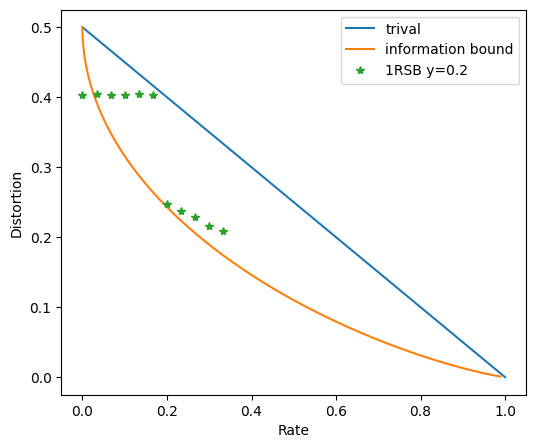

PyObject <matplotlib.legend.Legend object at 0x7f3678ad4080>

In [142]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)
fig, ax = PyPlot.subplots(figsize=(6,5))
PyPlot.xlabel("Rate")
PyPlot.ylabel("Distortion")
PyPlot.plot((0,1),(0.5,0), label="trival")
PyPlot.plot(H.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
PyPlot.plot(Rs,Ds, "*", label="1RSB y=0.2")
legend()